In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('/Users/amuratov/gits/EncodeNMF')


In [2]:
import OONMF
import OONMFhelpers as OH
import OONMFmetadata as OMD

In [3]:
today = OH.get_today()
k=16

usingCut = False
thecut = []


In [4]:
finname = 'ENCODE 733-sample list WM20180608 - ENCODE3 metadata 2-04-19.tsv'
MetaData  = pd.read_csv(finname, sep='\t')


In [5]:
MetaData.head()

,Included in 827-sample set?,Included in 665-sample set?,DCC SPOT1 >= 0.3?,DCC SPOT1 >= 0.25,DCC SPOT1 >= 0.2,TO BE INCLUDED,Candidate removal -- insert sizes & dupe rate,Candidate removal -- insert sizes,AG,LN,...,sample_dhs_protease_inhibitor,tissueculture_creation_date,fractionation_id,fractionation_method,fractionation_yield,fractionation_num_nuclei,BAM file,NMF component,Biosample protocol,Experiment protocol
0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,5636,1203,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1203/aggregation-...,lymphoid,Biosample protocol,Experiment protocol
1,Yes,Yes,Yes,Yes,Yes,Yes,No,No,5635,1207,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1207/aggregation-...,digestive,Biosample protocol,Experiment protocol
2,Yes,Yes,Yes,Yes,Yes,Yes,No,No,5634,1222,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1222/aggregation-...,lymphoid,Biosample protocol,Experiment protocol
3,Yes,Yes,Yes,Yes,Yes,Yes,No,No,4219,1264,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1264/aggregation-...,epithelial,Biosample protocol,Experiment protocol
4,Yes,Yes,Yes,Yes,Yes,Yes,No,No,4218,1269,...,NaN,NaN,NaN,NaN,NaN,NaN,/net/seq/data/aggregations/LN1269/aggregation-...,tissue-invariant,Biosample protocol,Experiment protocol


In [6]:
MetaData.shape

(733, 78)

In [7]:
sampnamePD = pd.read_table('sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type

In [8]:
decomp = OONMF.NMFobject(theNcomps=k)


In [9]:
decomp.Basis_Names = sampnamePD.full_name.values


In [10]:
decomp.matrix_input_name(Basis_finname='2018-06-08NC16_NNDSVD_Basis.npy', Mixture_finname='2018-06-08NC16_NNDSVD_Mixture.npy')


In [11]:
decomp.read_matrix_input()


In [12]:
rosetta = OMD.get_rosetta(MetaData, decomp.Basis_Names)

In [13]:
categories = ['system', 'organ','Biological_state','subsystem','Sex','germ layer', 'Growth stage', 'class', 'lib_kit_method', 'Sample_group', 'Candidate removal -- insert sizes & dupe rate', 'Candidate removal -- insert sizes', 'Donor_ID', 'Ethnicity', 'lib_cleanup', 'sample_dhs_protease_inhibitor']

In [14]:
from scipy.stats import mannwhitneyu

<Figure size 432x288 with 0 Axes>

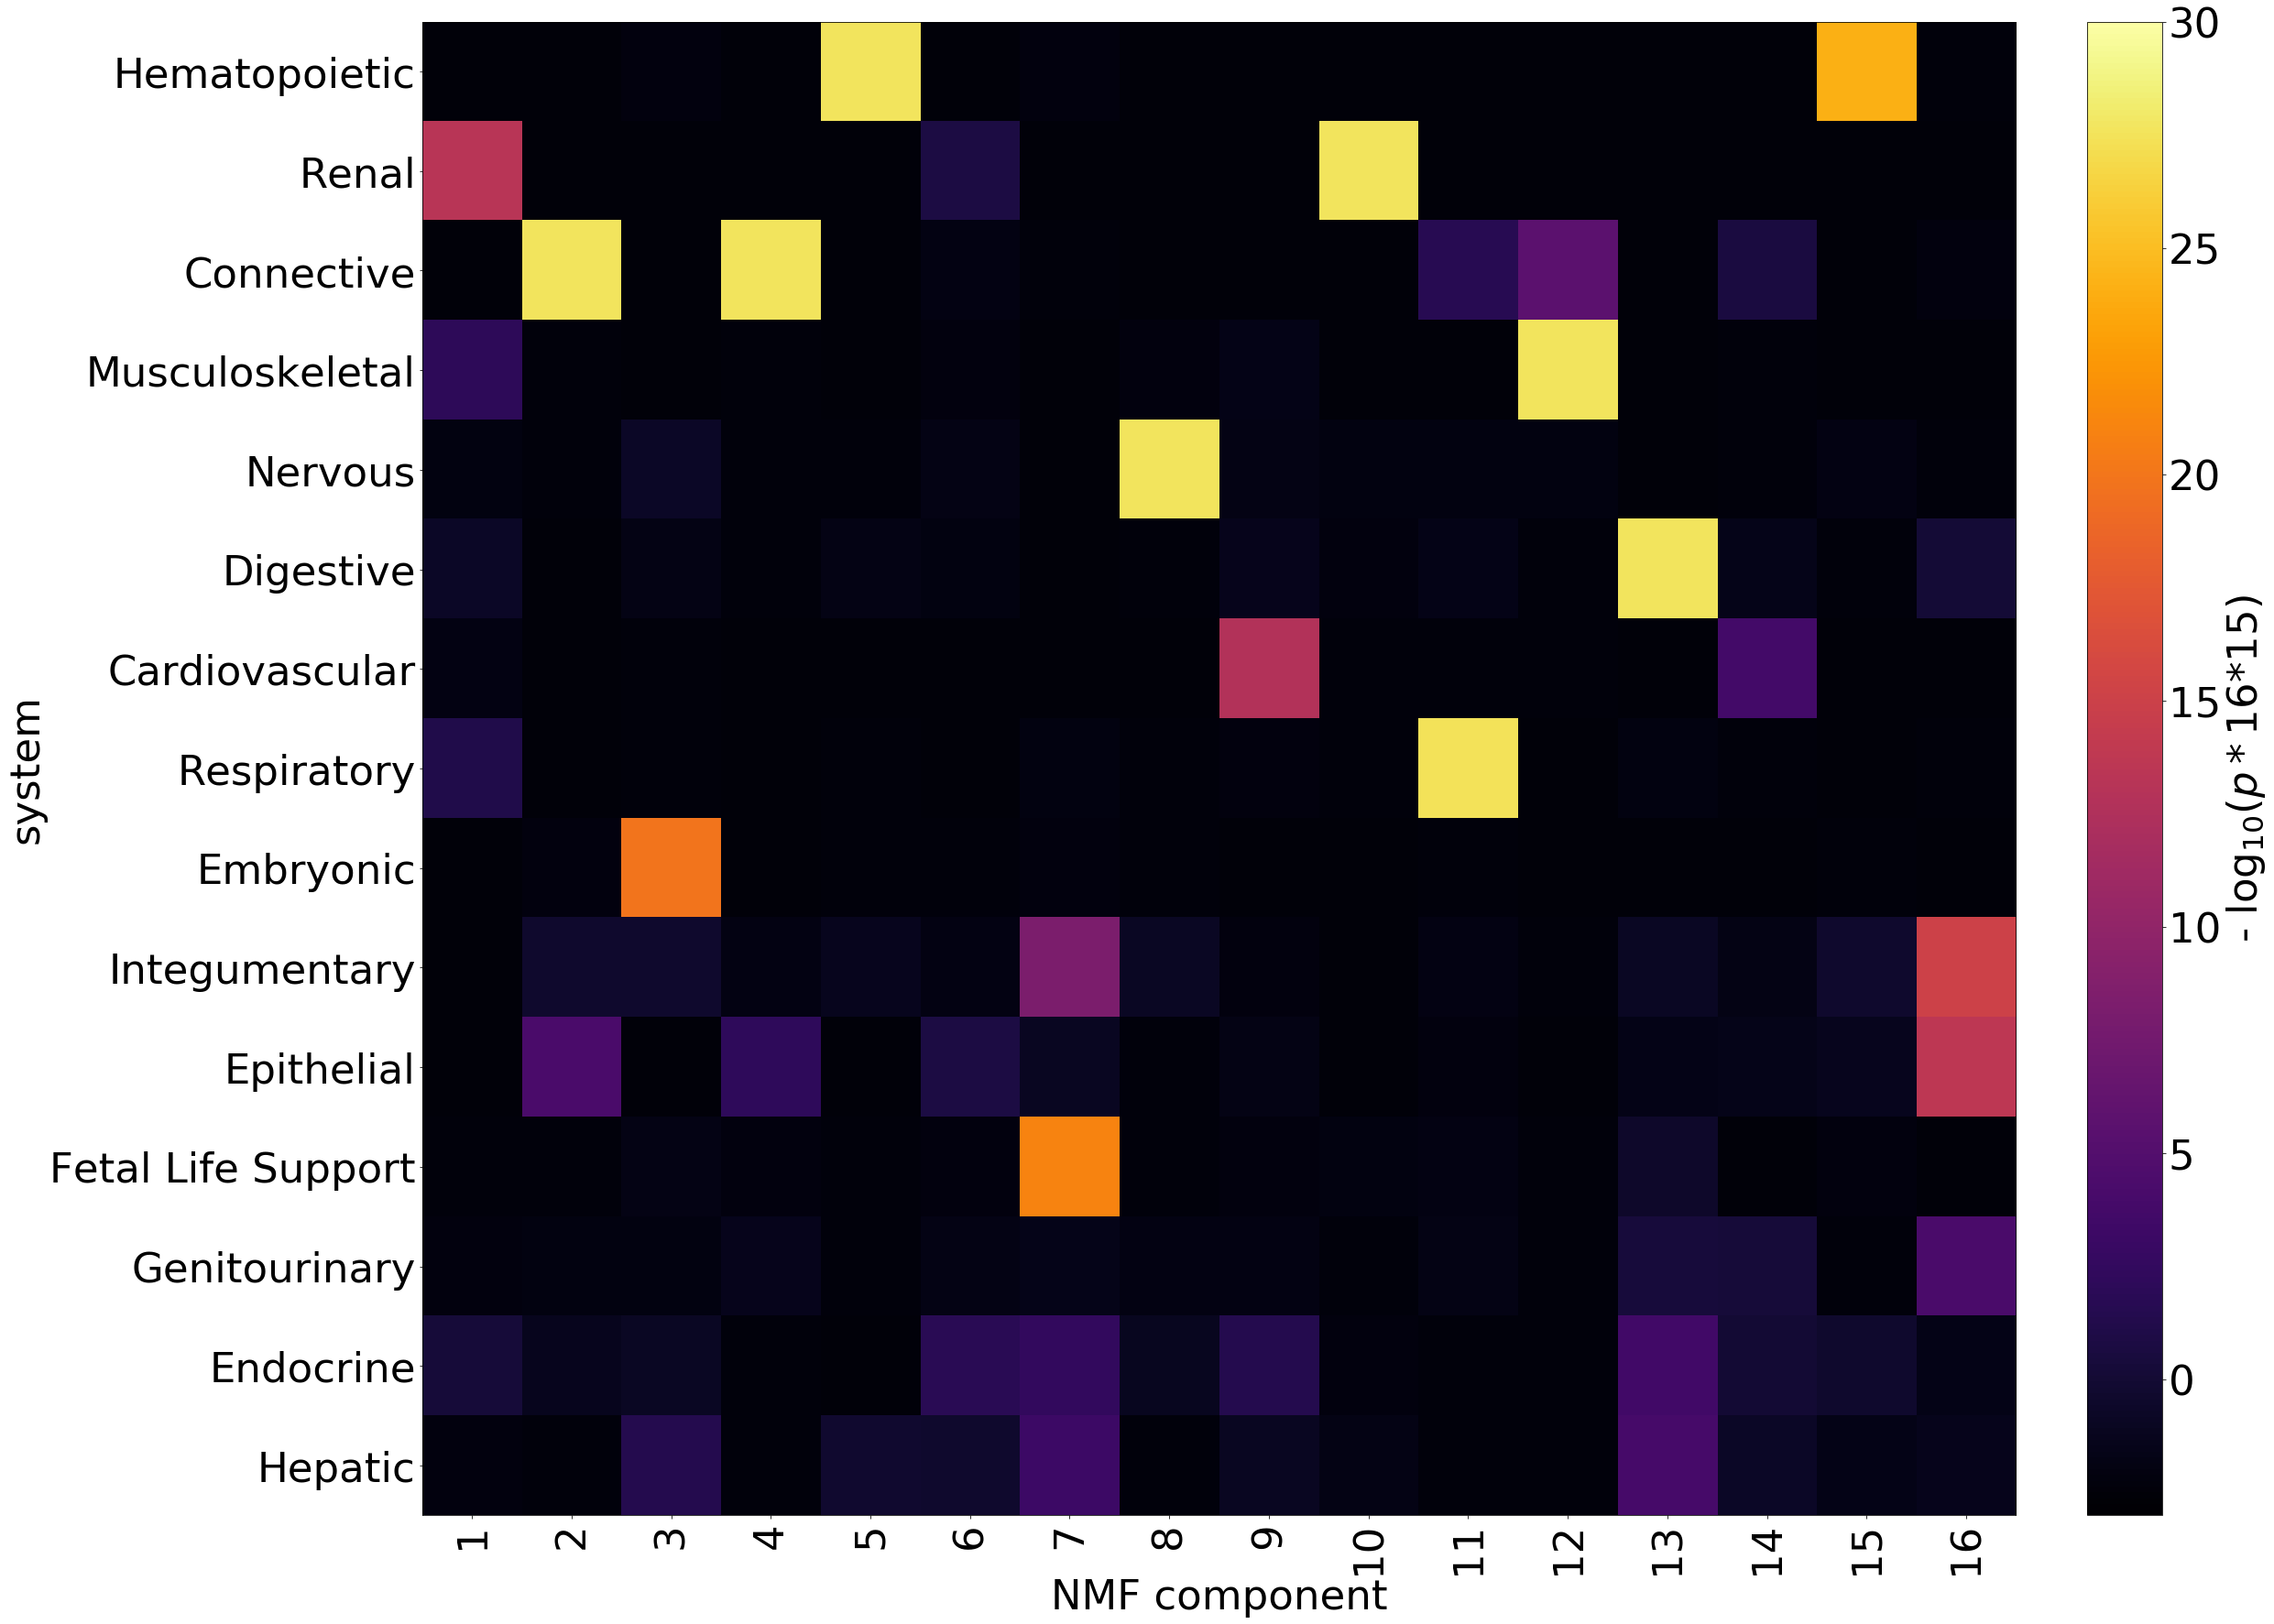

<Figure size 432x288 with 0 Axes>

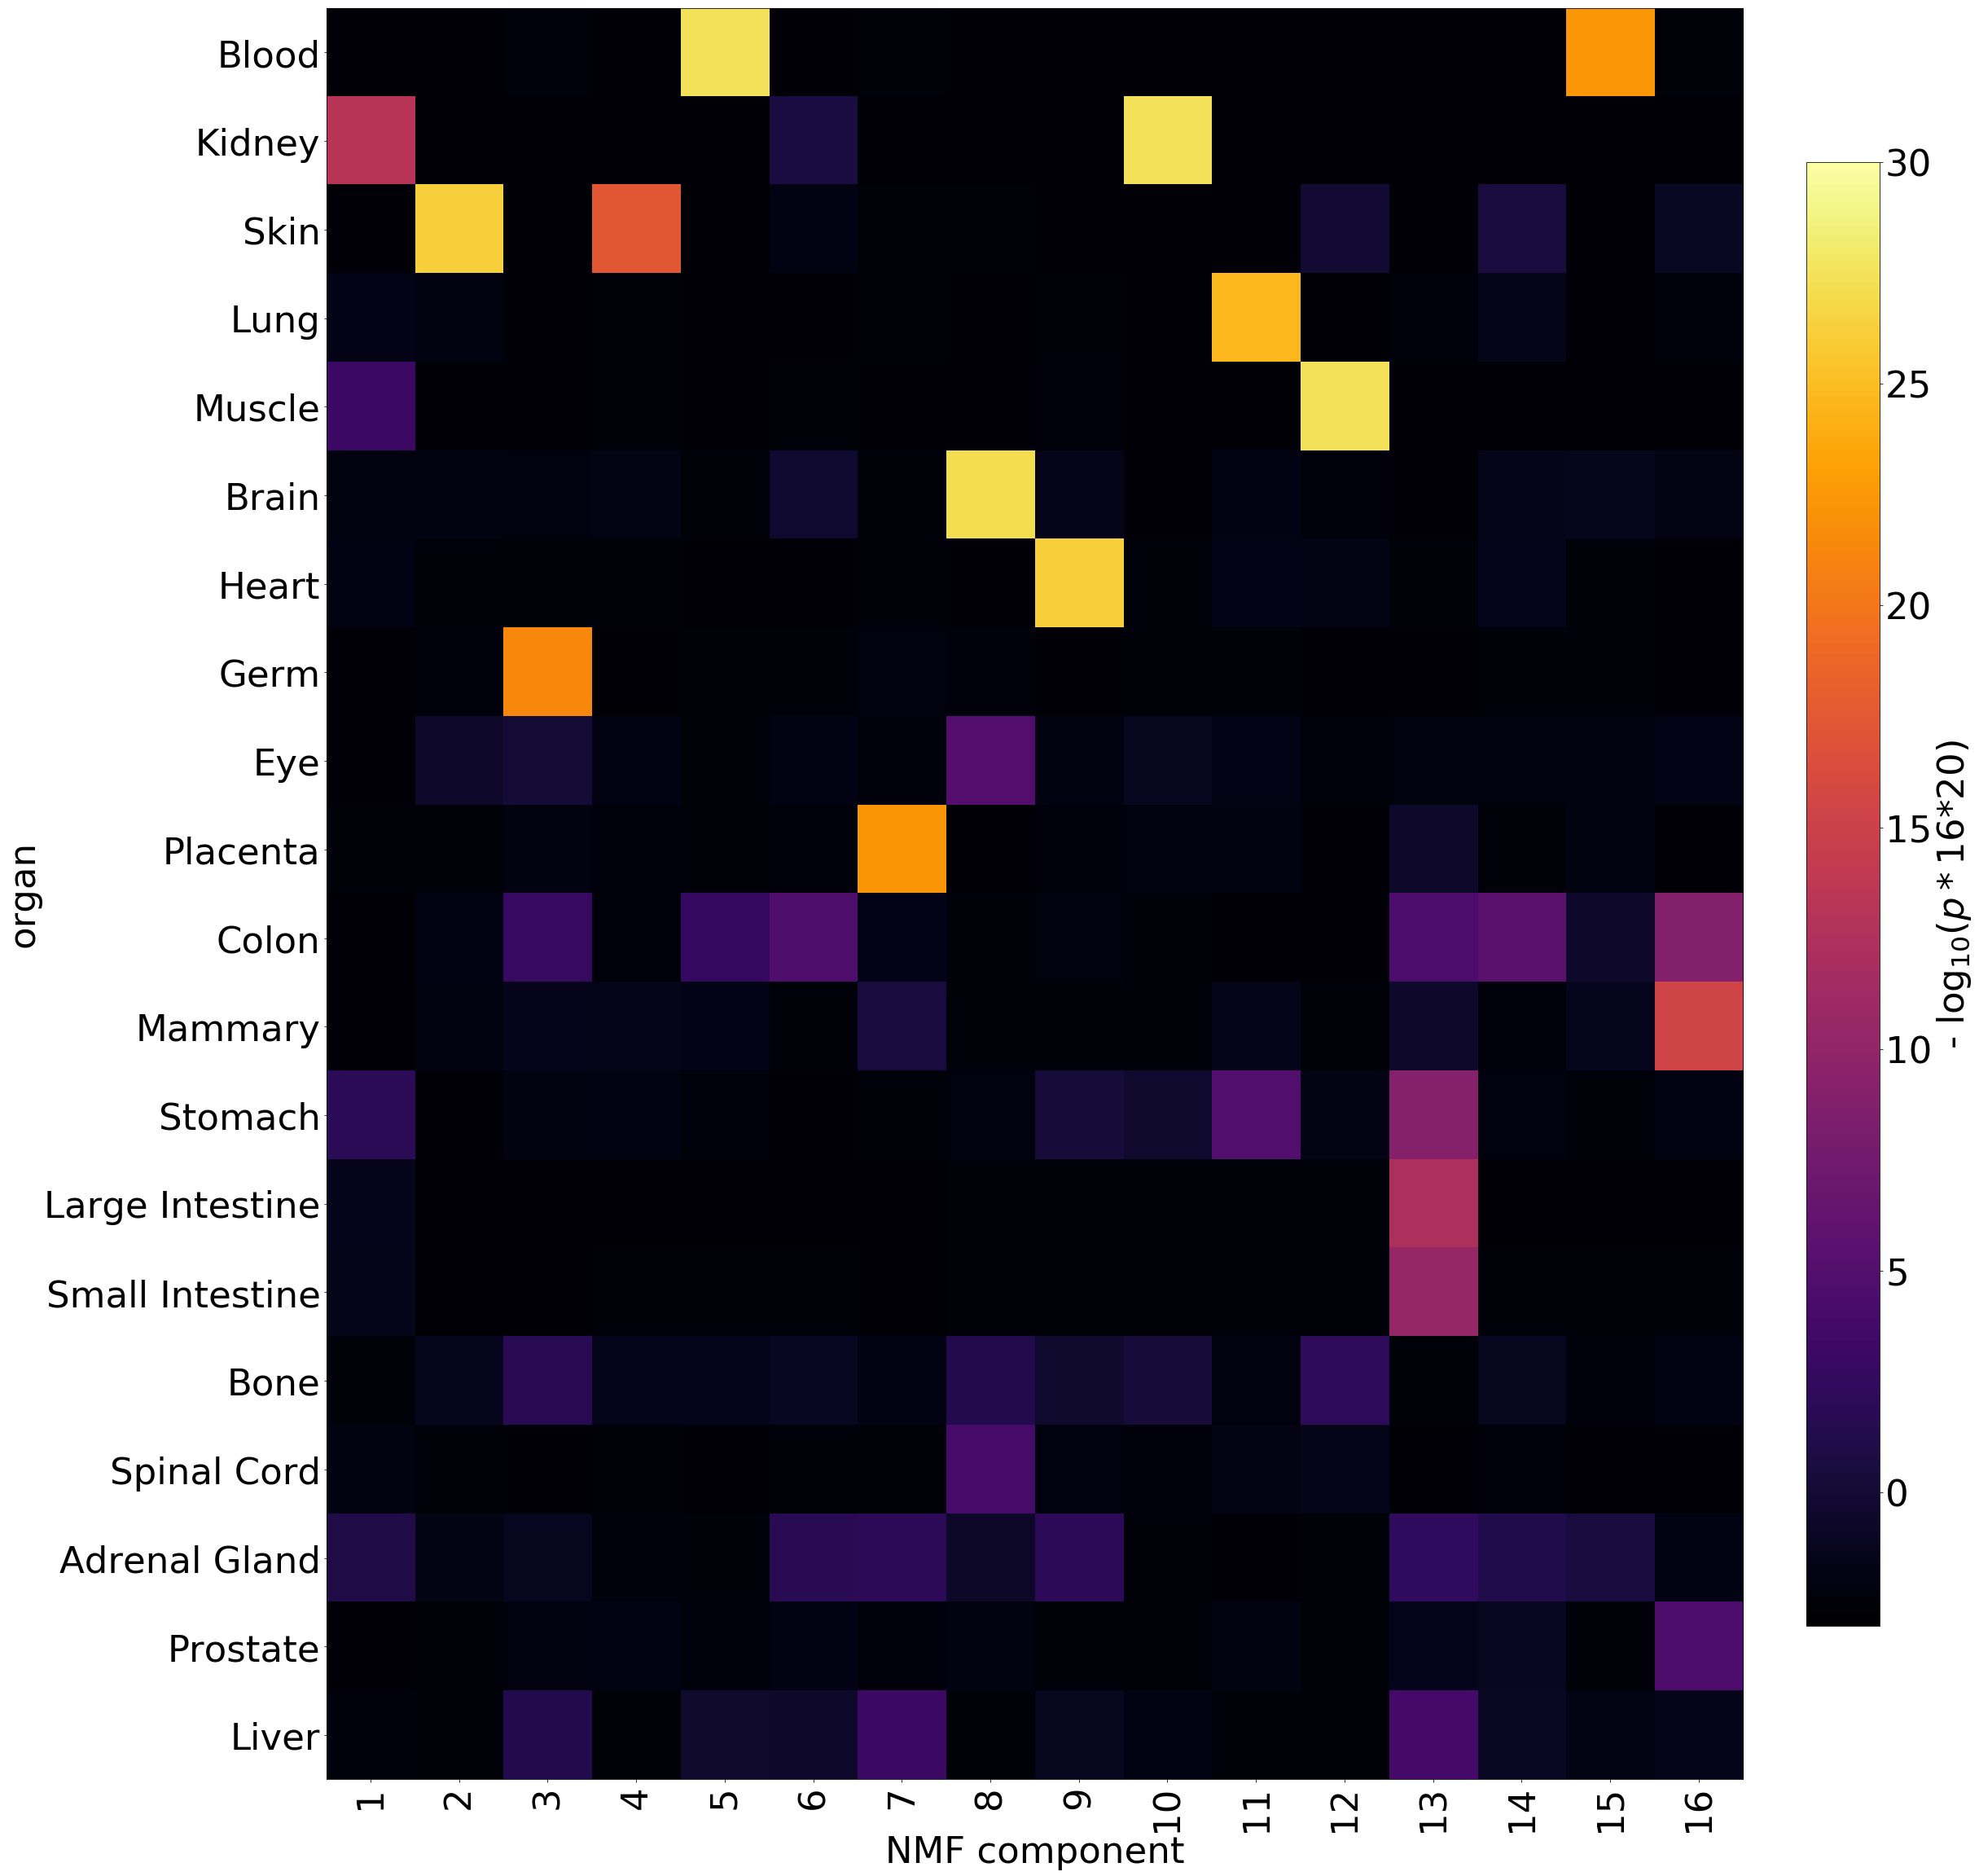

<Figure size 432x288 with 0 Axes>

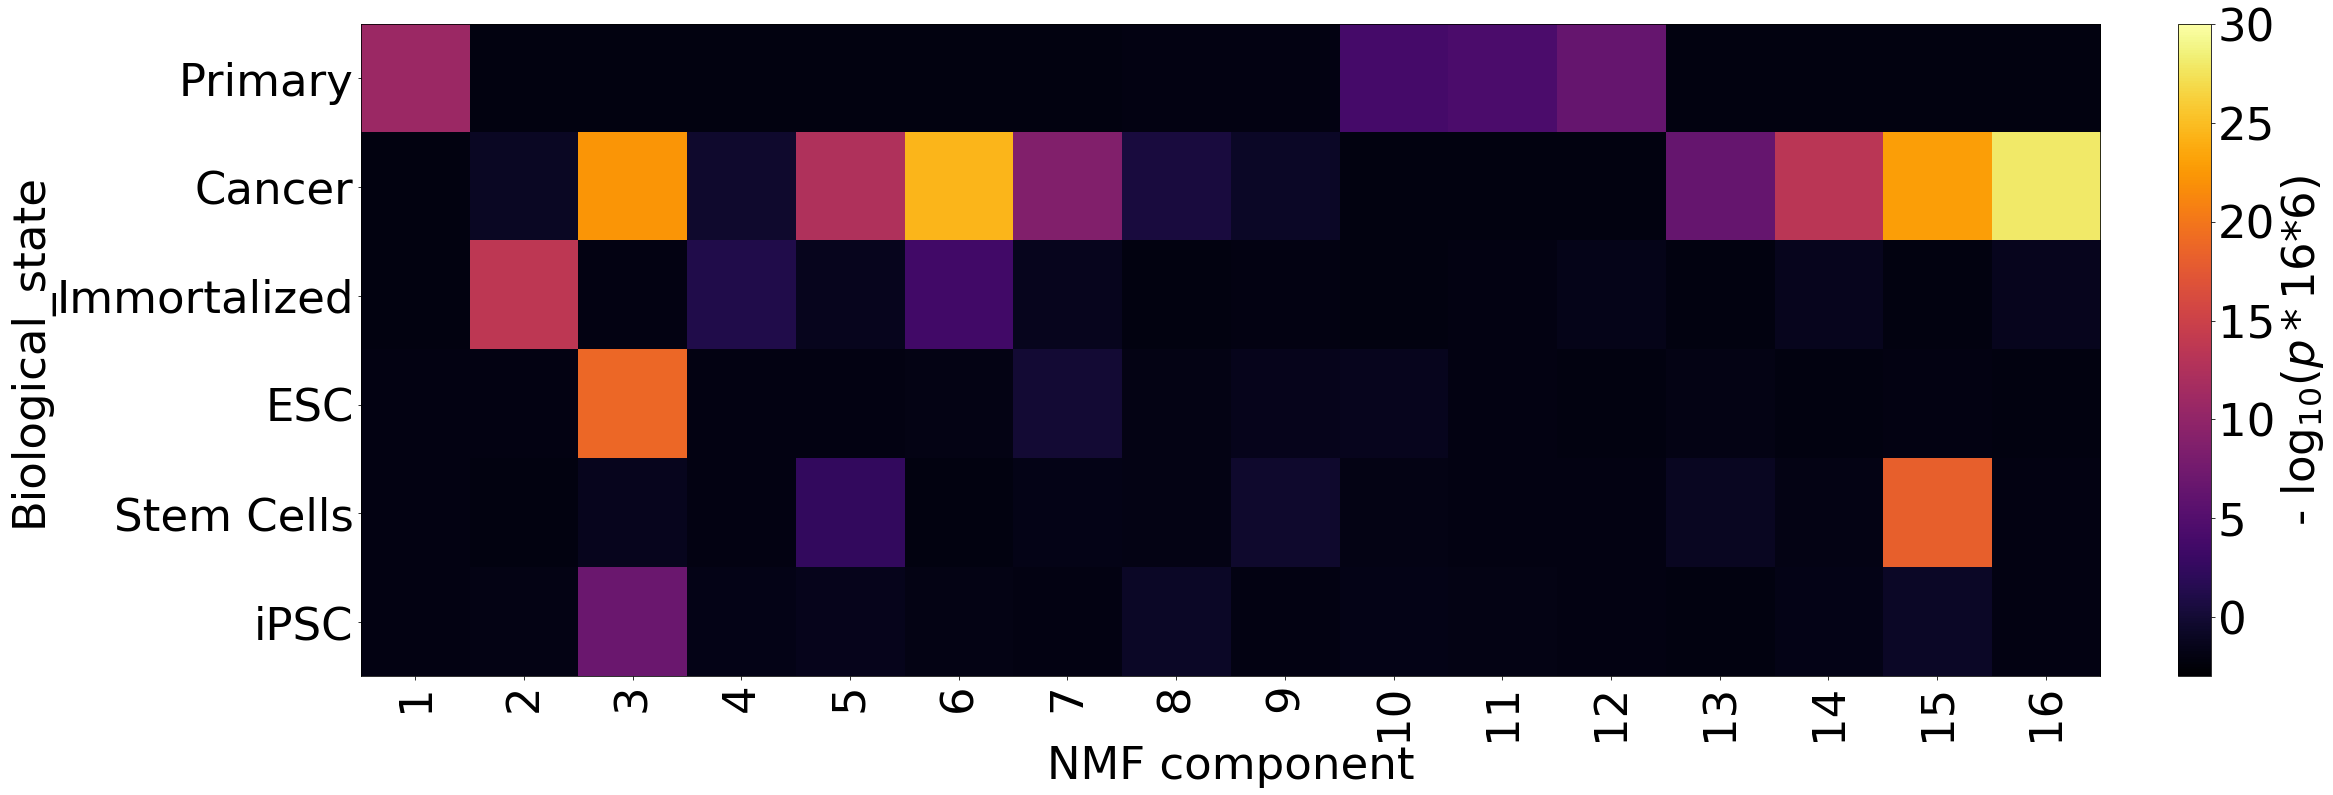

<Figure size 432x288 with 0 Axes>

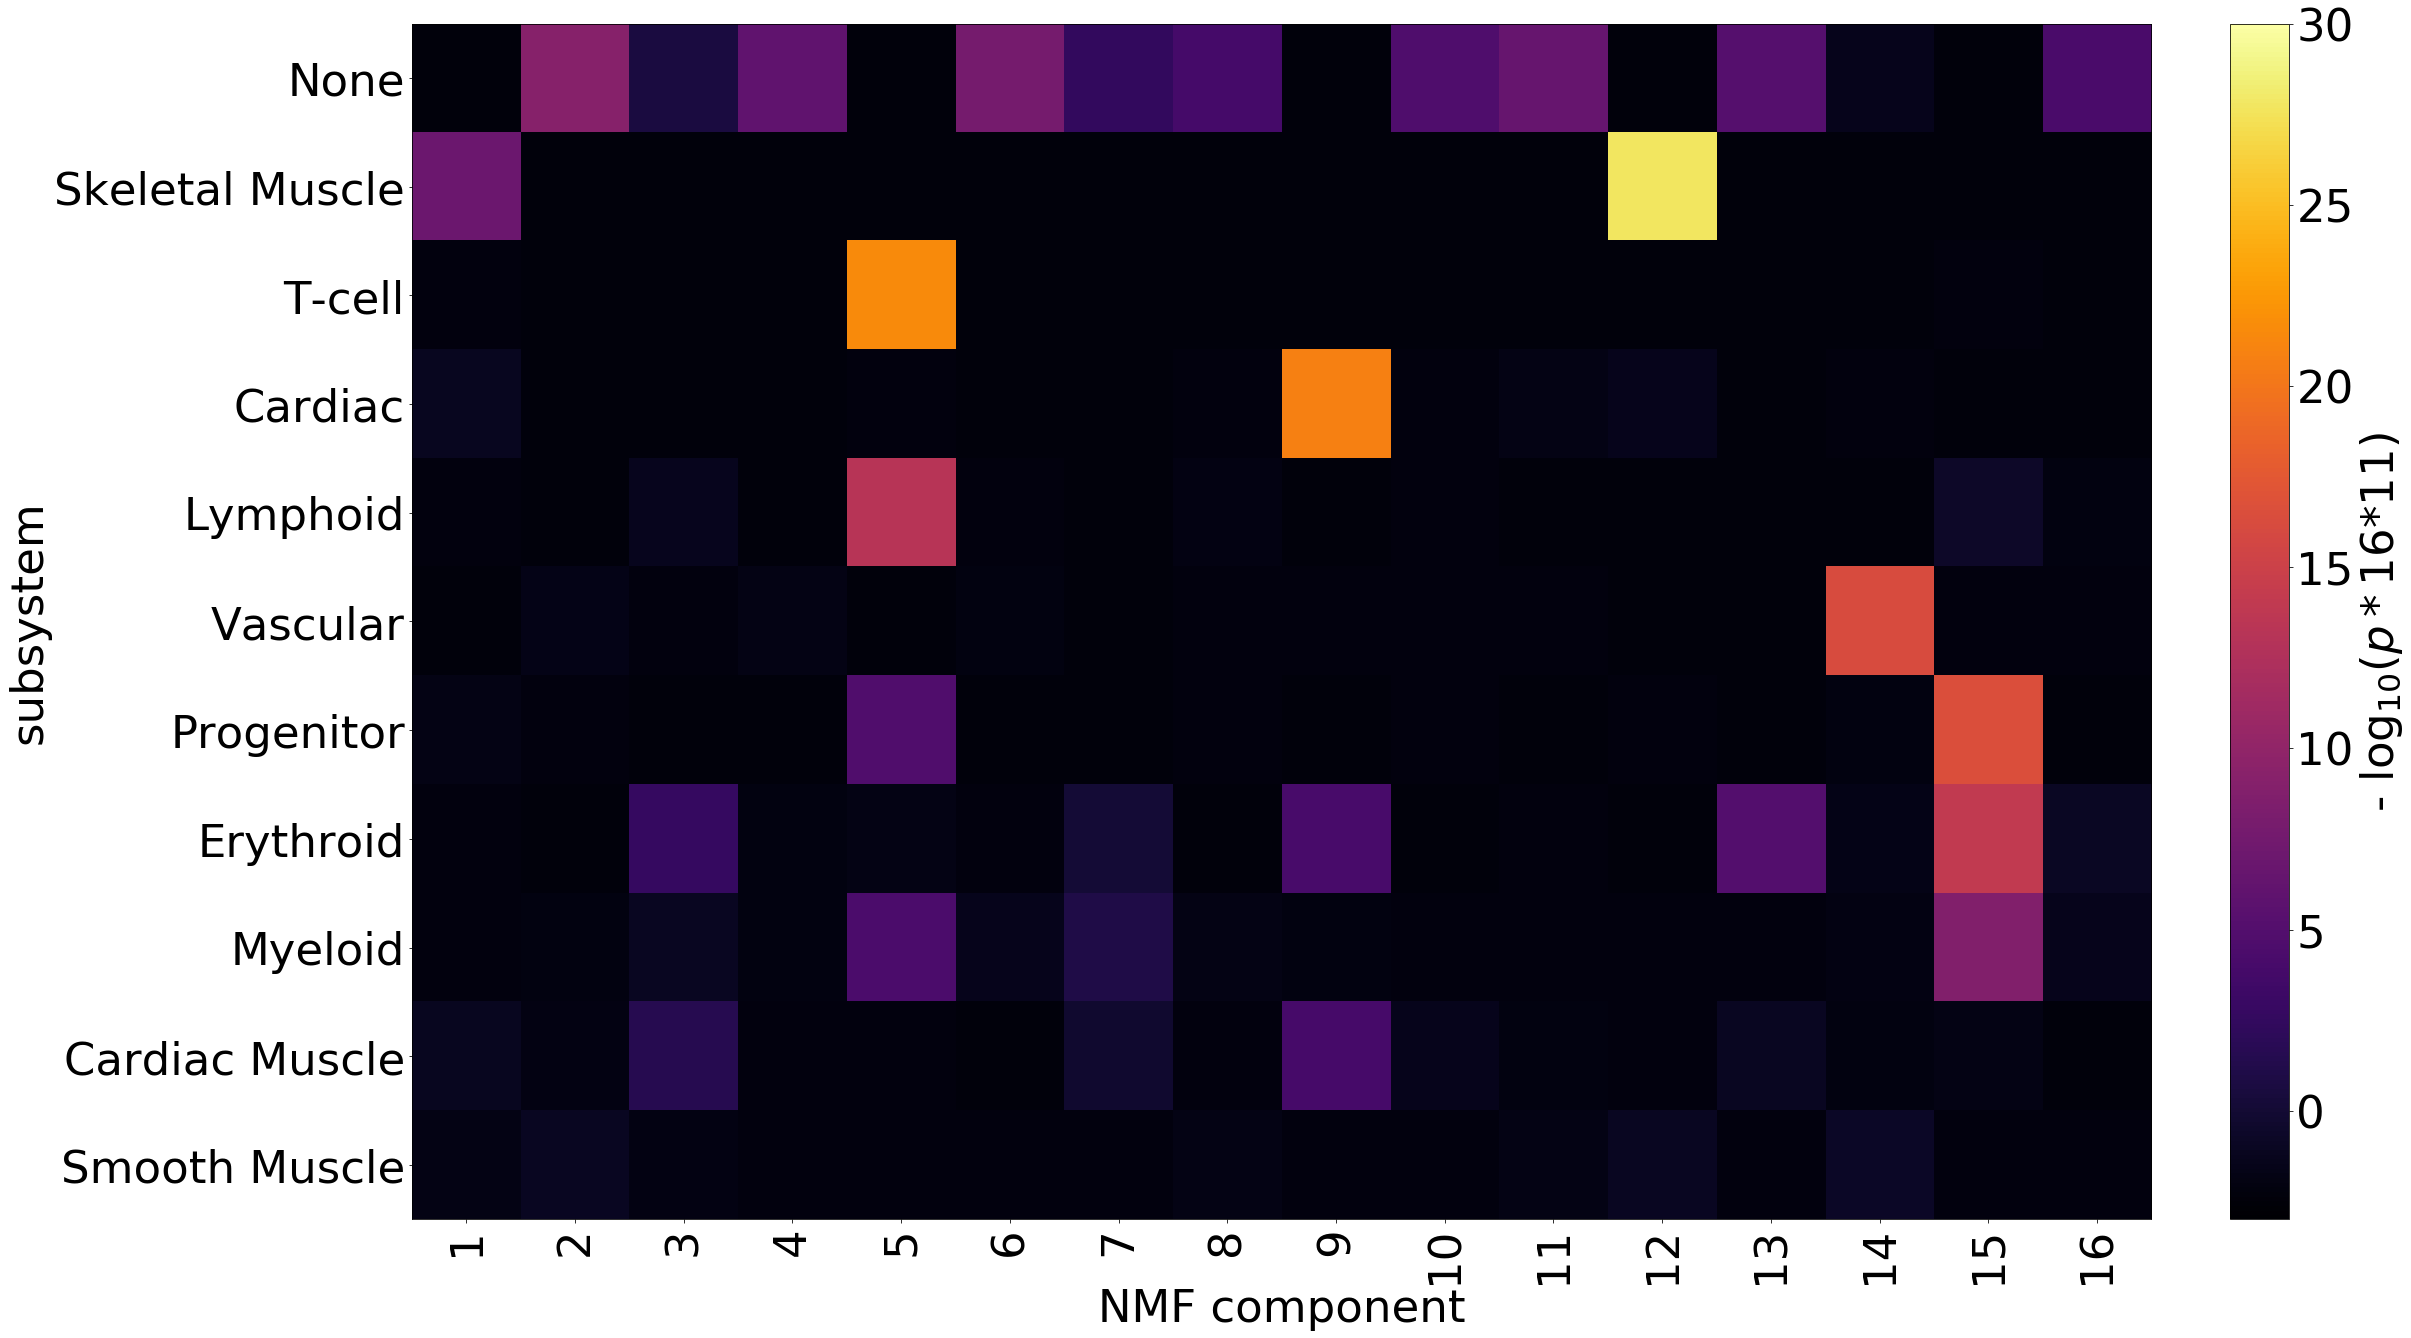

<Figure size 432x288 with 0 Axes>

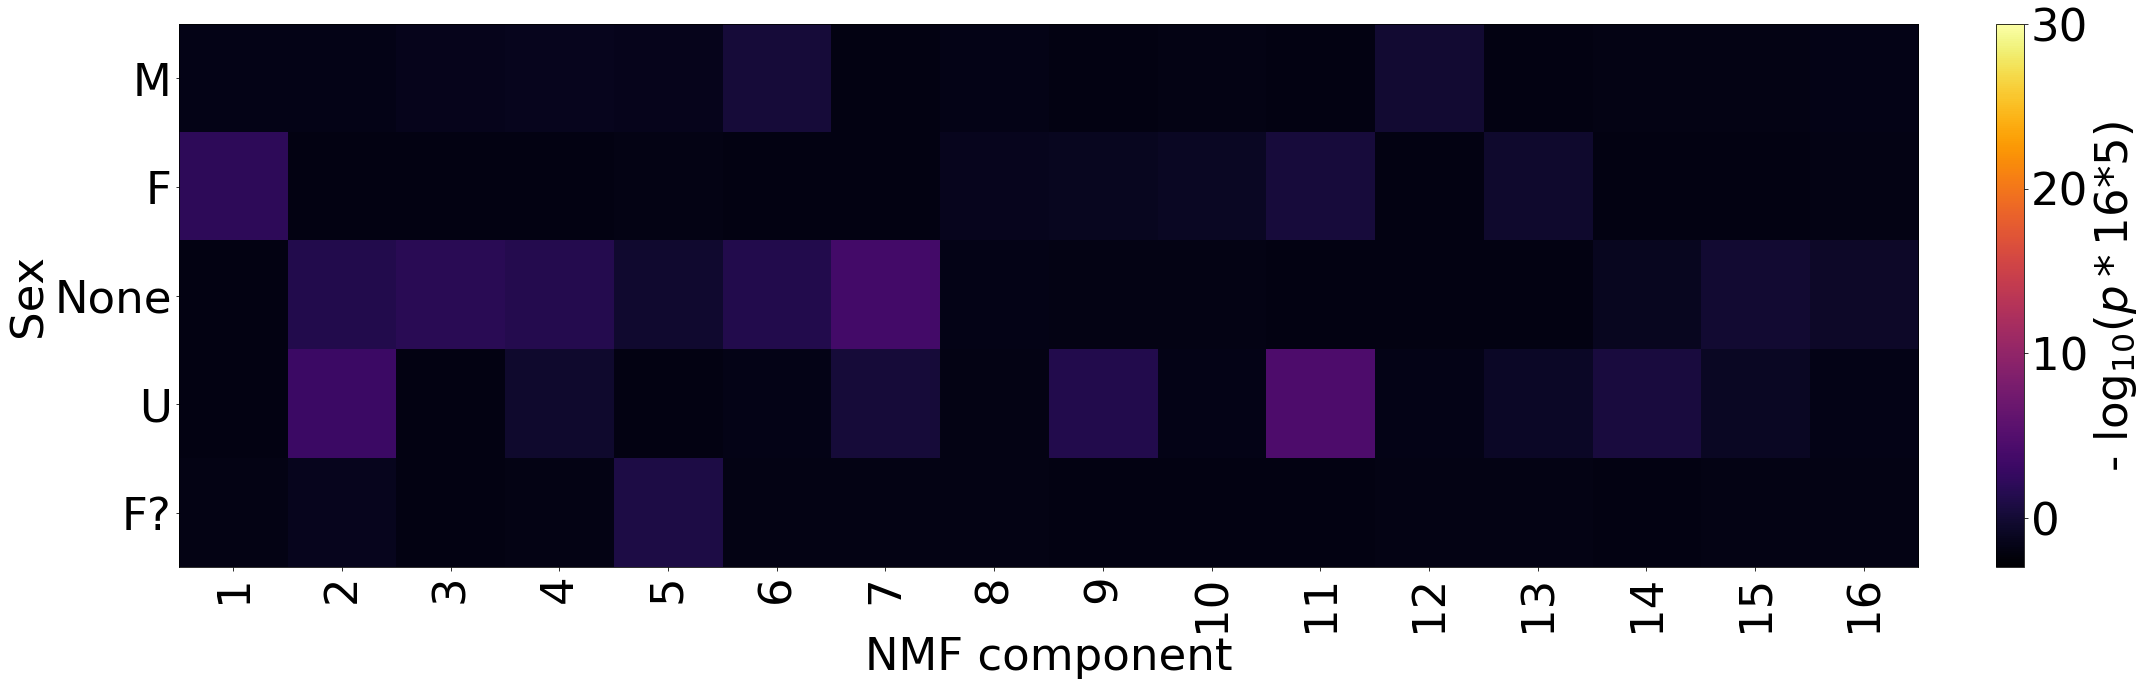

<Figure size 432x288 with 0 Axes>

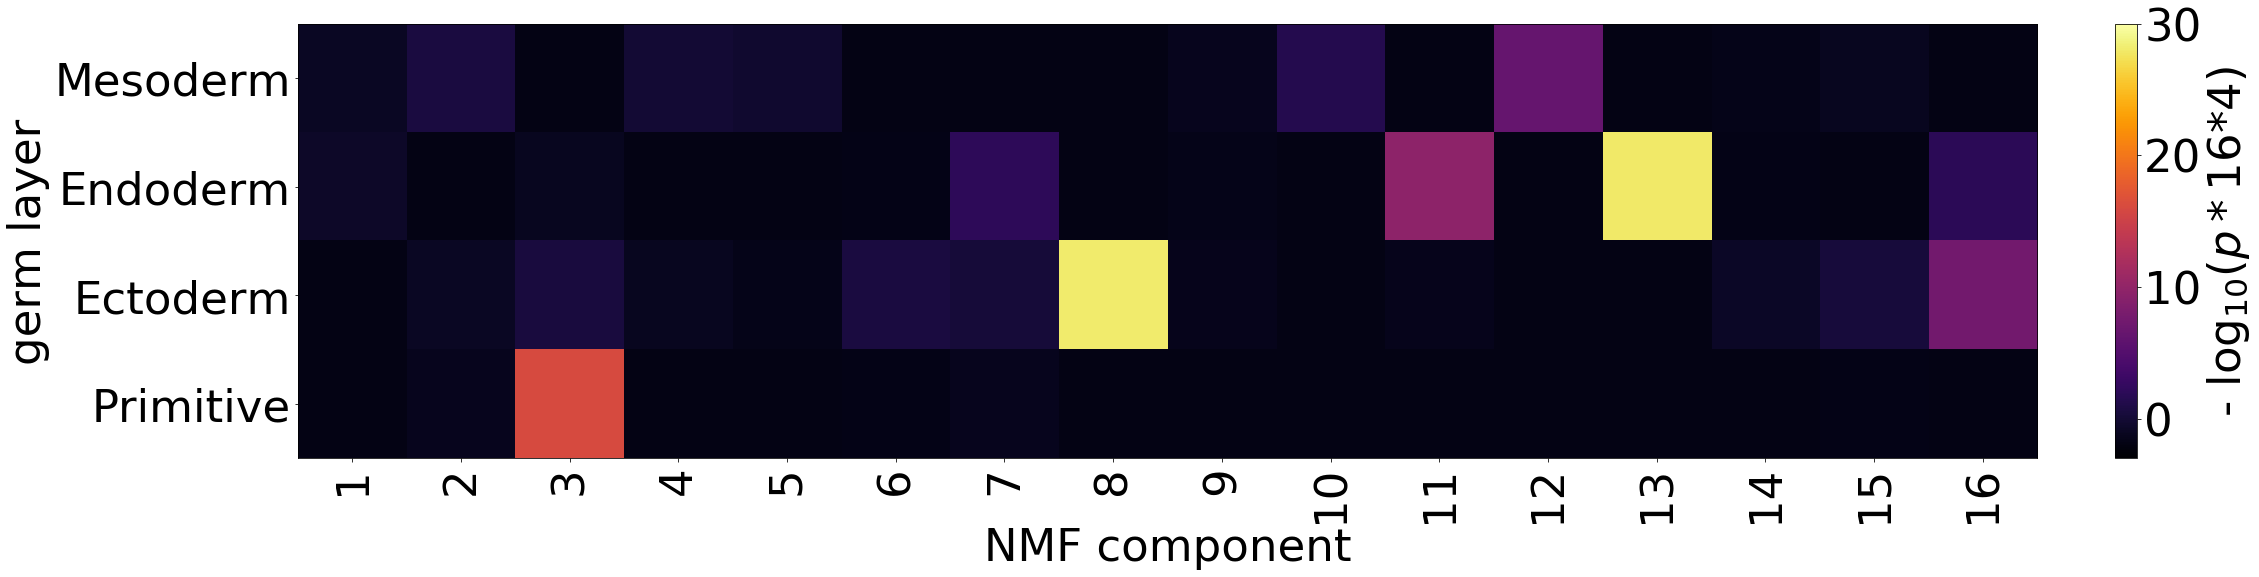

<Figure size 432x288 with 0 Axes>

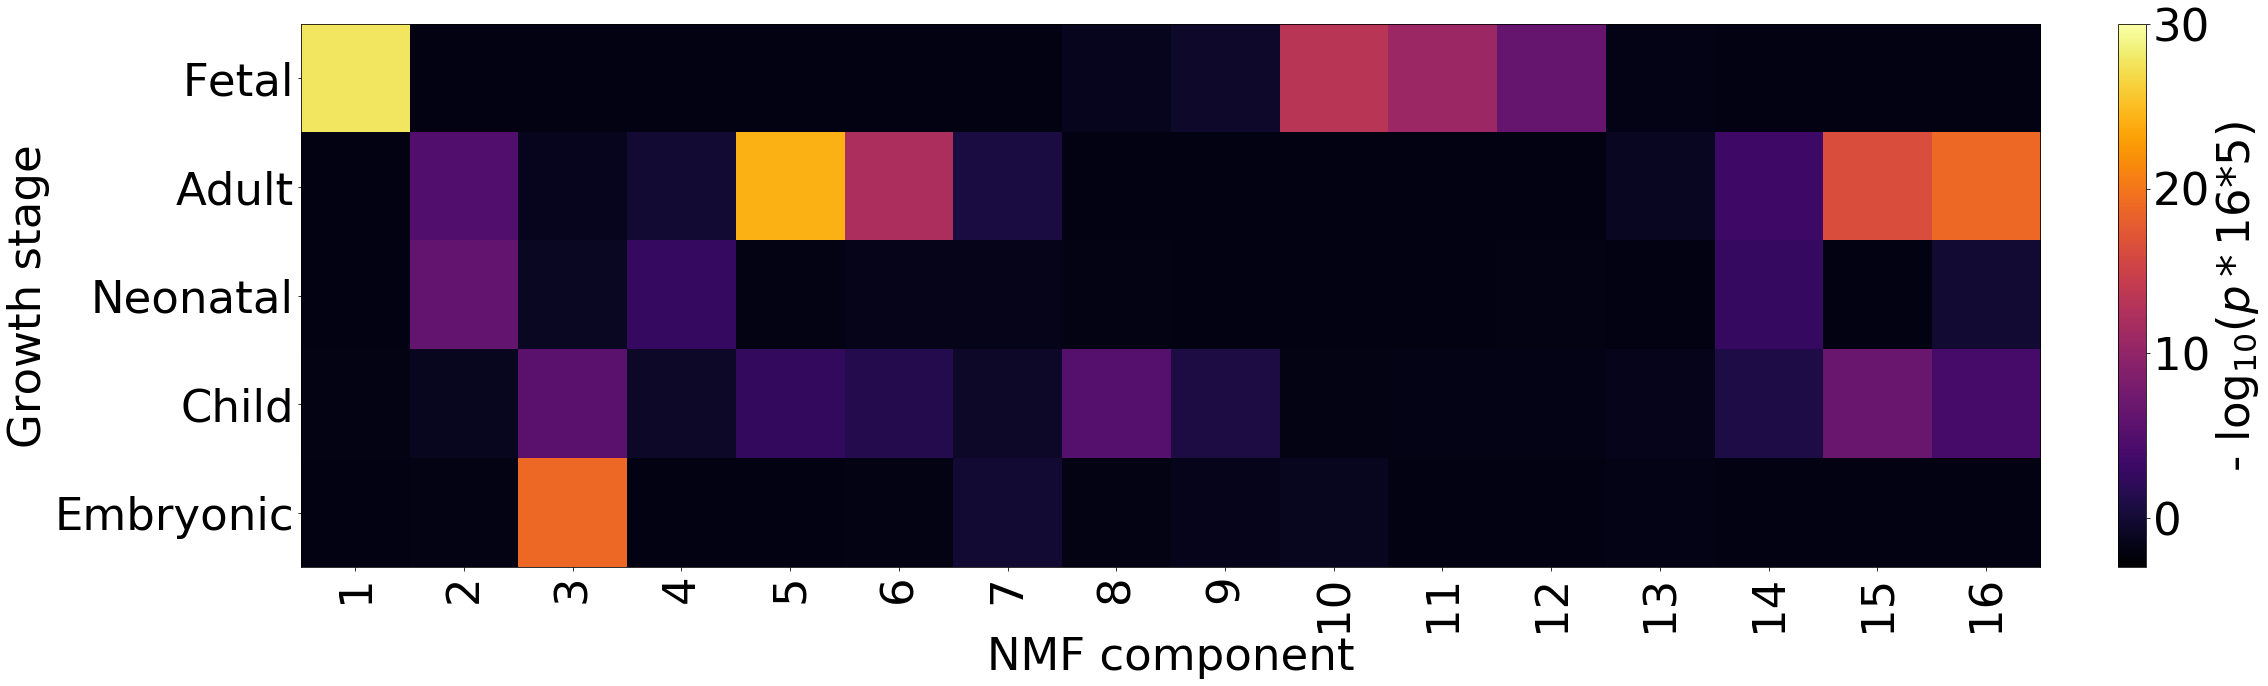

<Figure size 432x288 with 0 Axes>

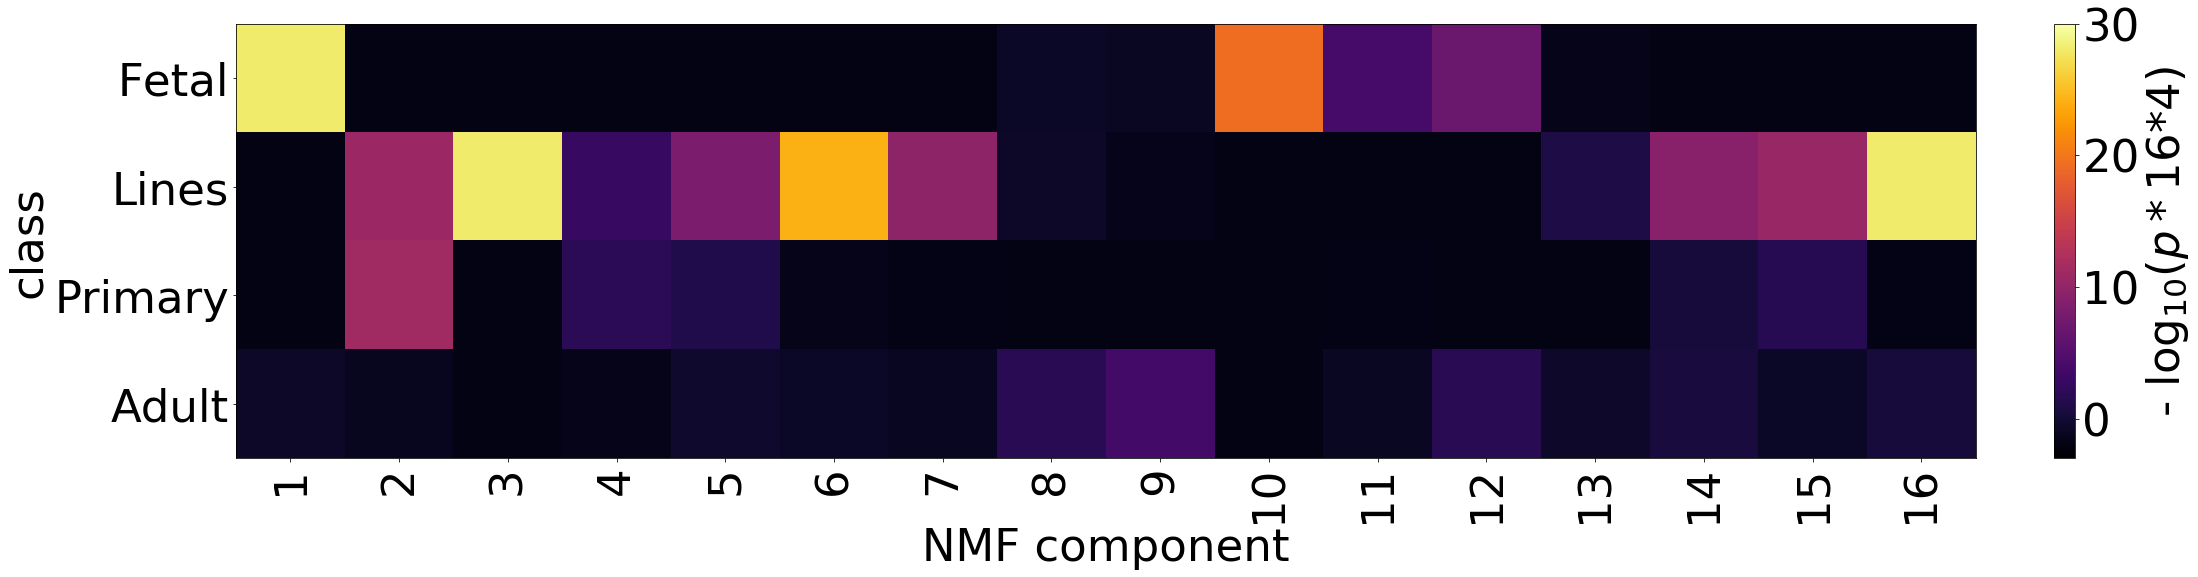

<Figure size 432x288 with 0 Axes>

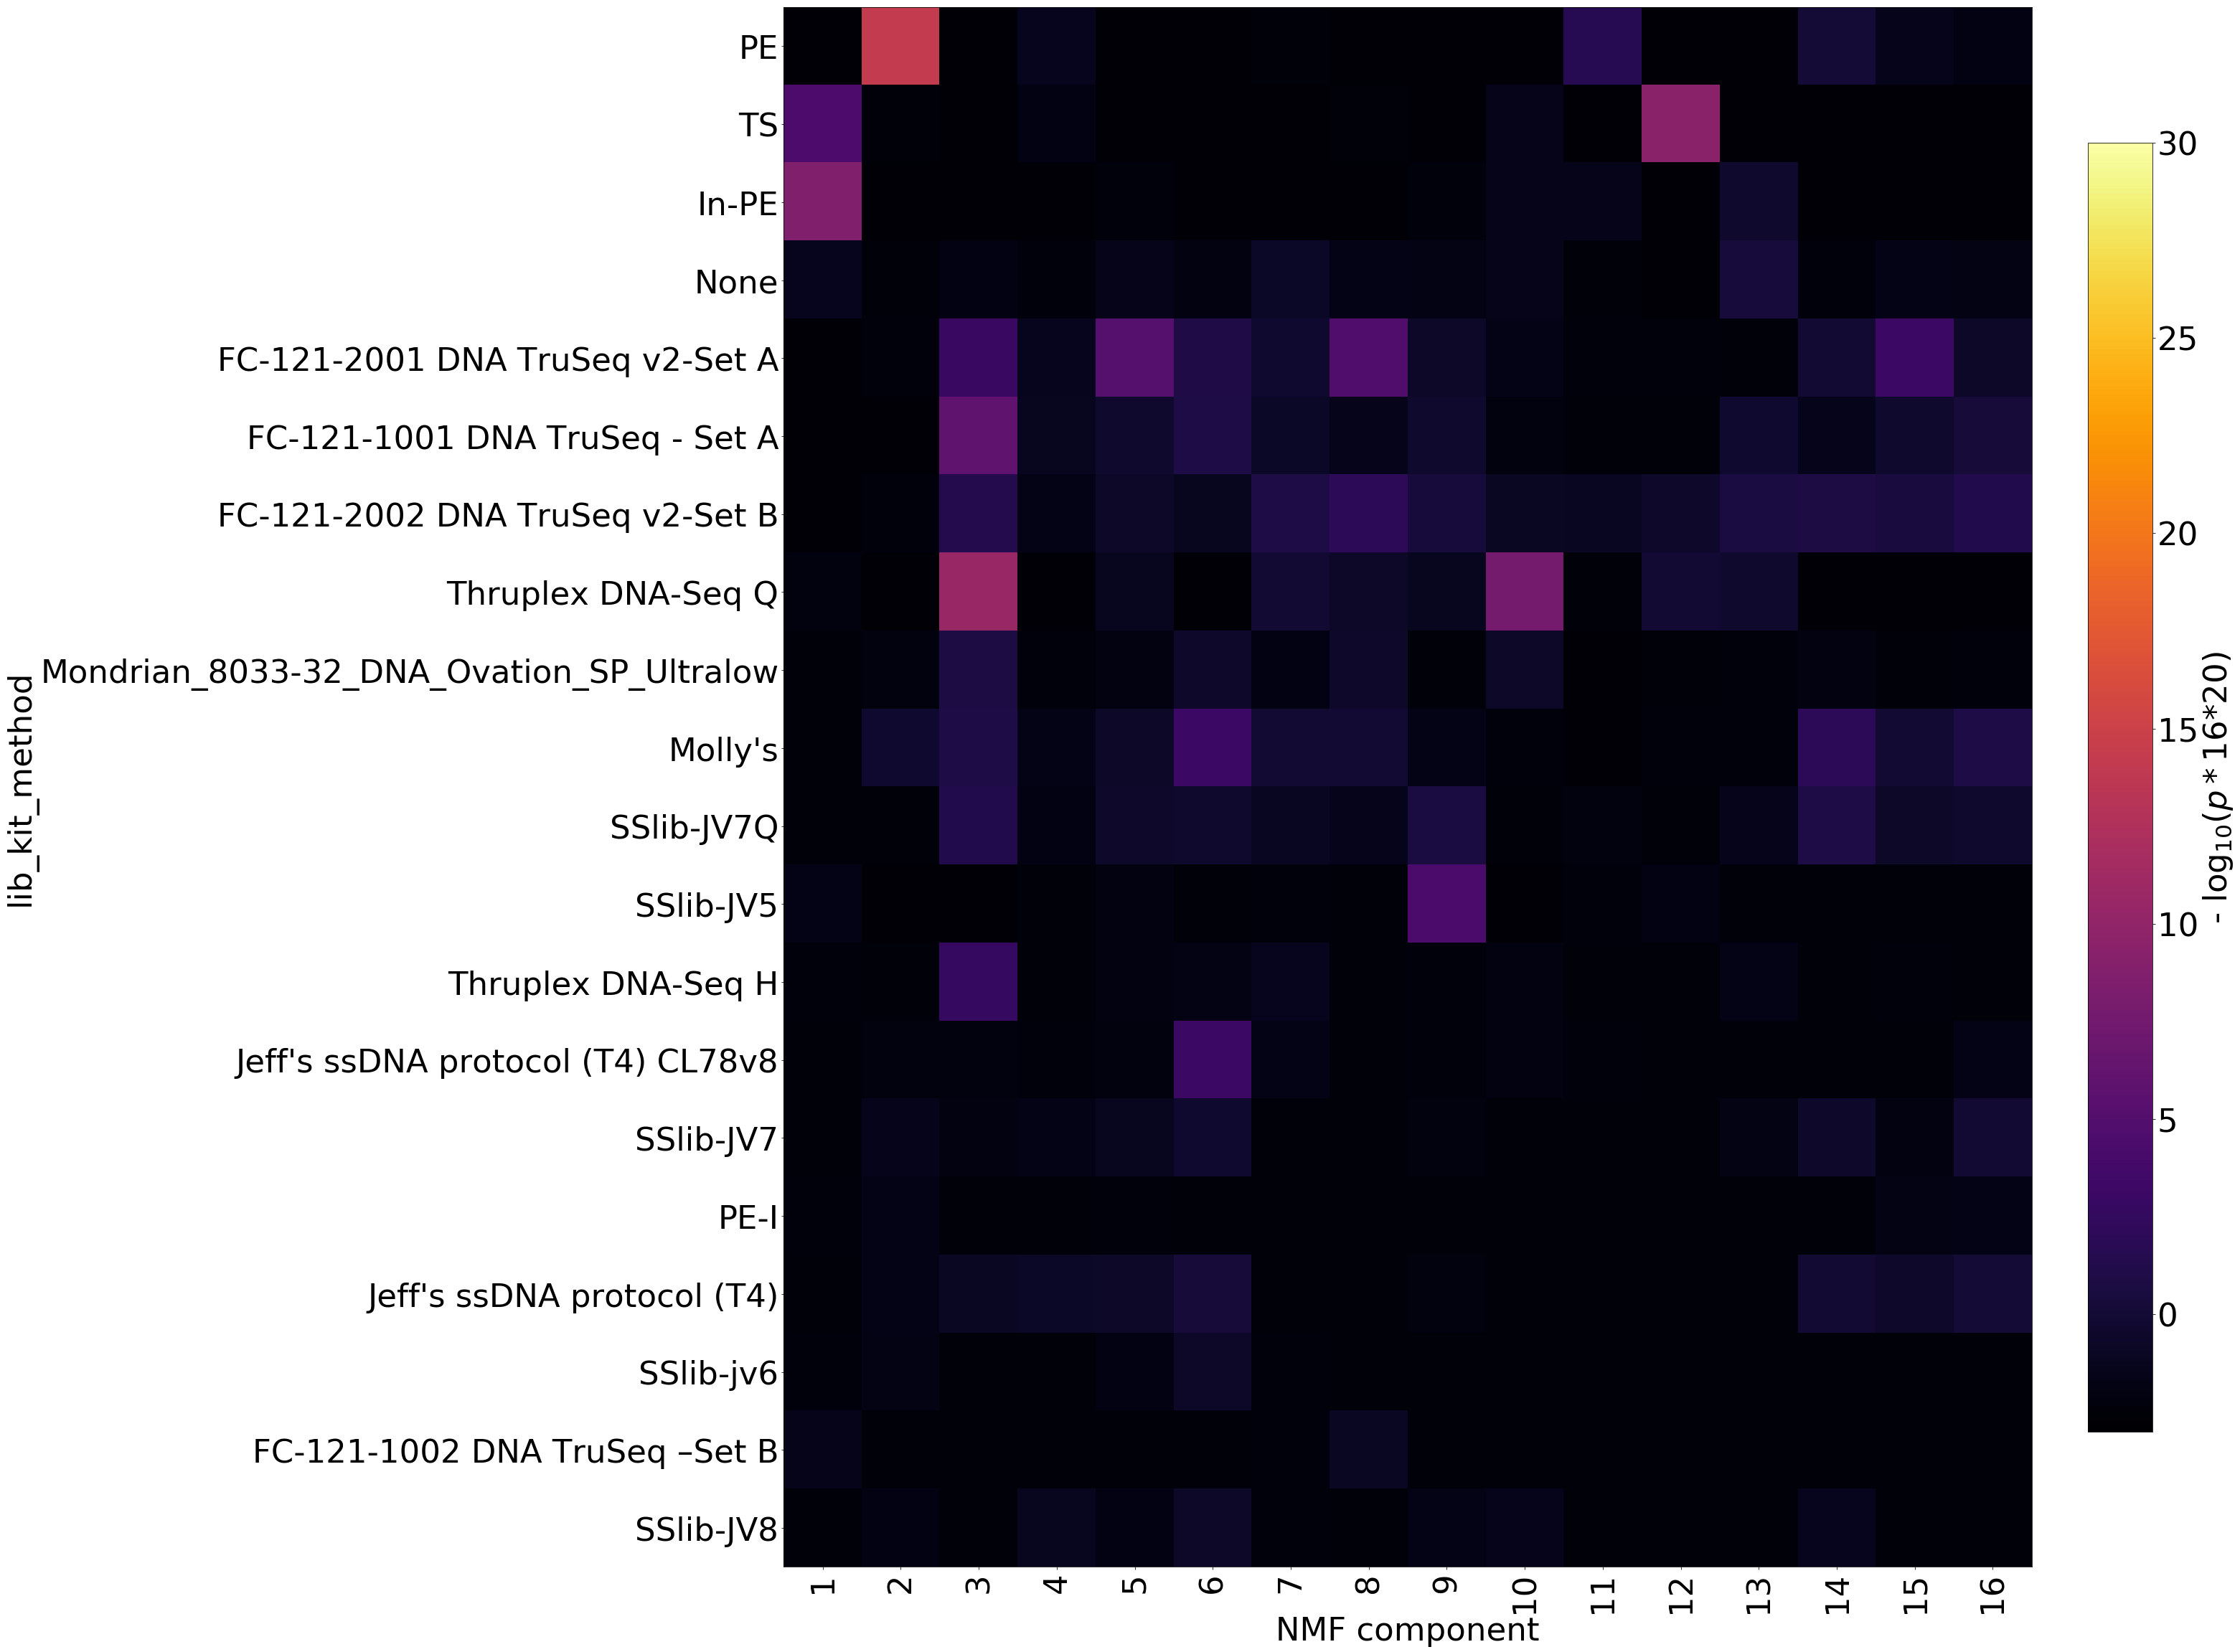

<Figure size 432x288 with 0 Axes>

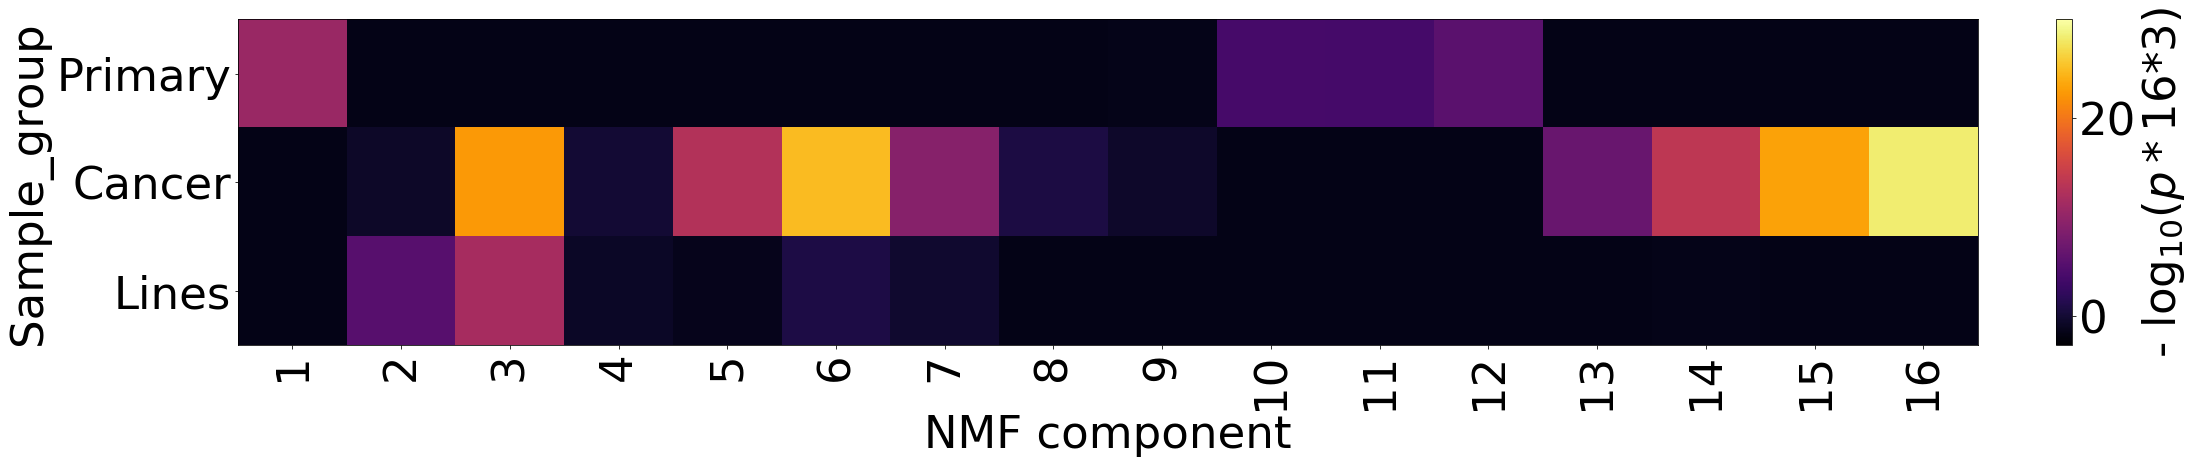

<Figure size 432x288 with 0 Axes>

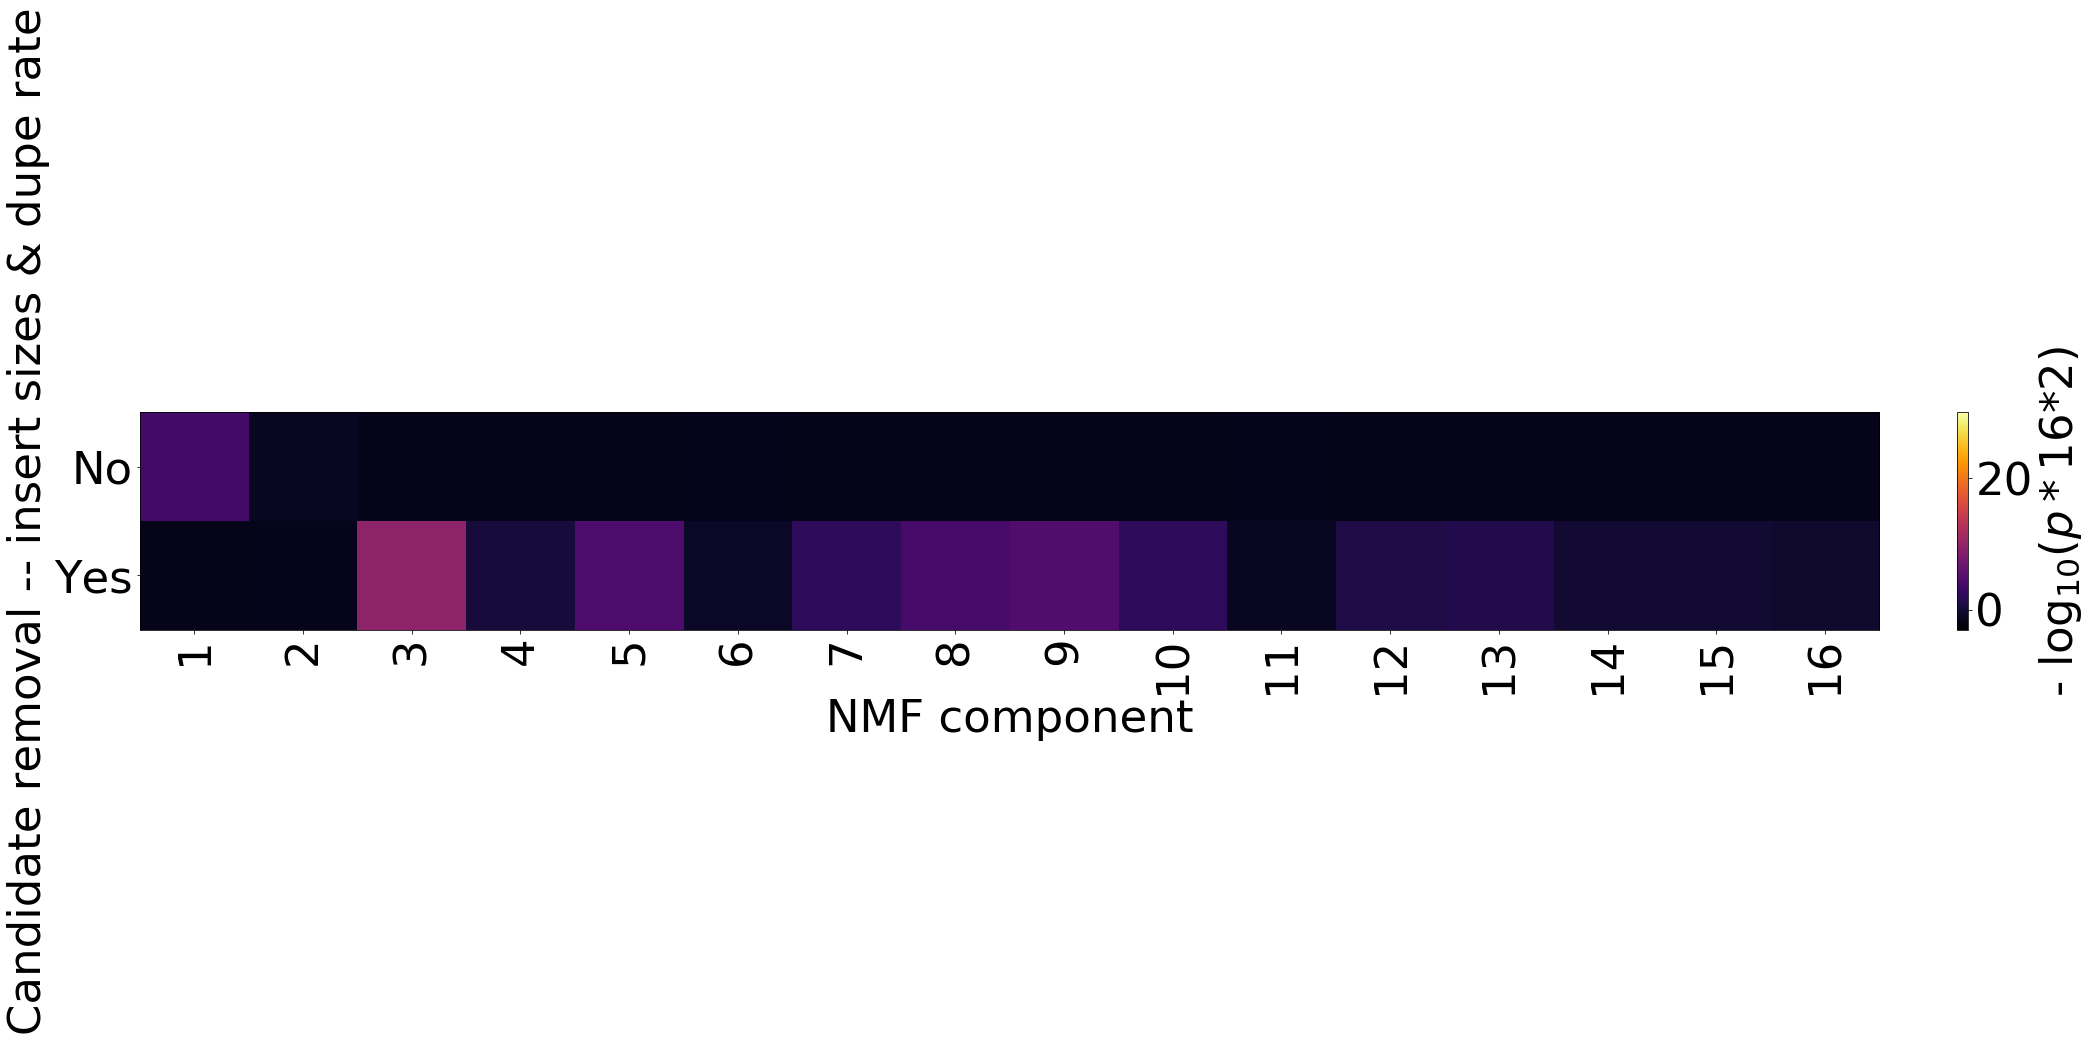

<Figure size 432x288 with 0 Axes>

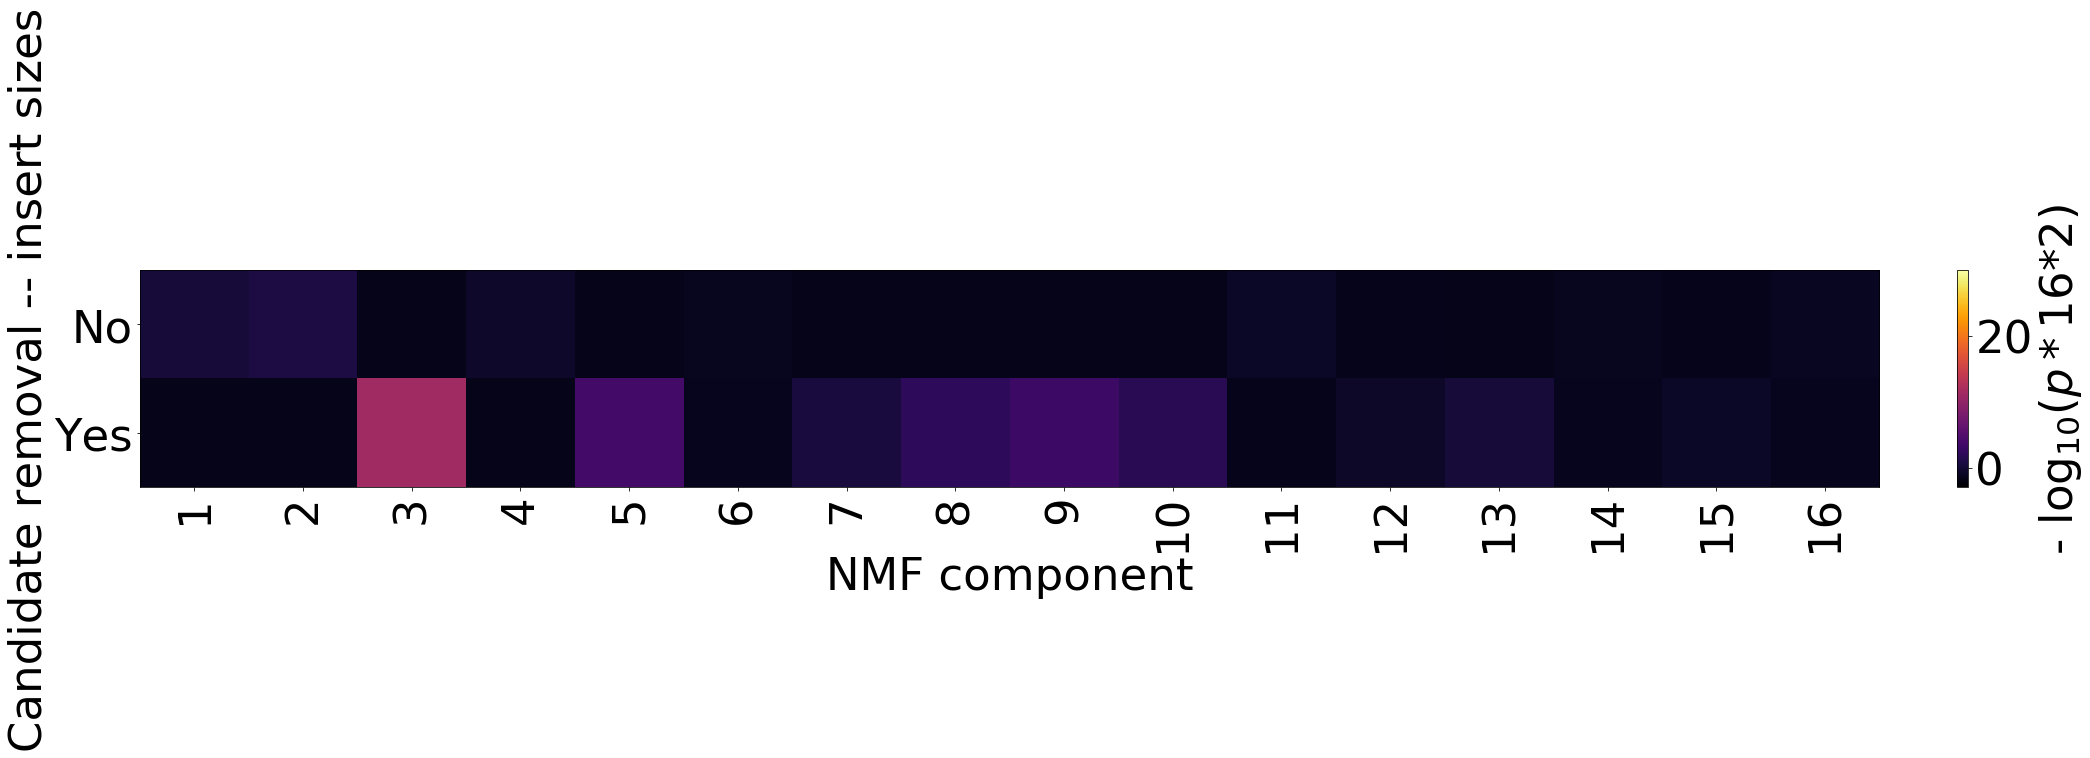

<Figure size 432x288 with 0 Axes>

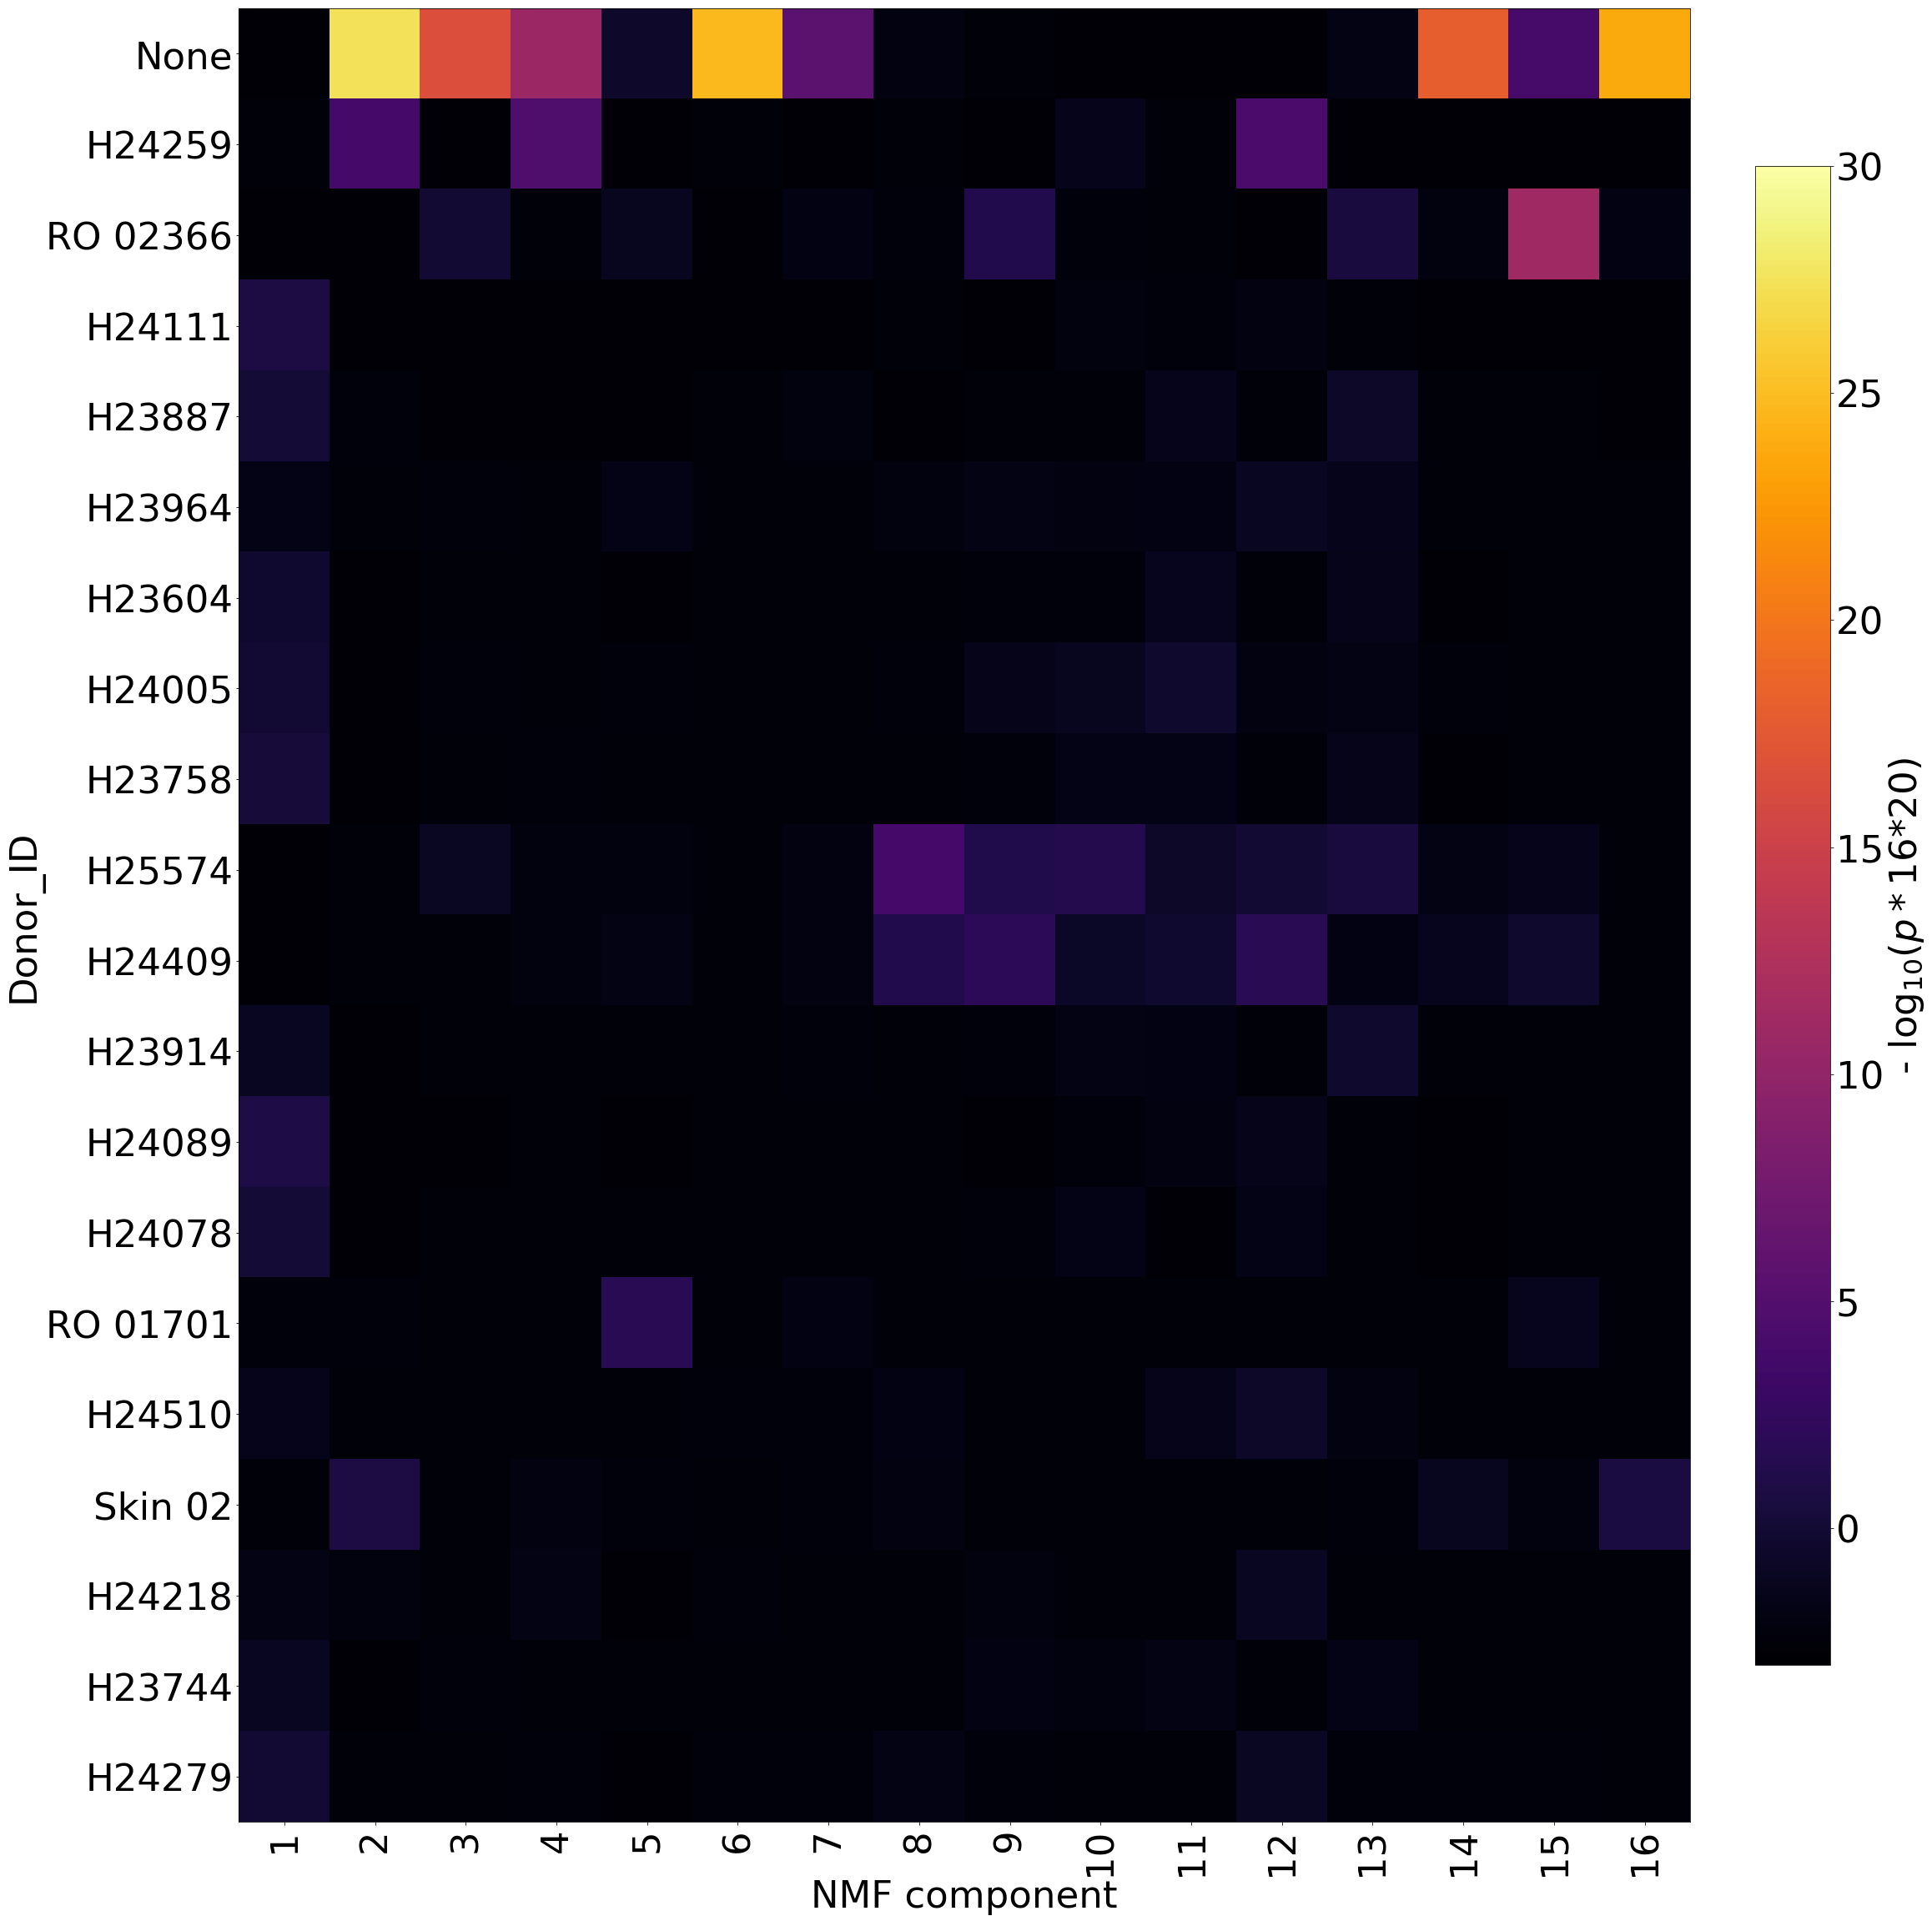

<Figure size 432x288 with 0 Axes>

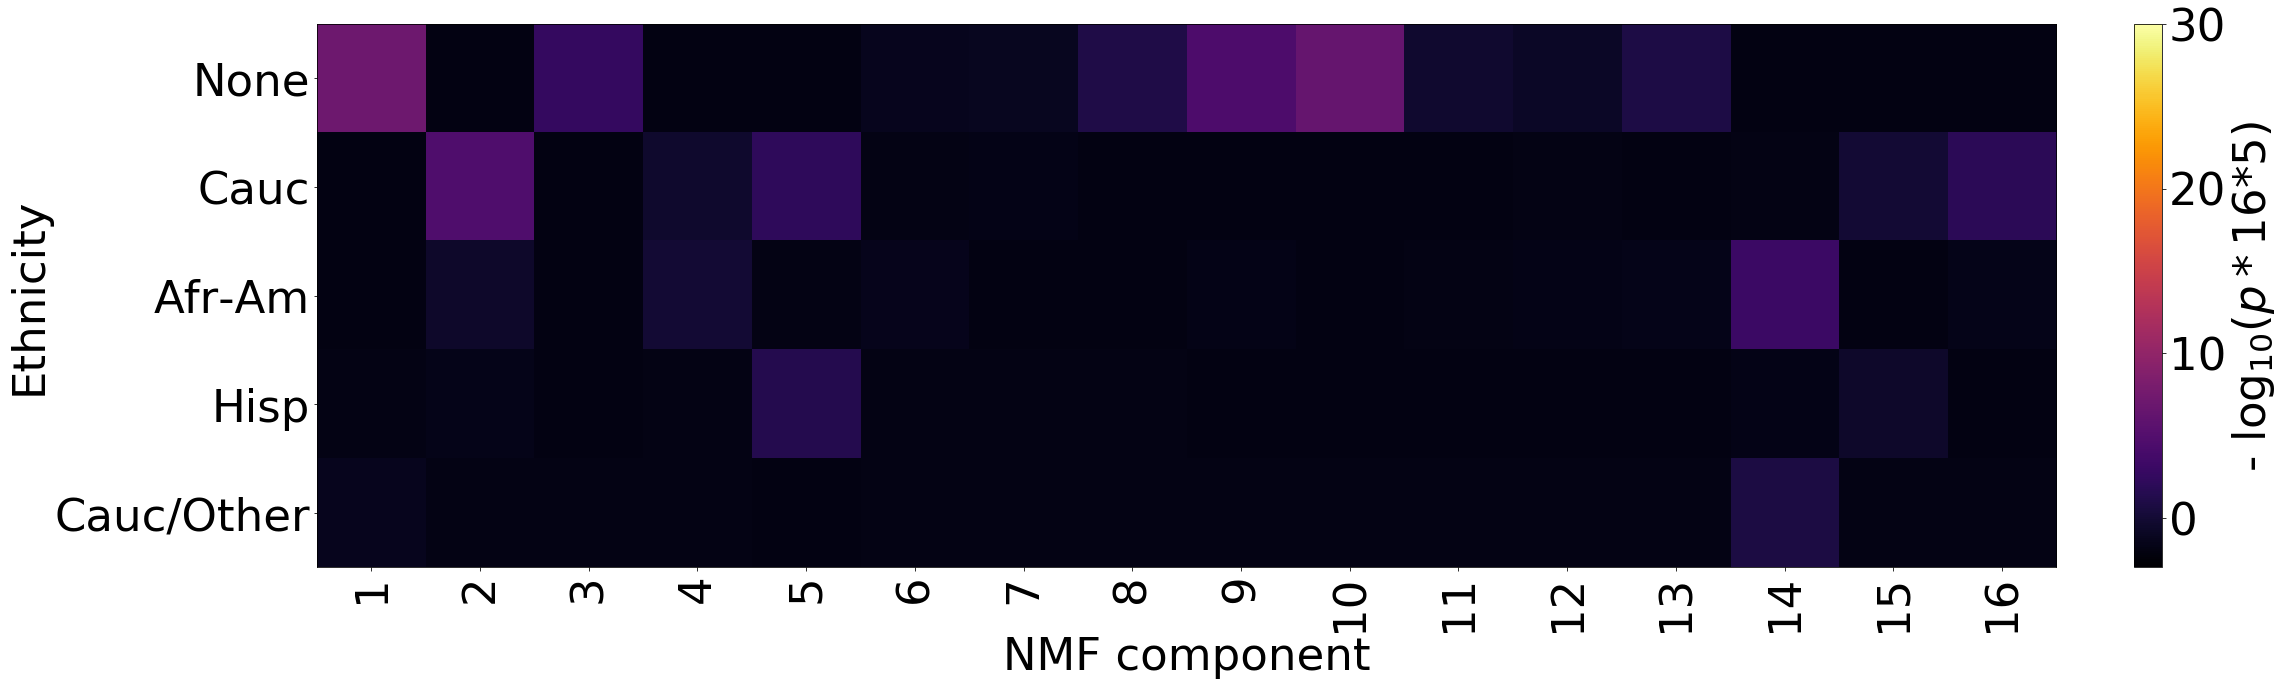

<Figure size 432x288 with 0 Axes>

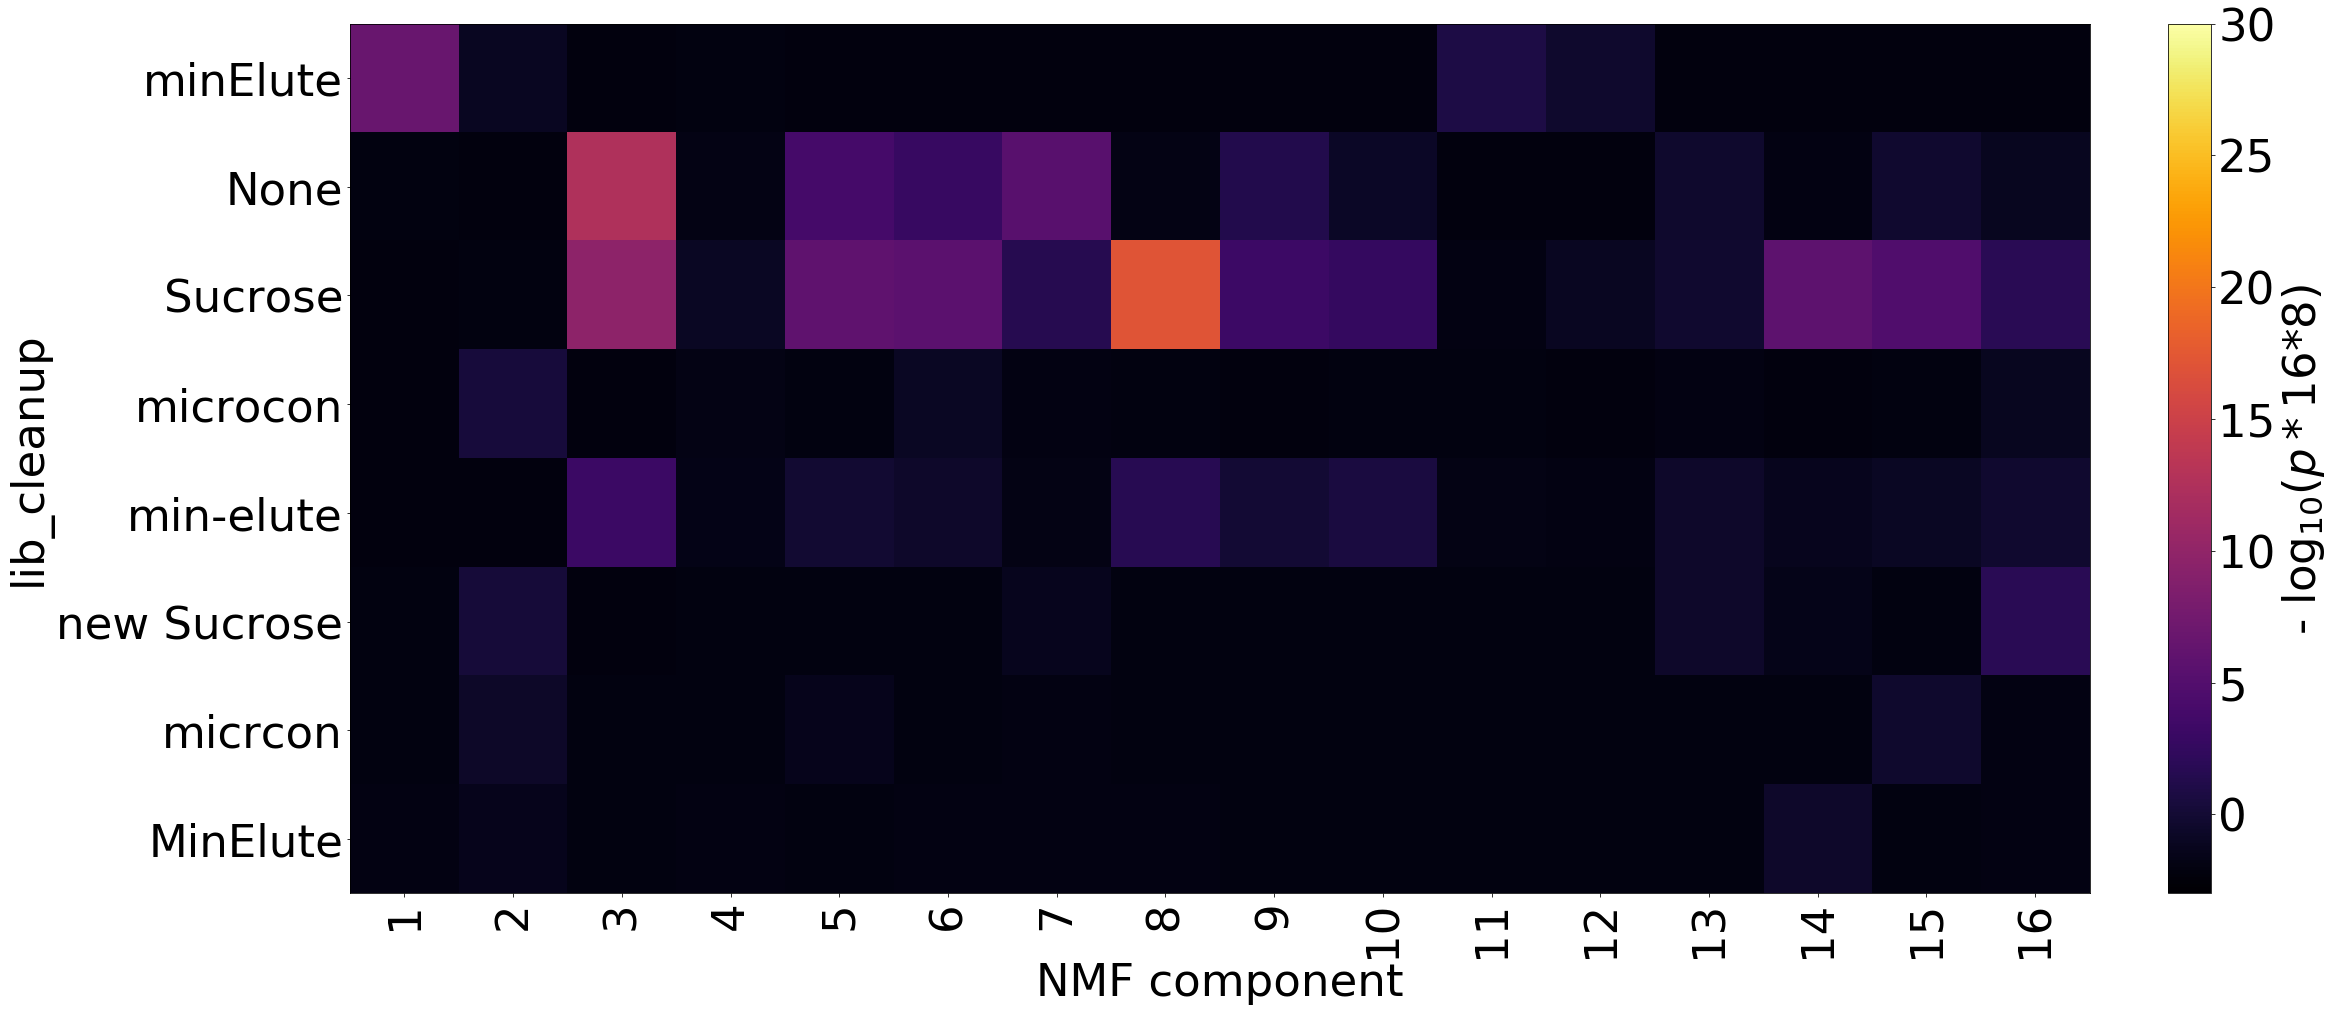

<Figure size 432x288 with 0 Axes>

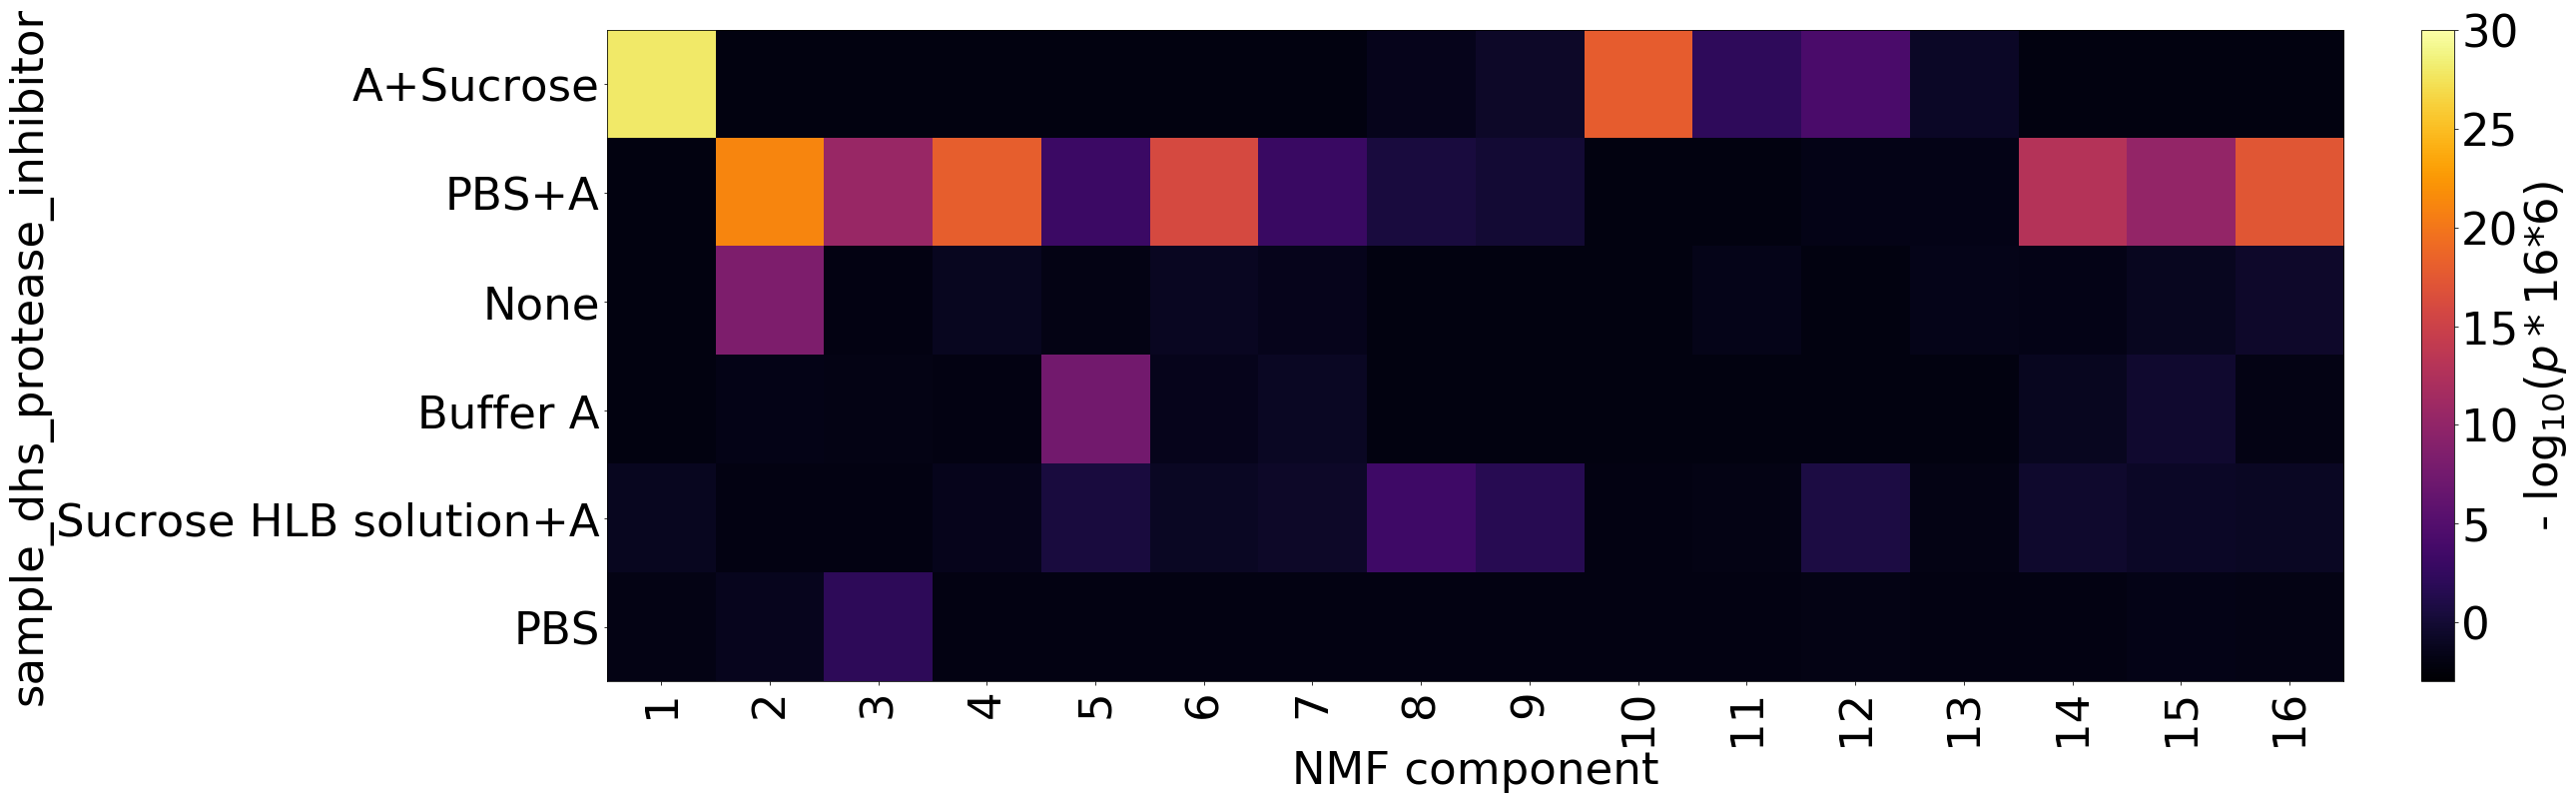

In [15]:
for my_cat_str in categories:
    MetaData[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(MetaData, decomp.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=k,filename_addon='', write_mode=False, verbose=False)









###  Each of the $k=16$ components have strong Mann Whitney U associations with a metadata caterogy (especially: system, subsystem, biological state) that is distinct and unique.

### when we add a 17th component, it is entirely unclear what additional metadata association we see. 







<Figure size 432x288 with 0 Axes>

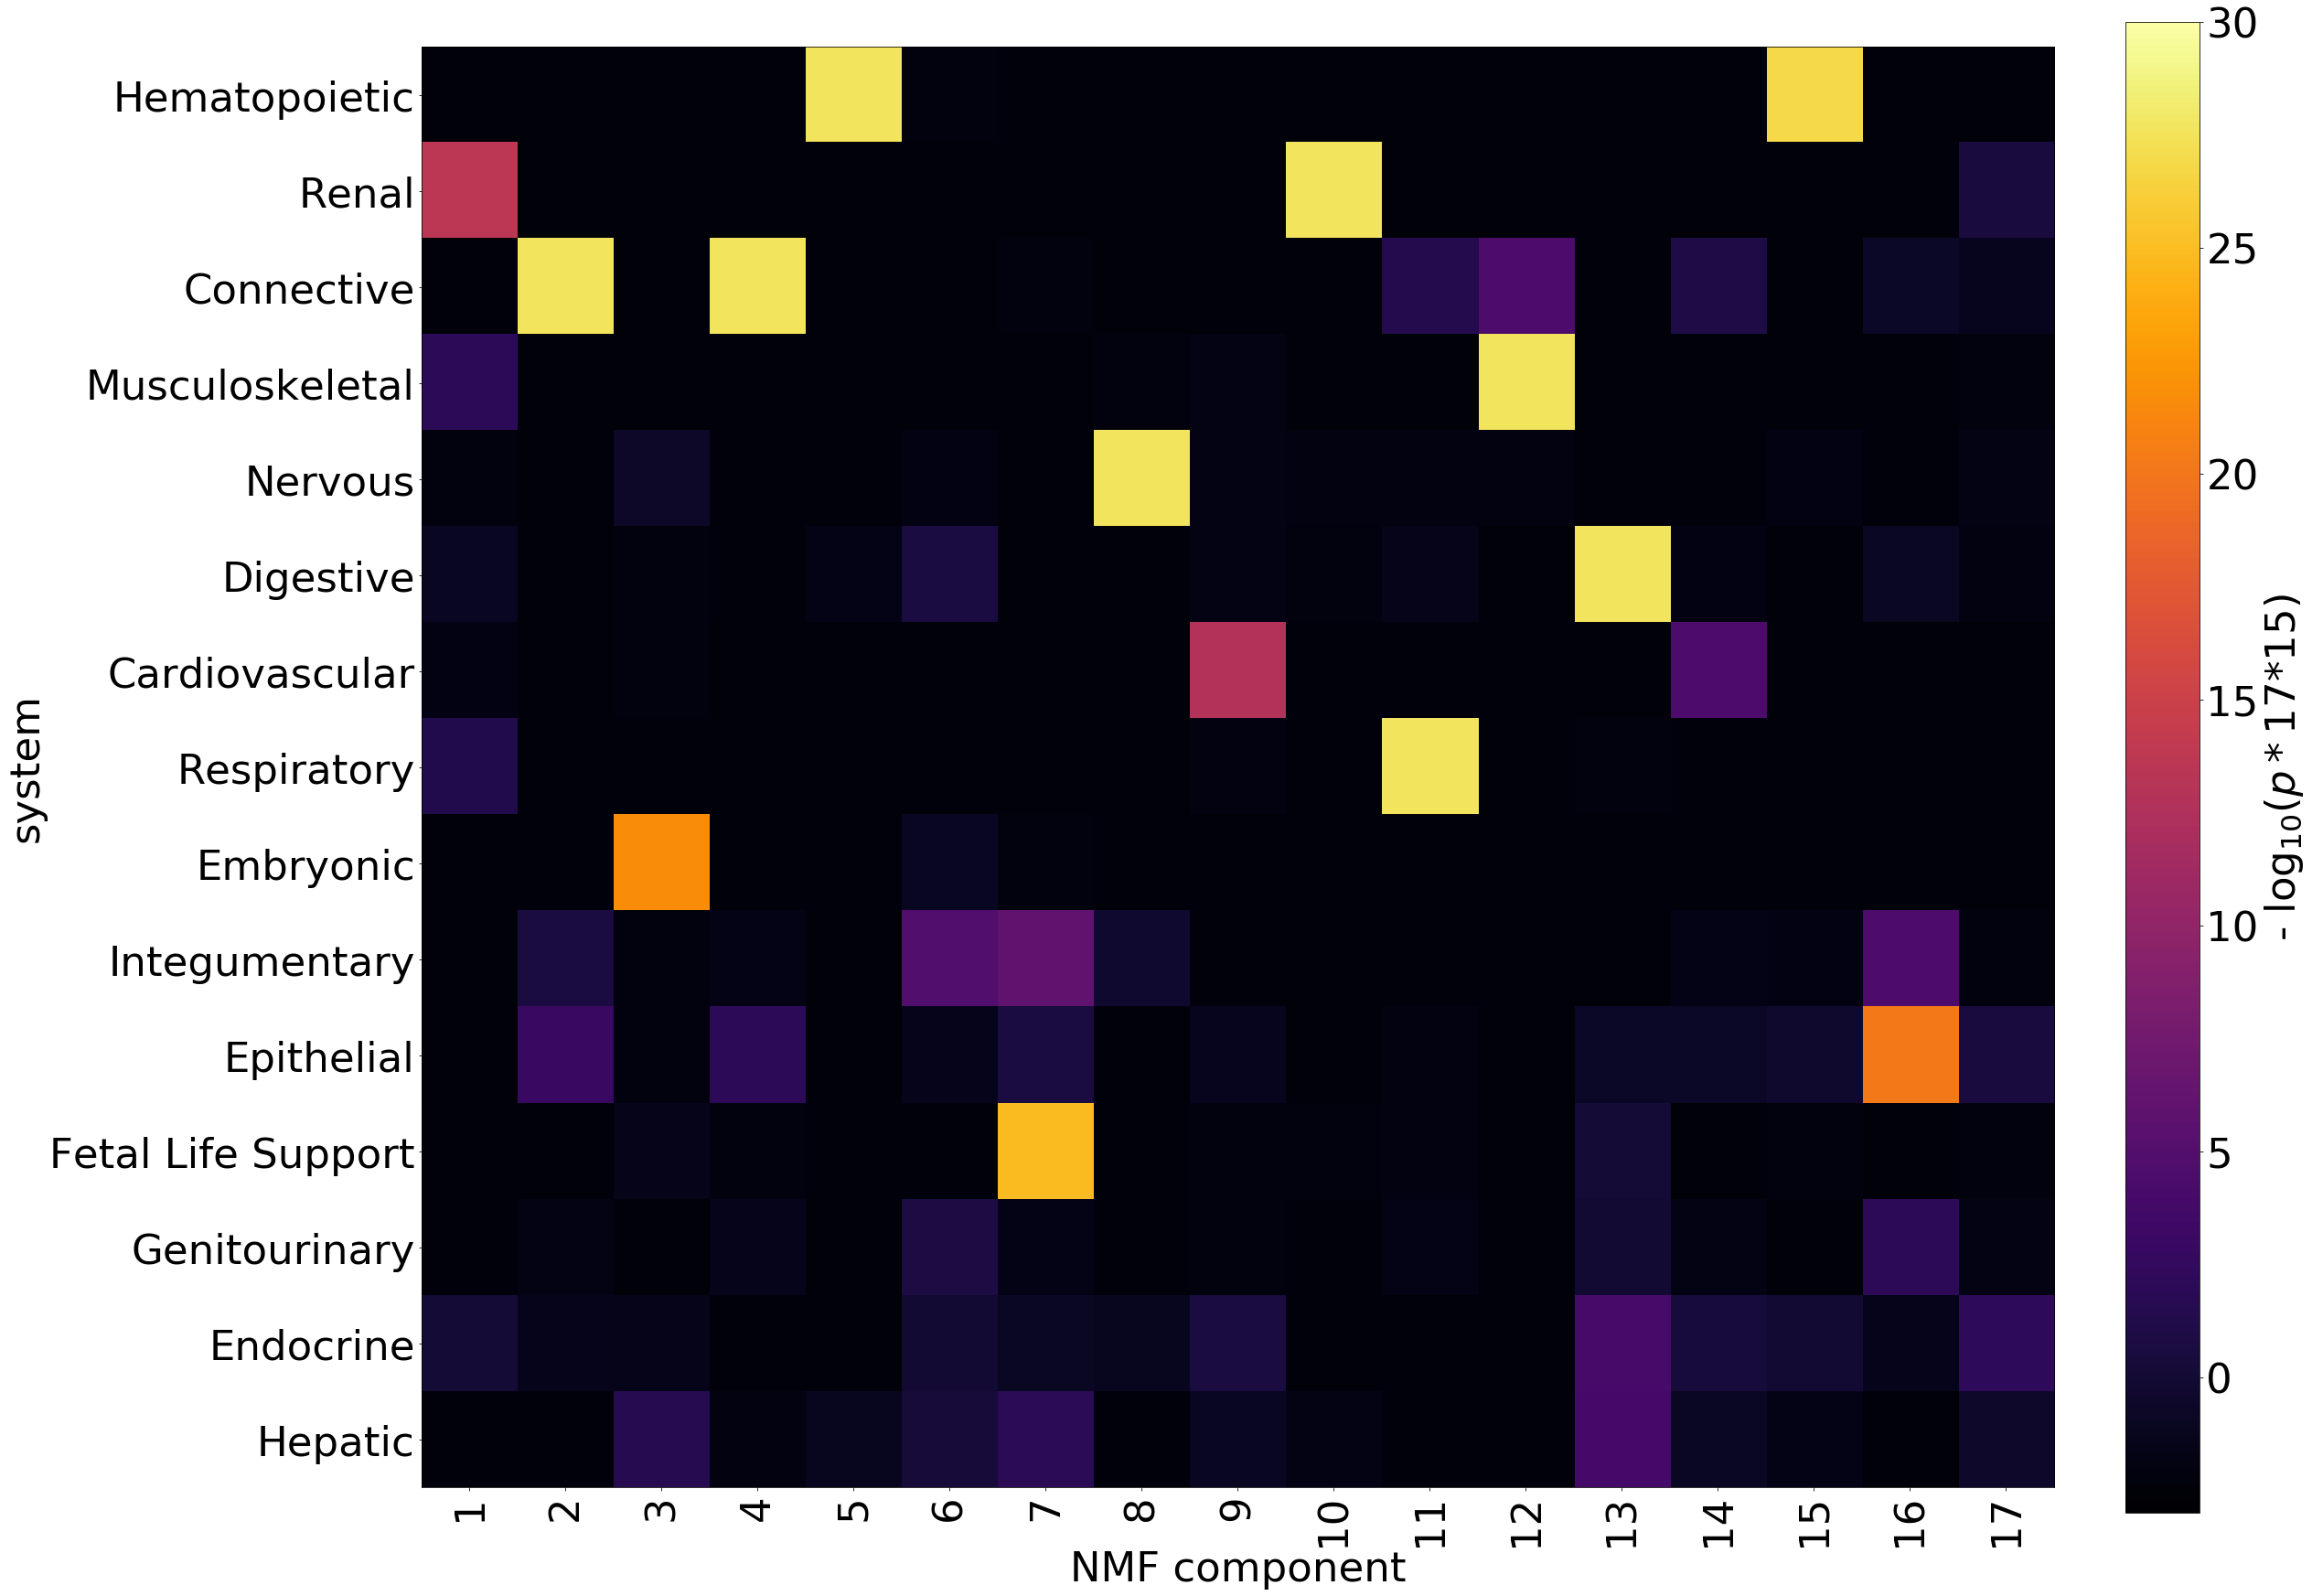

<Figure size 432x288 with 0 Axes>

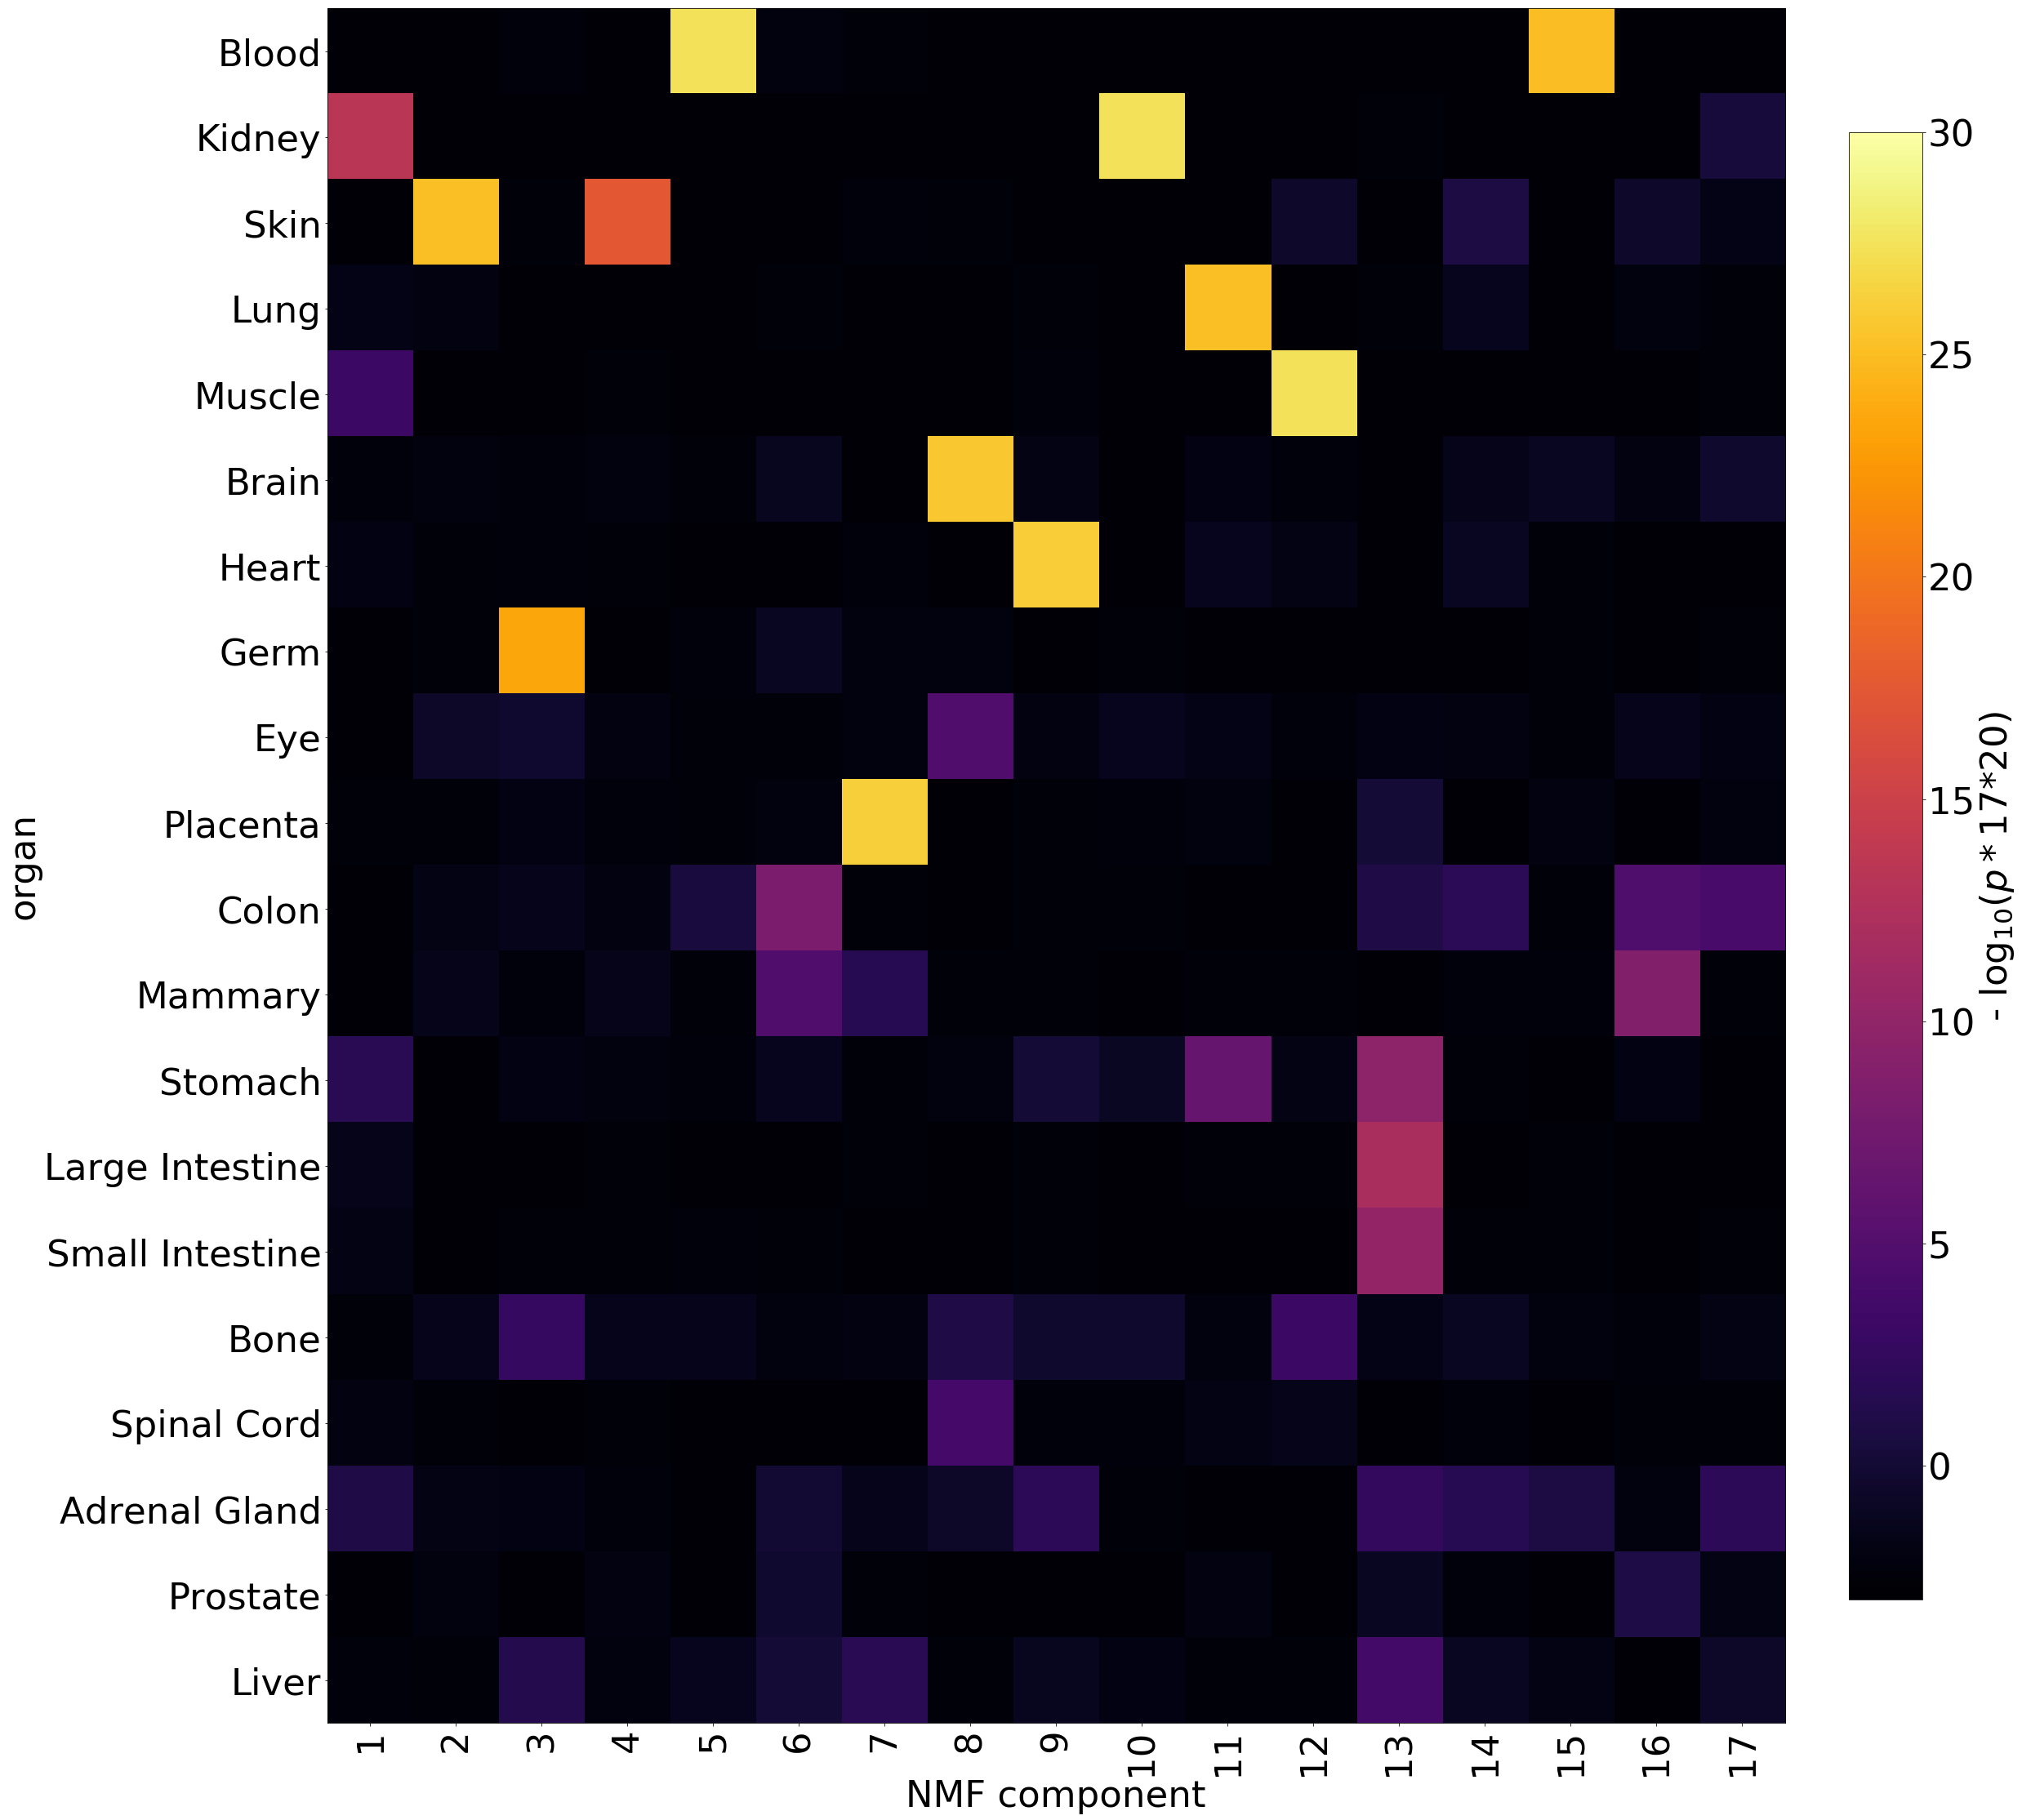

<Figure size 432x288 with 0 Axes>

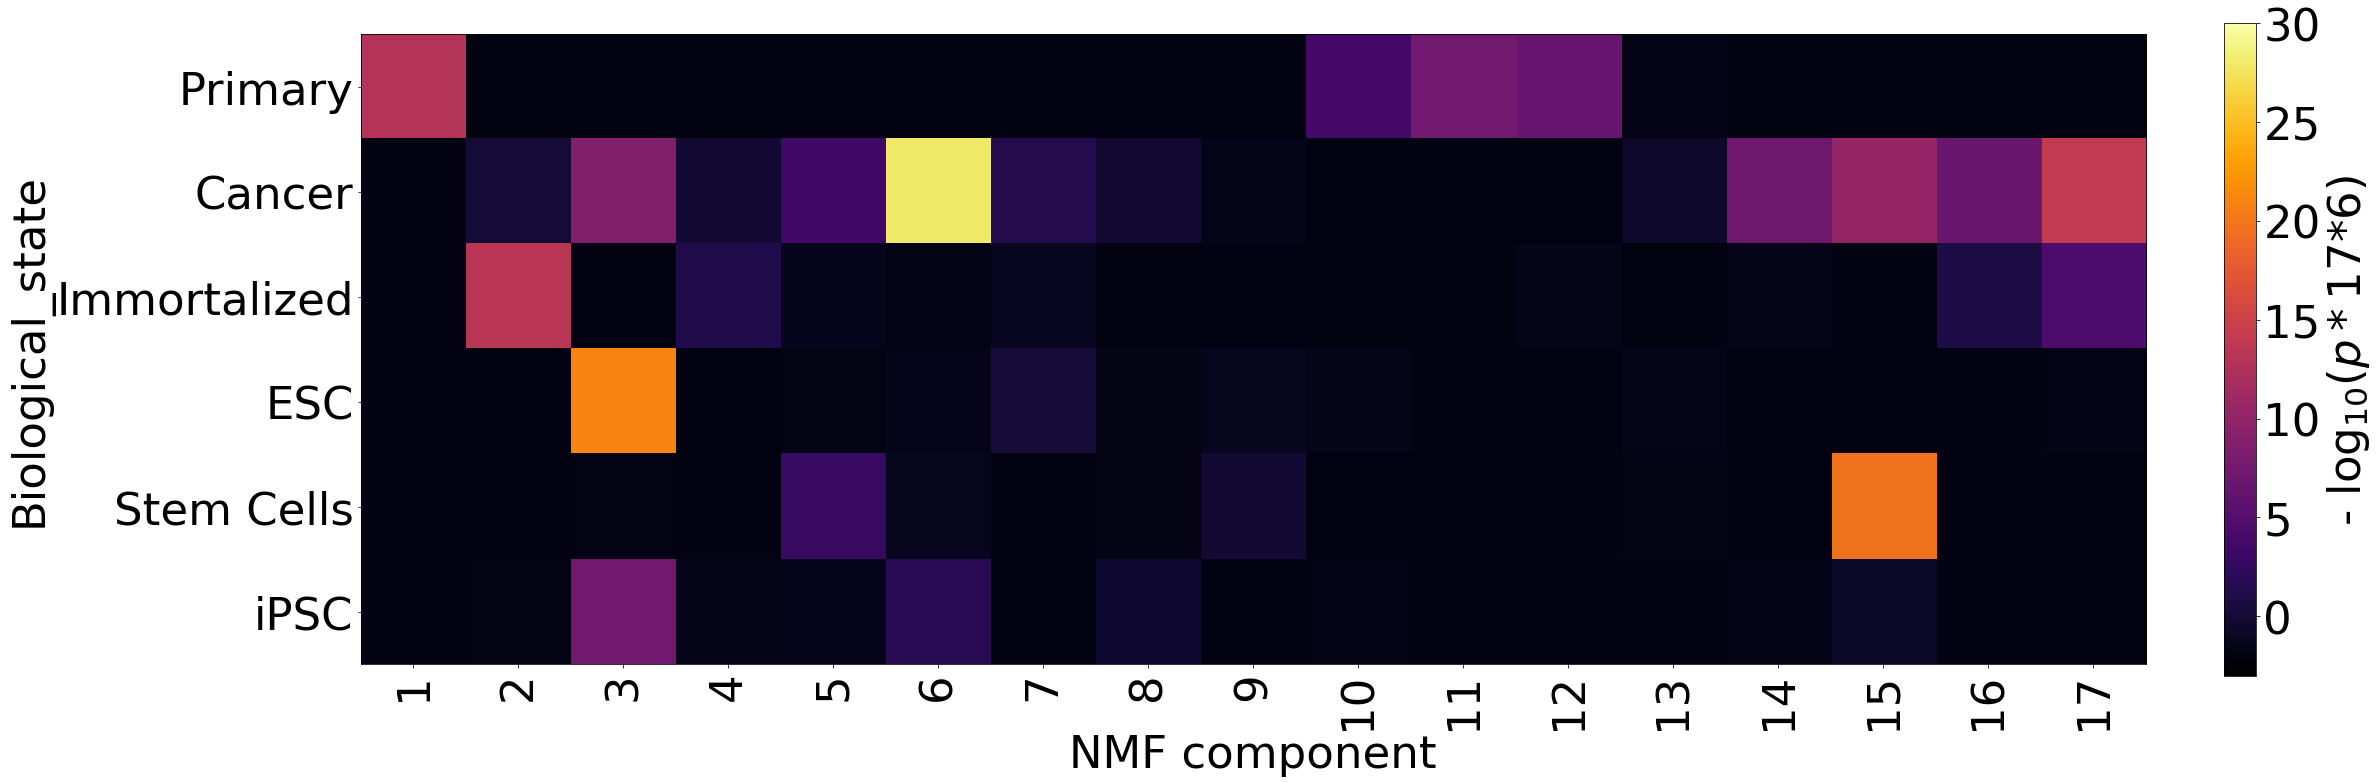

<Figure size 432x288 with 0 Axes>

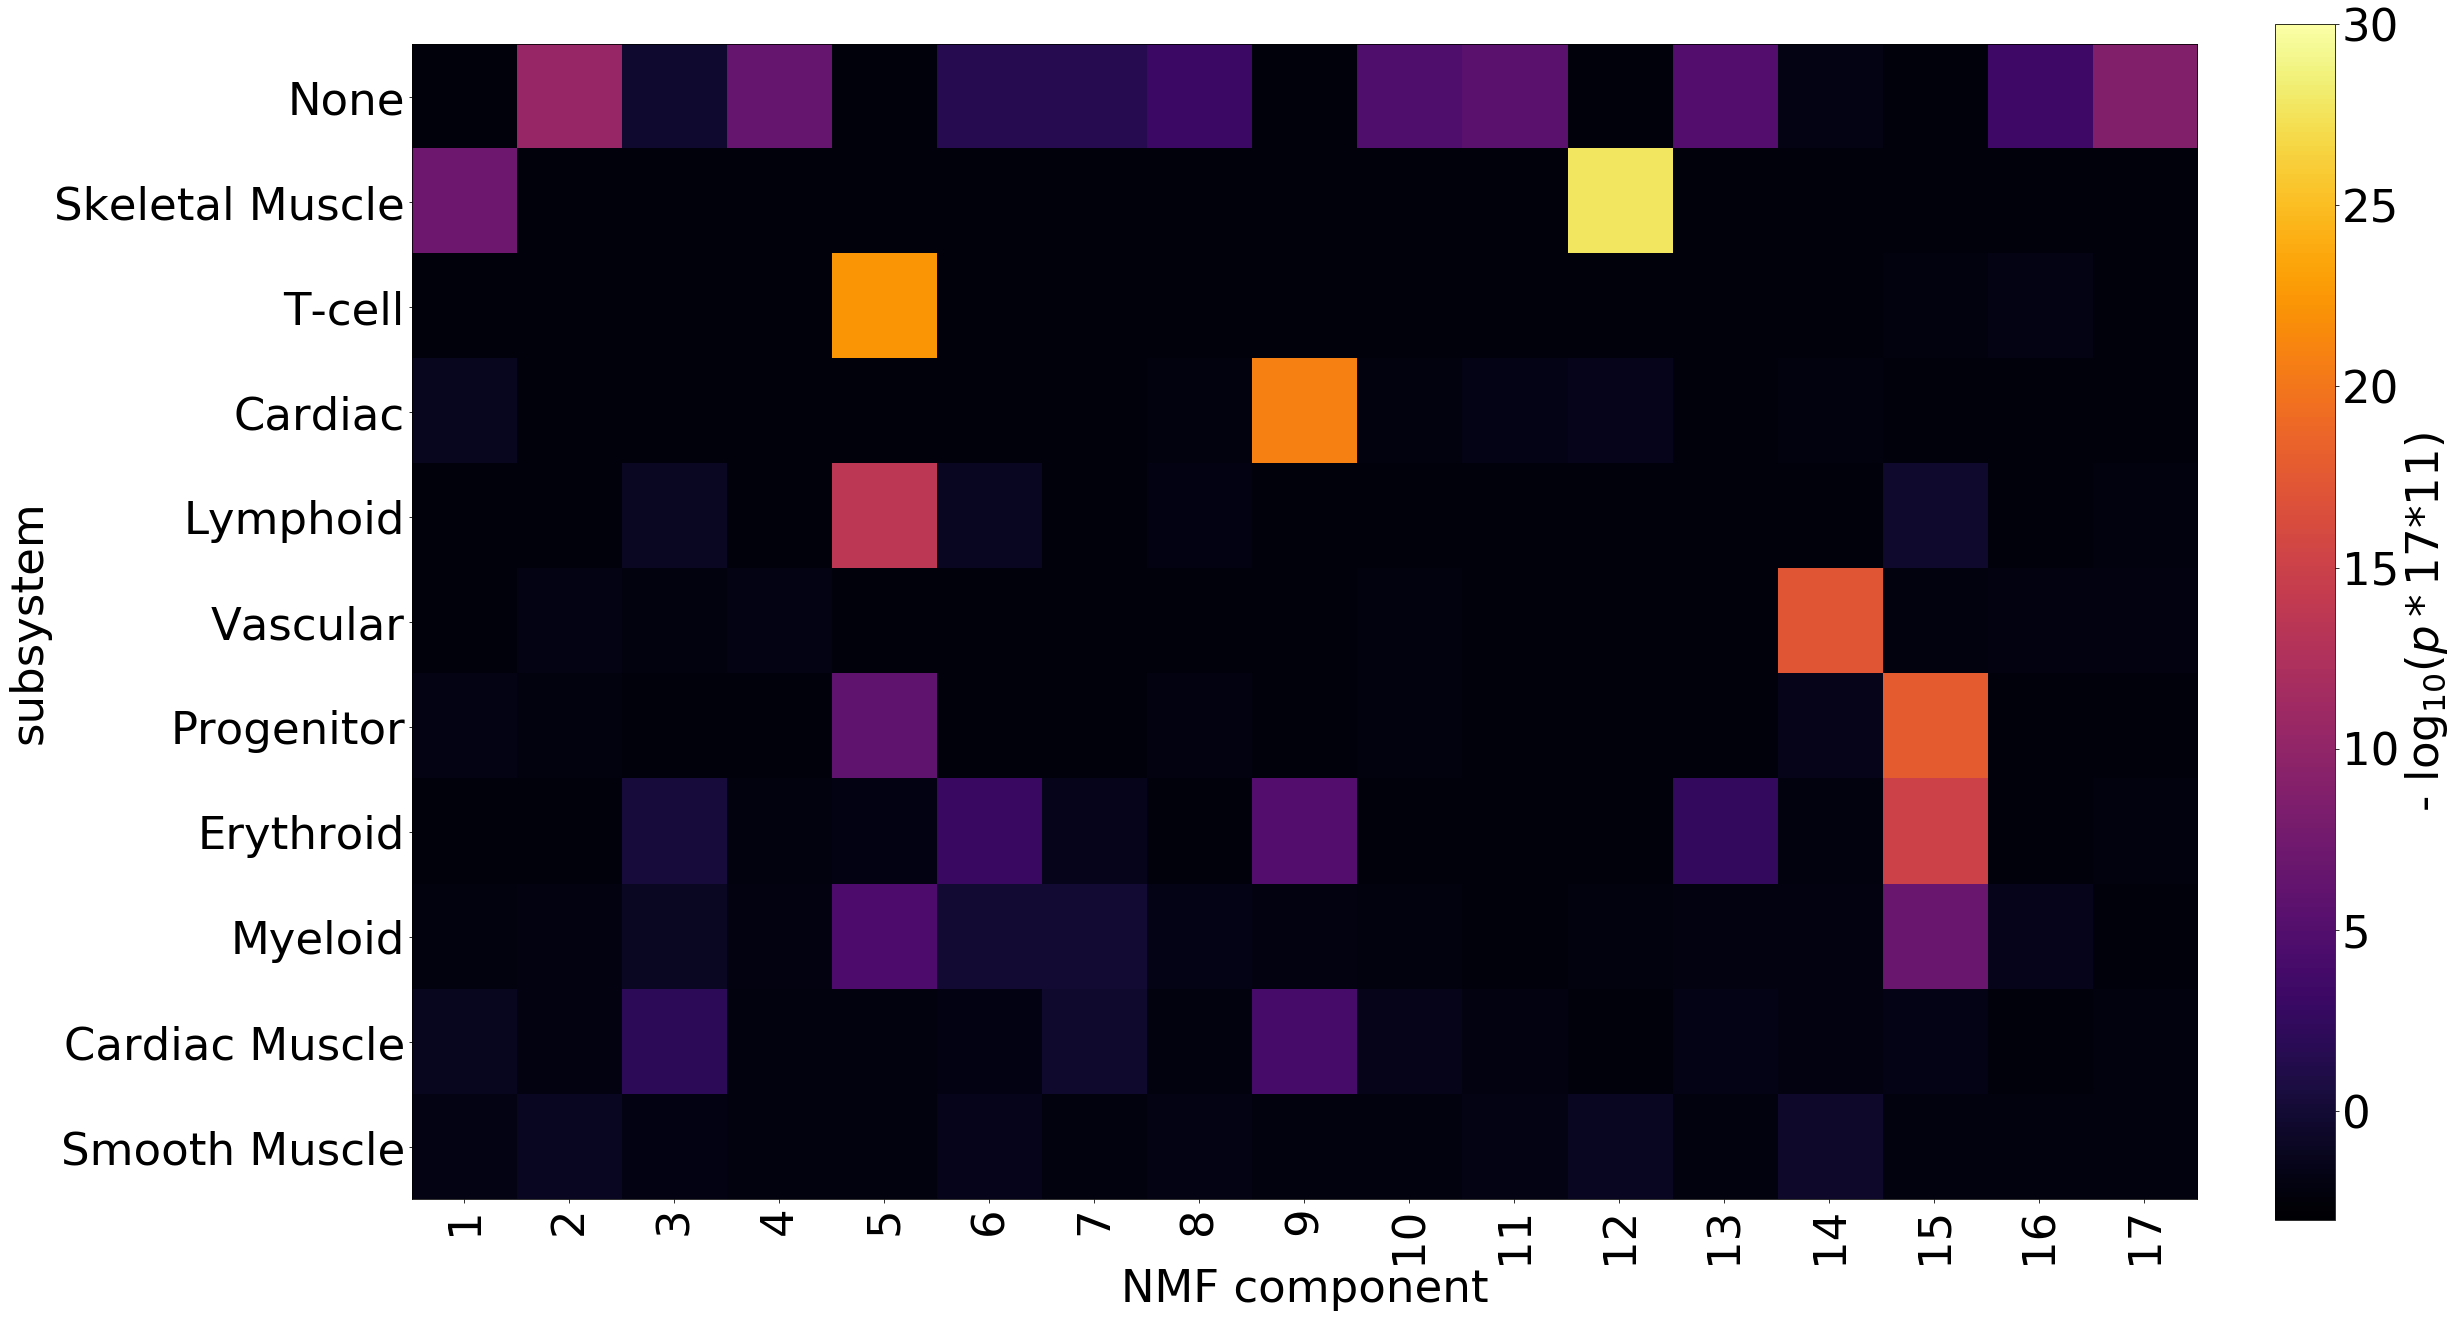

<Figure size 432x288 with 0 Axes>

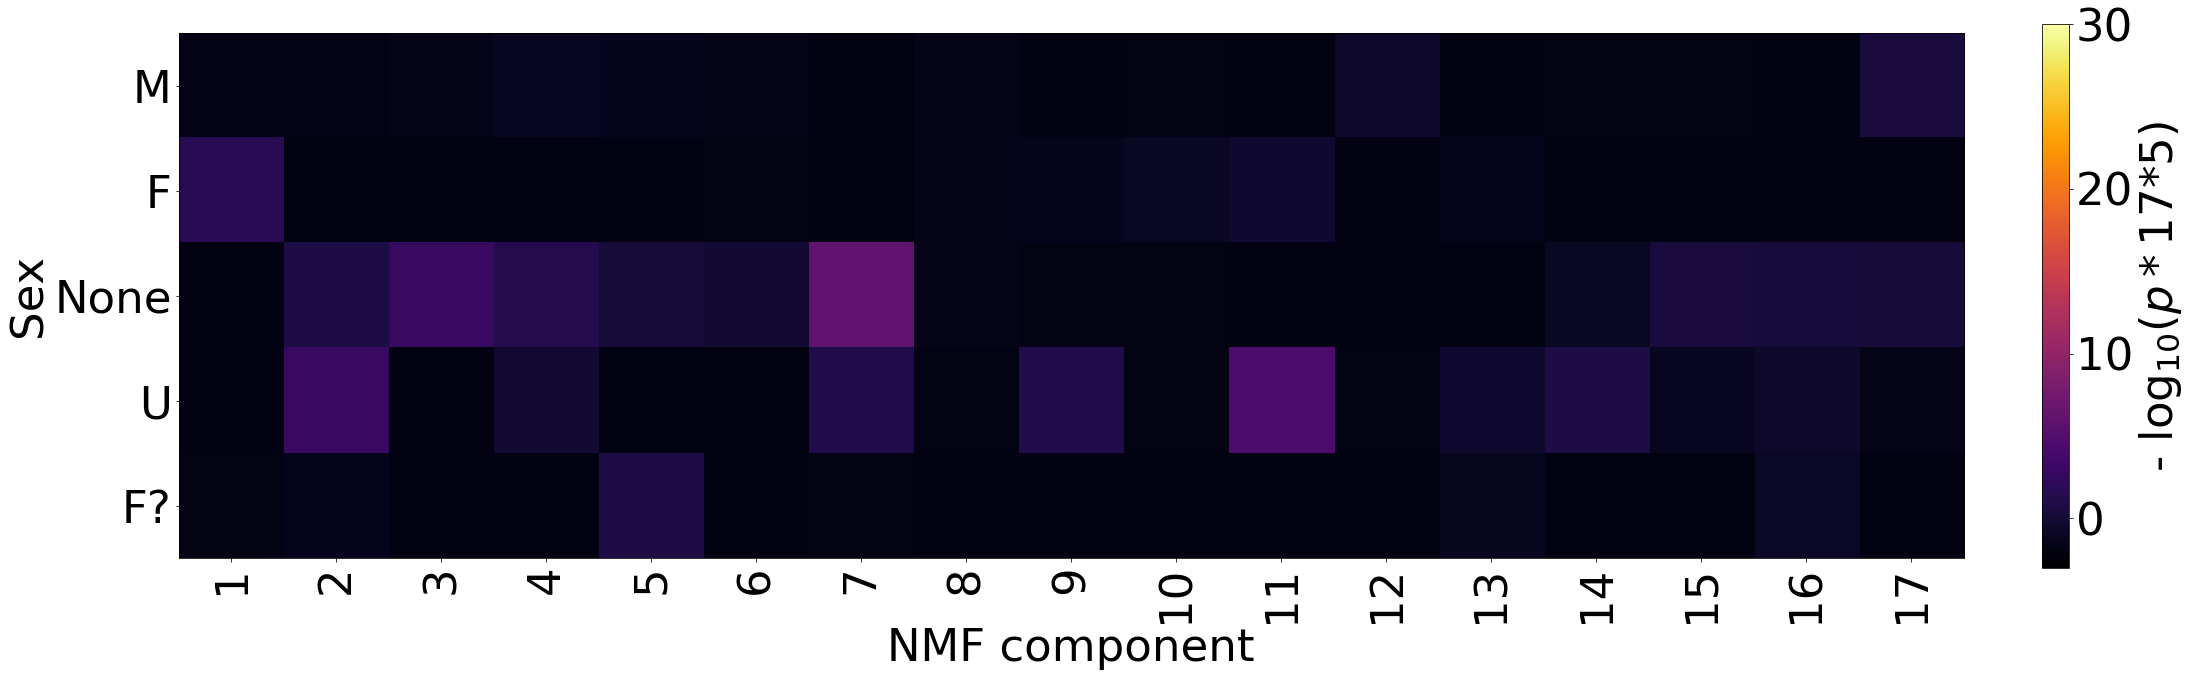

<Figure size 432x288 with 0 Axes>

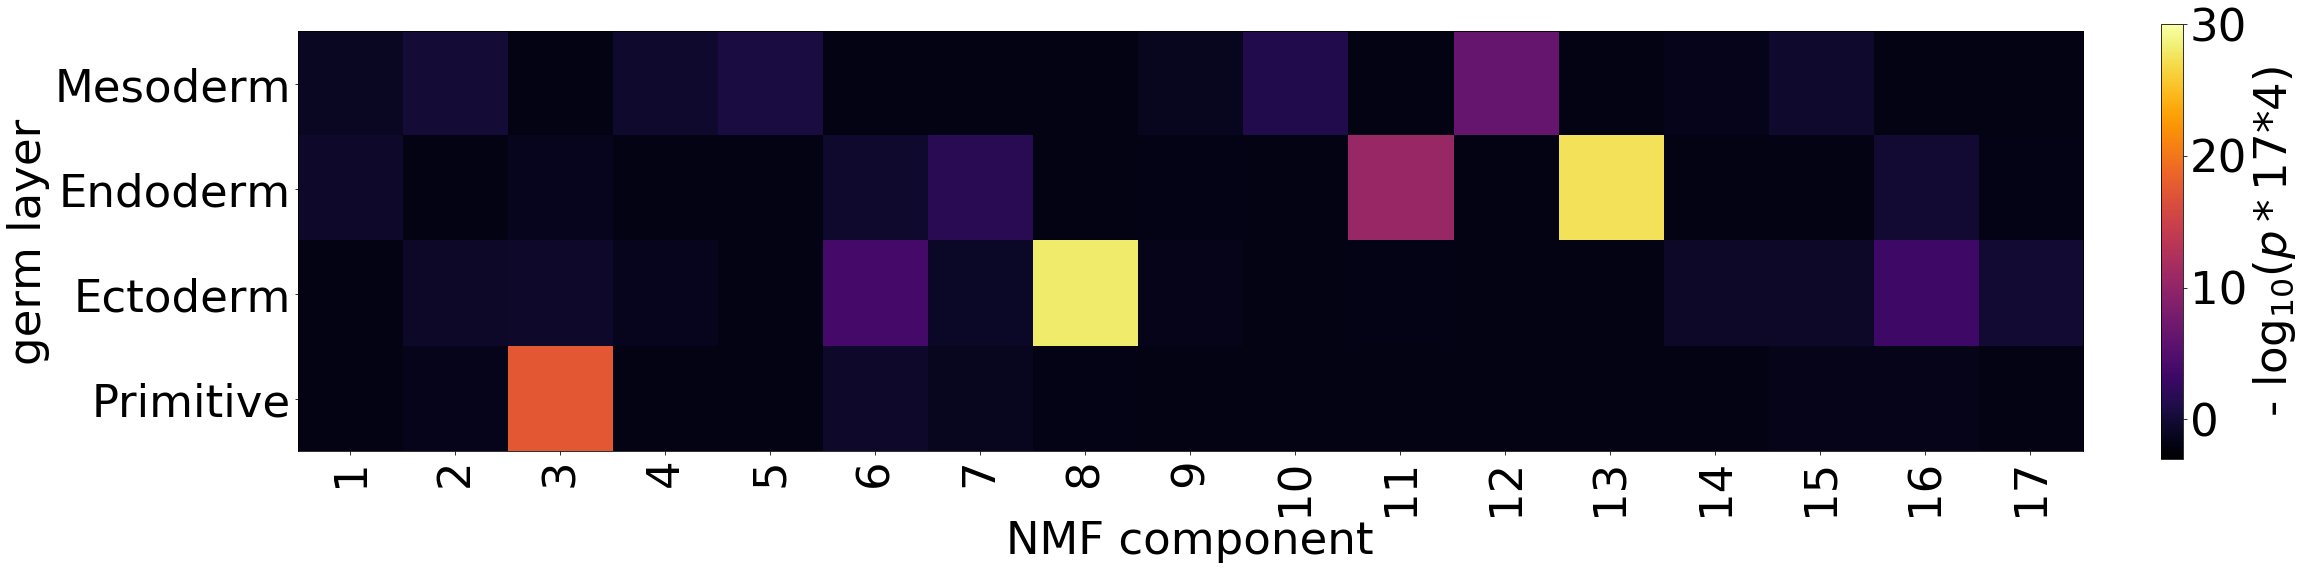

<Figure size 432x288 with 0 Axes>

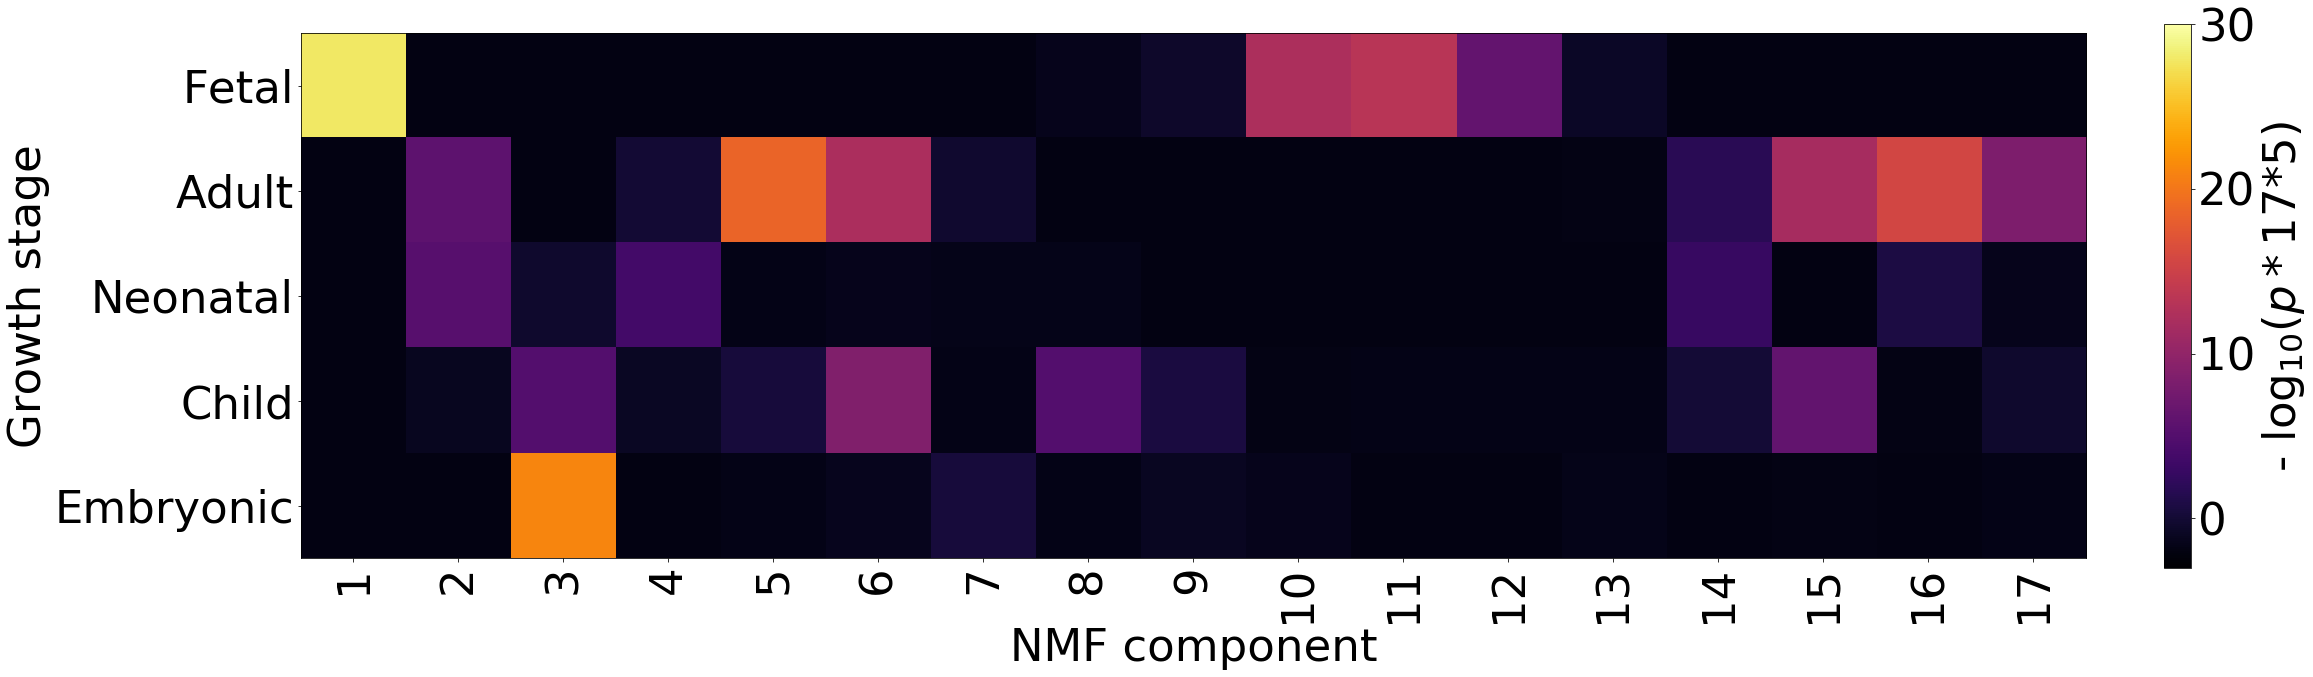

<Figure size 432x288 with 0 Axes>

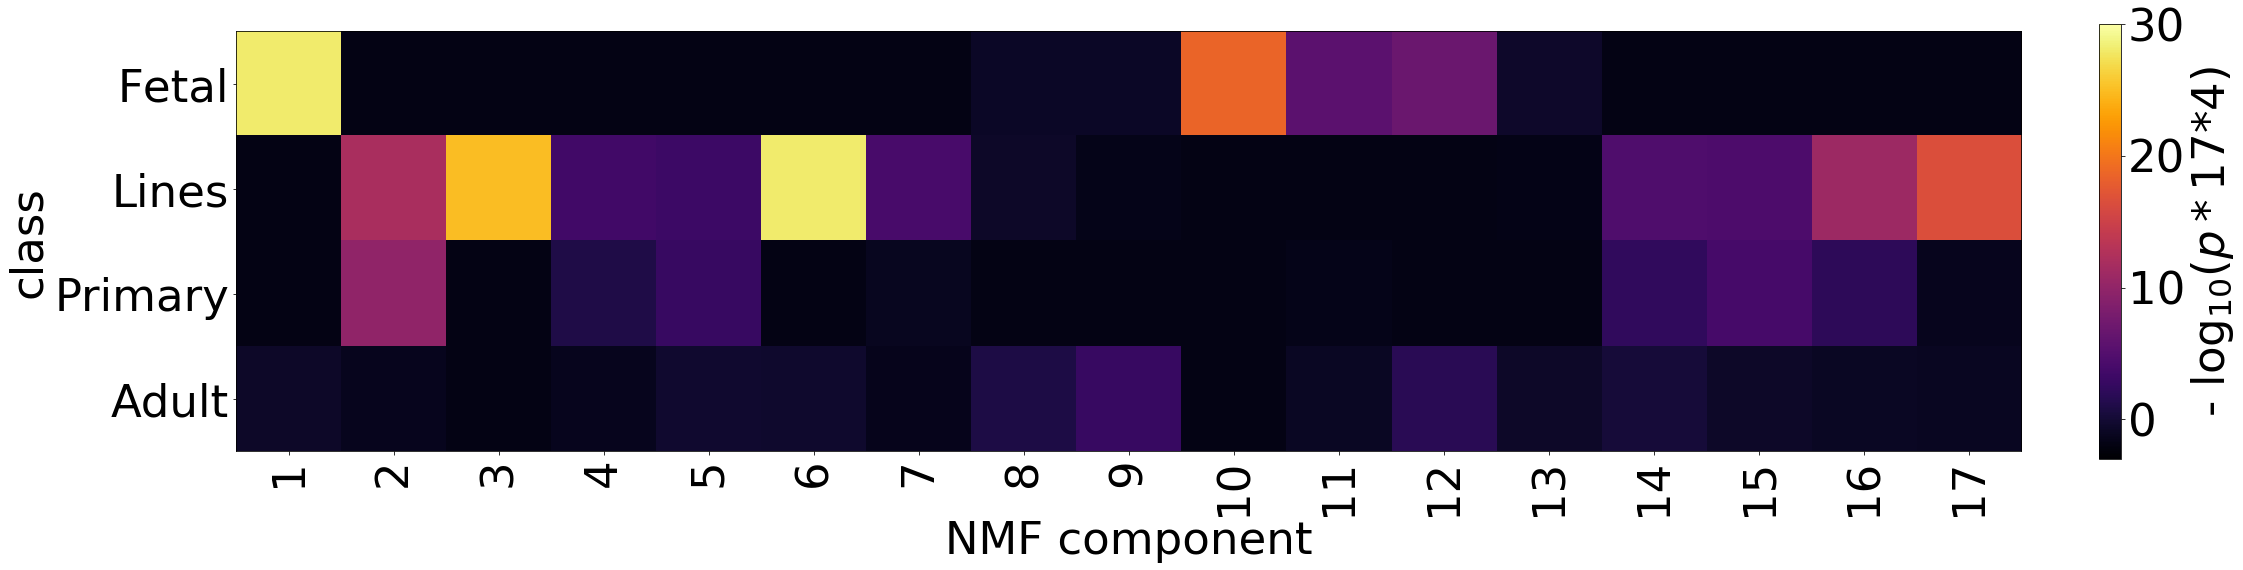

<Figure size 432x288 with 0 Axes>

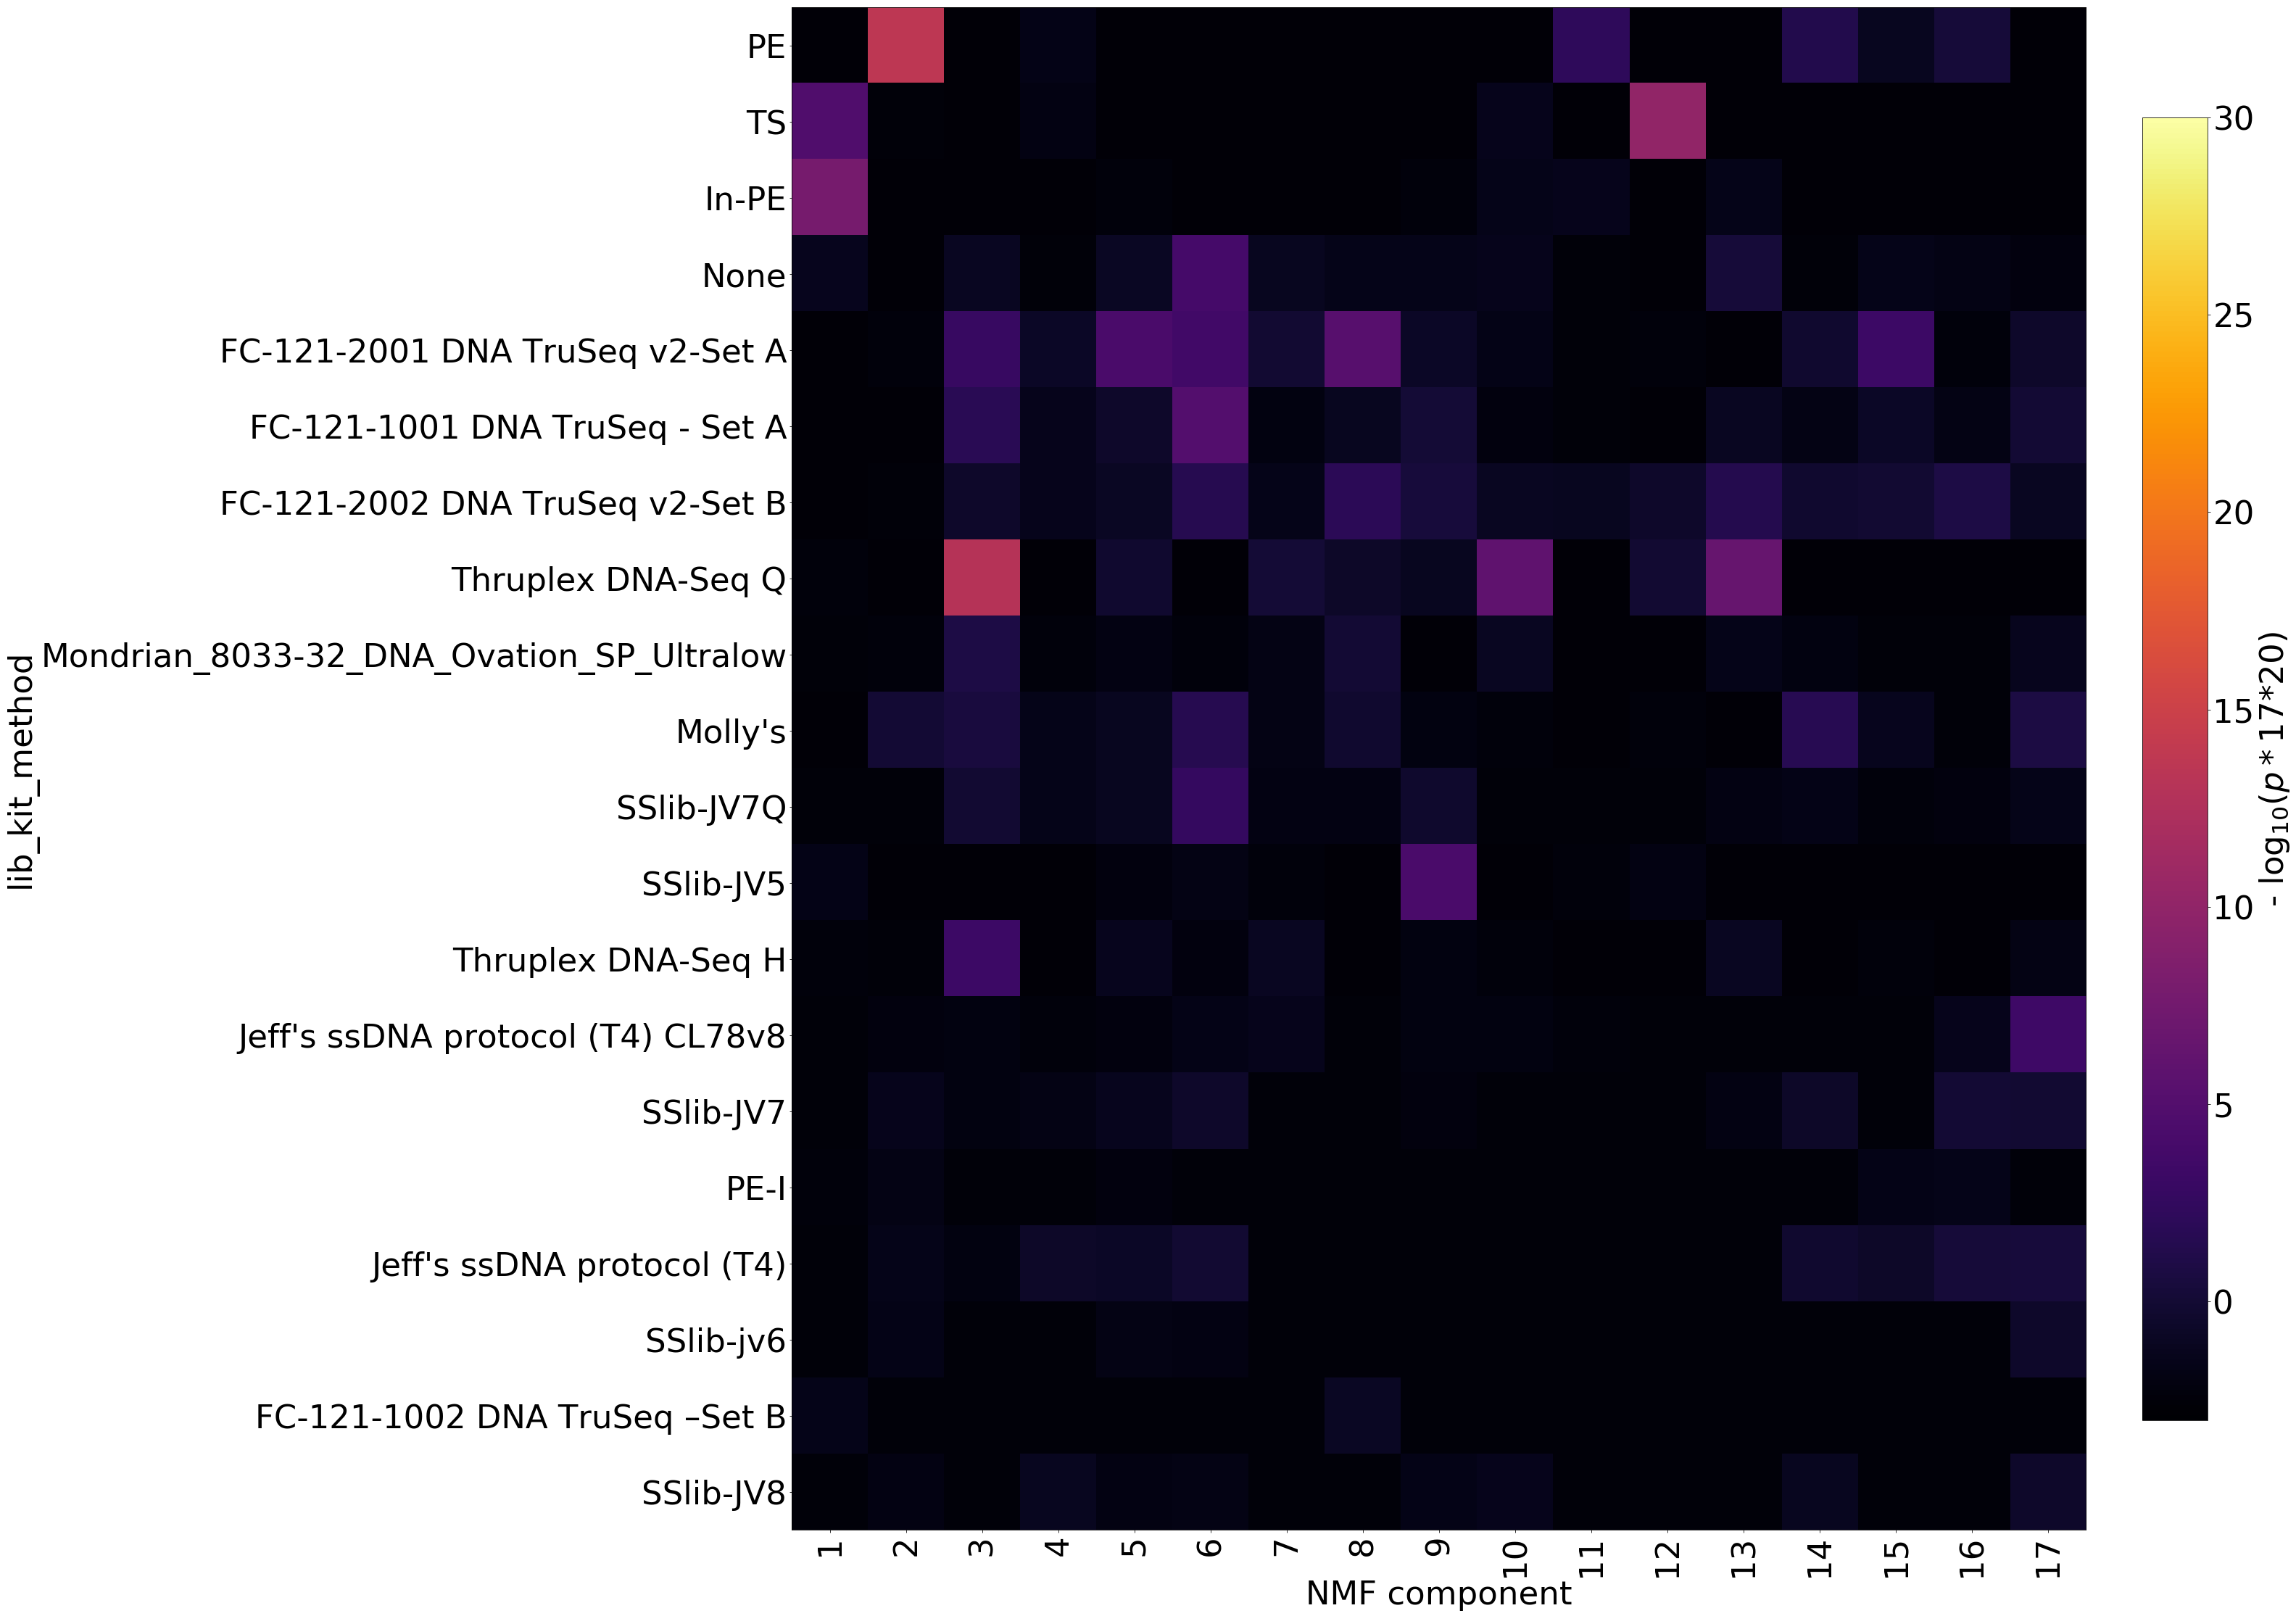

<Figure size 432x288 with 0 Axes>

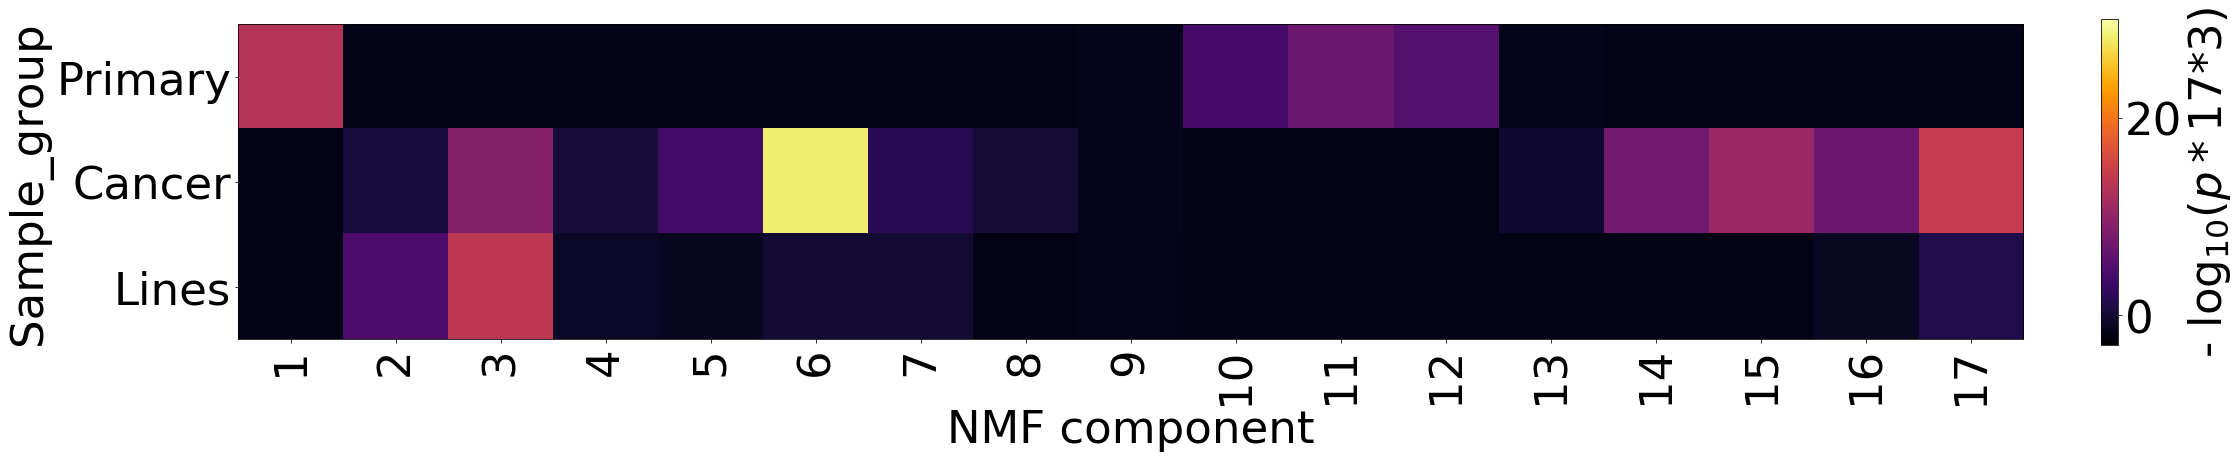

<Figure size 432x288 with 0 Axes>

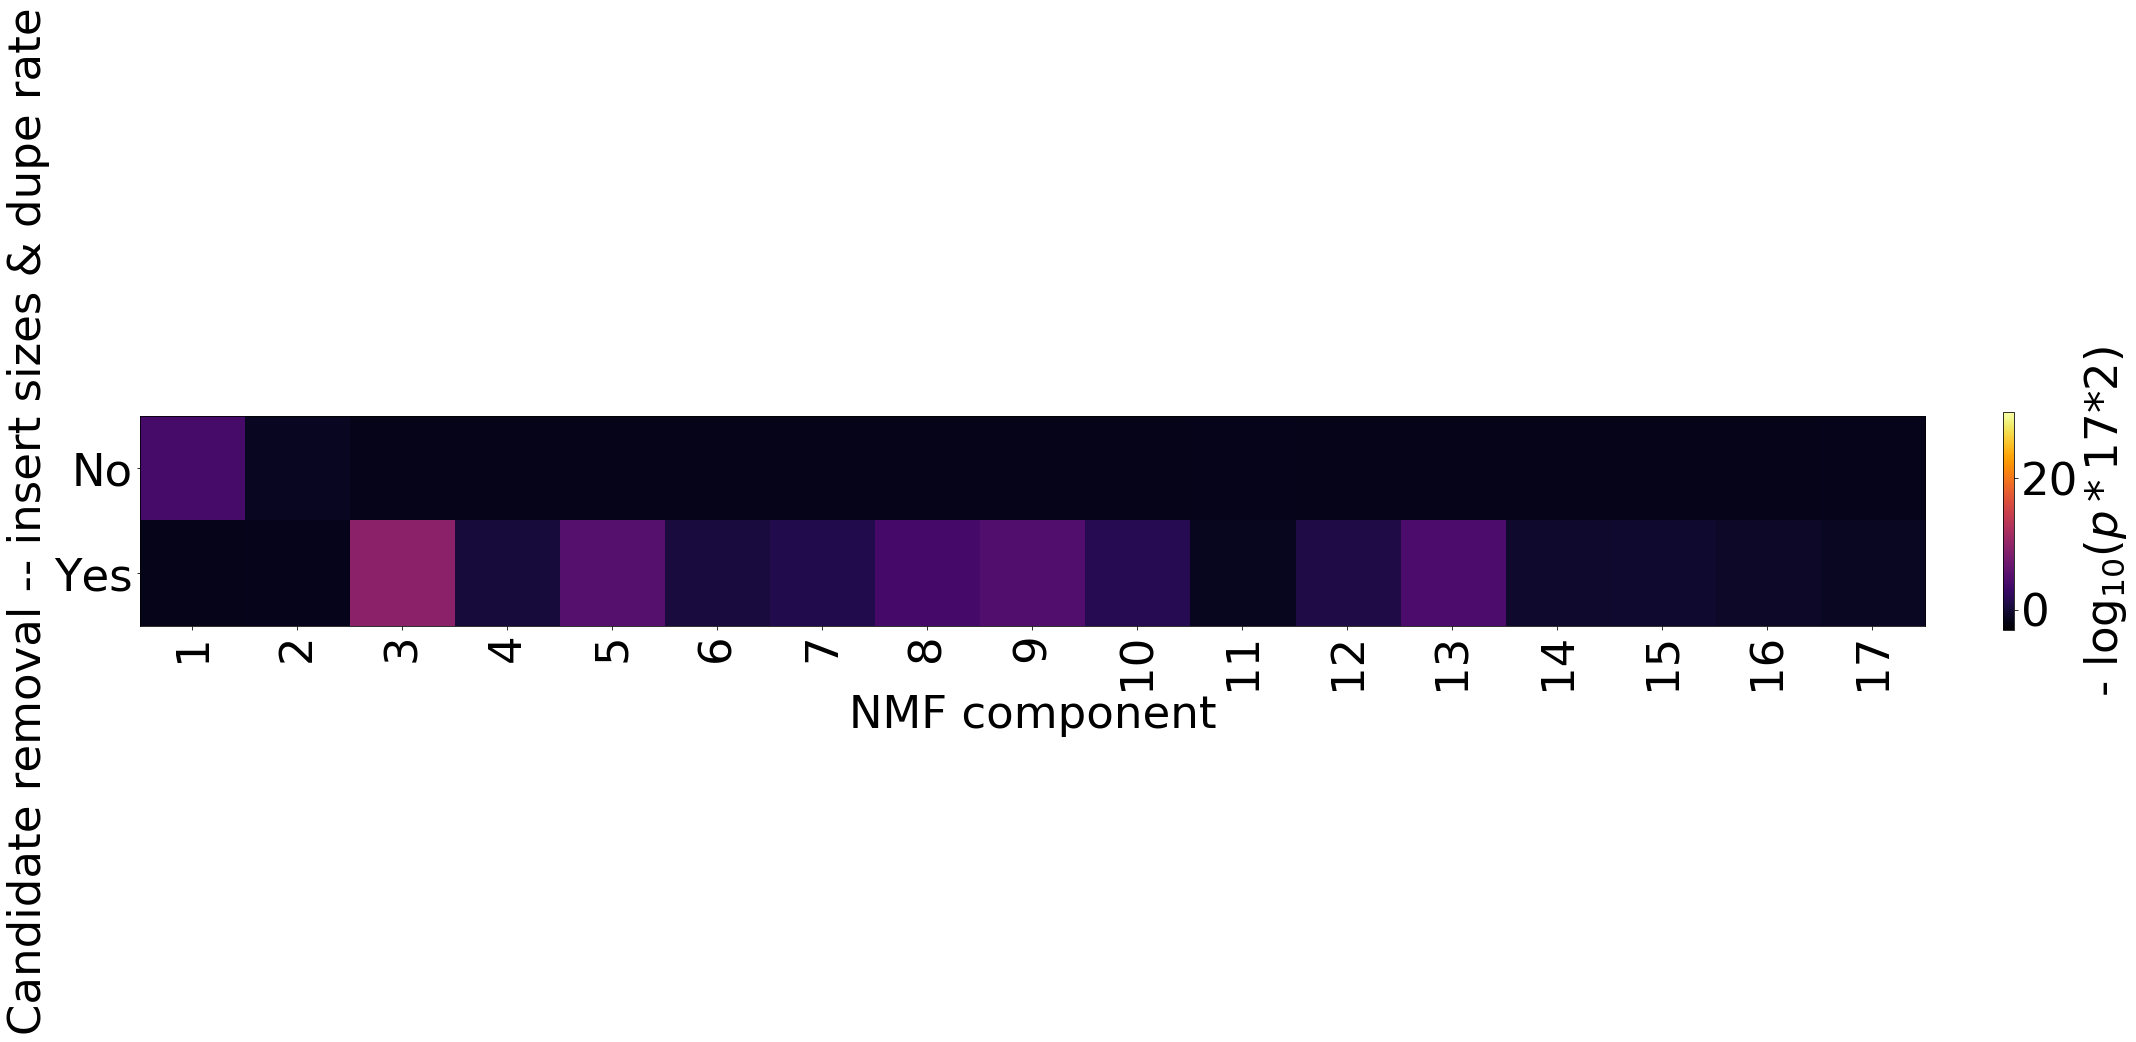

<Figure size 432x288 with 0 Axes>

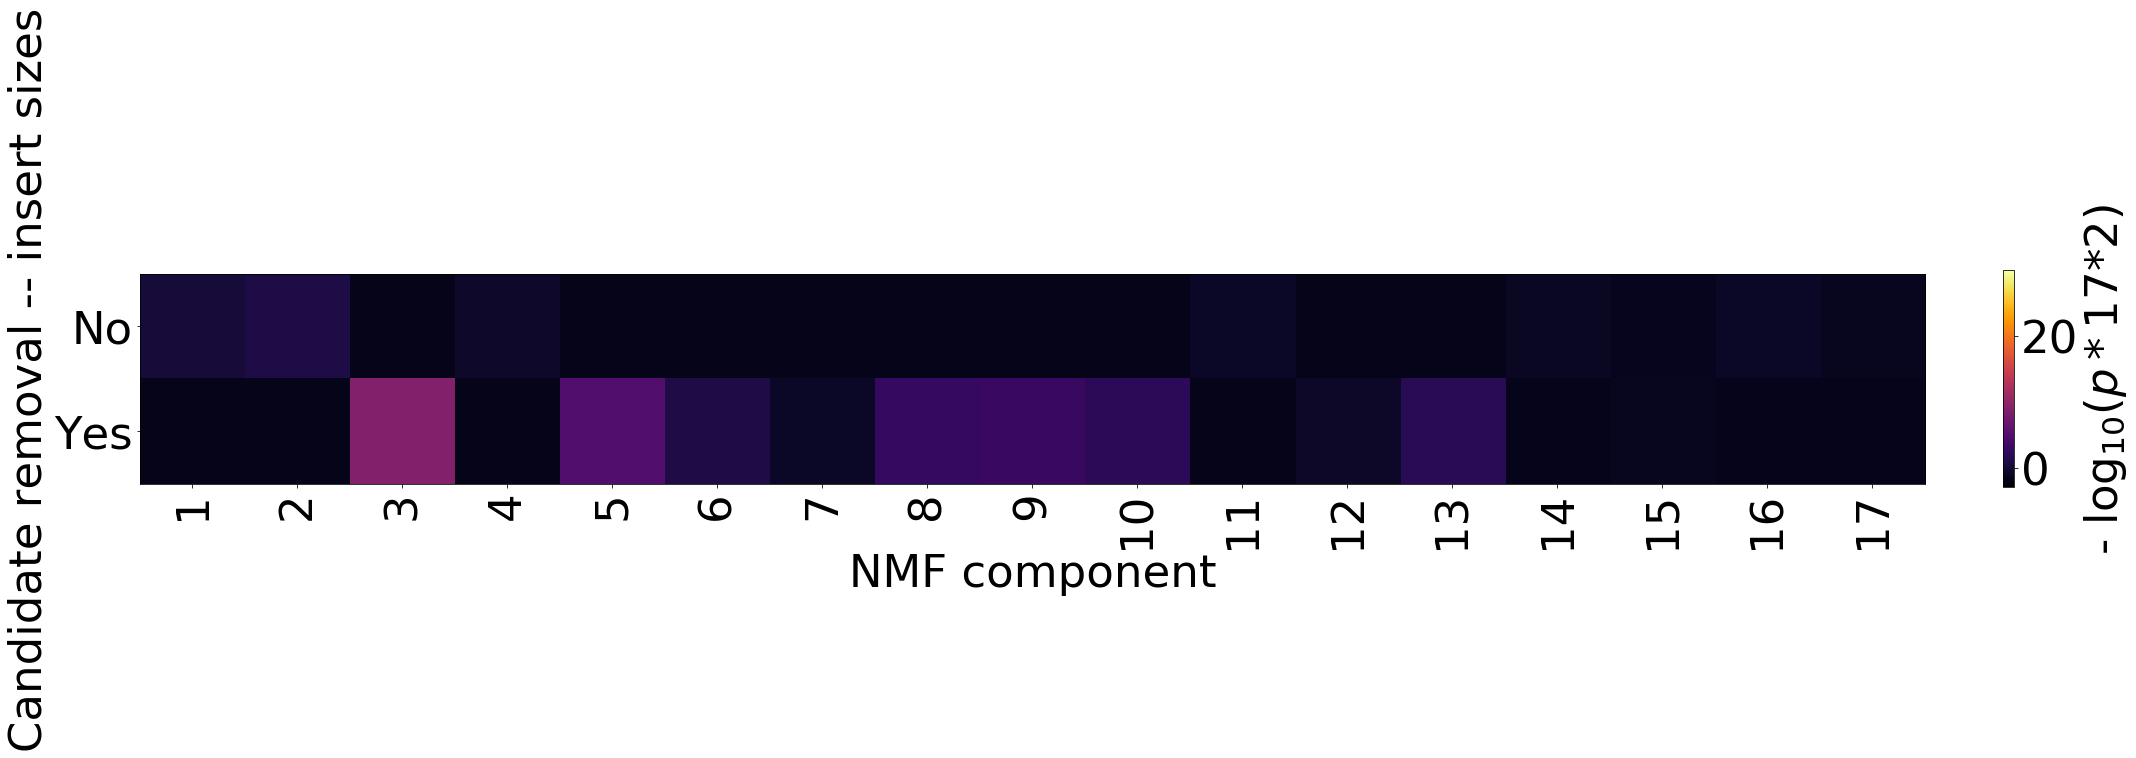

<Figure size 432x288 with 0 Axes>

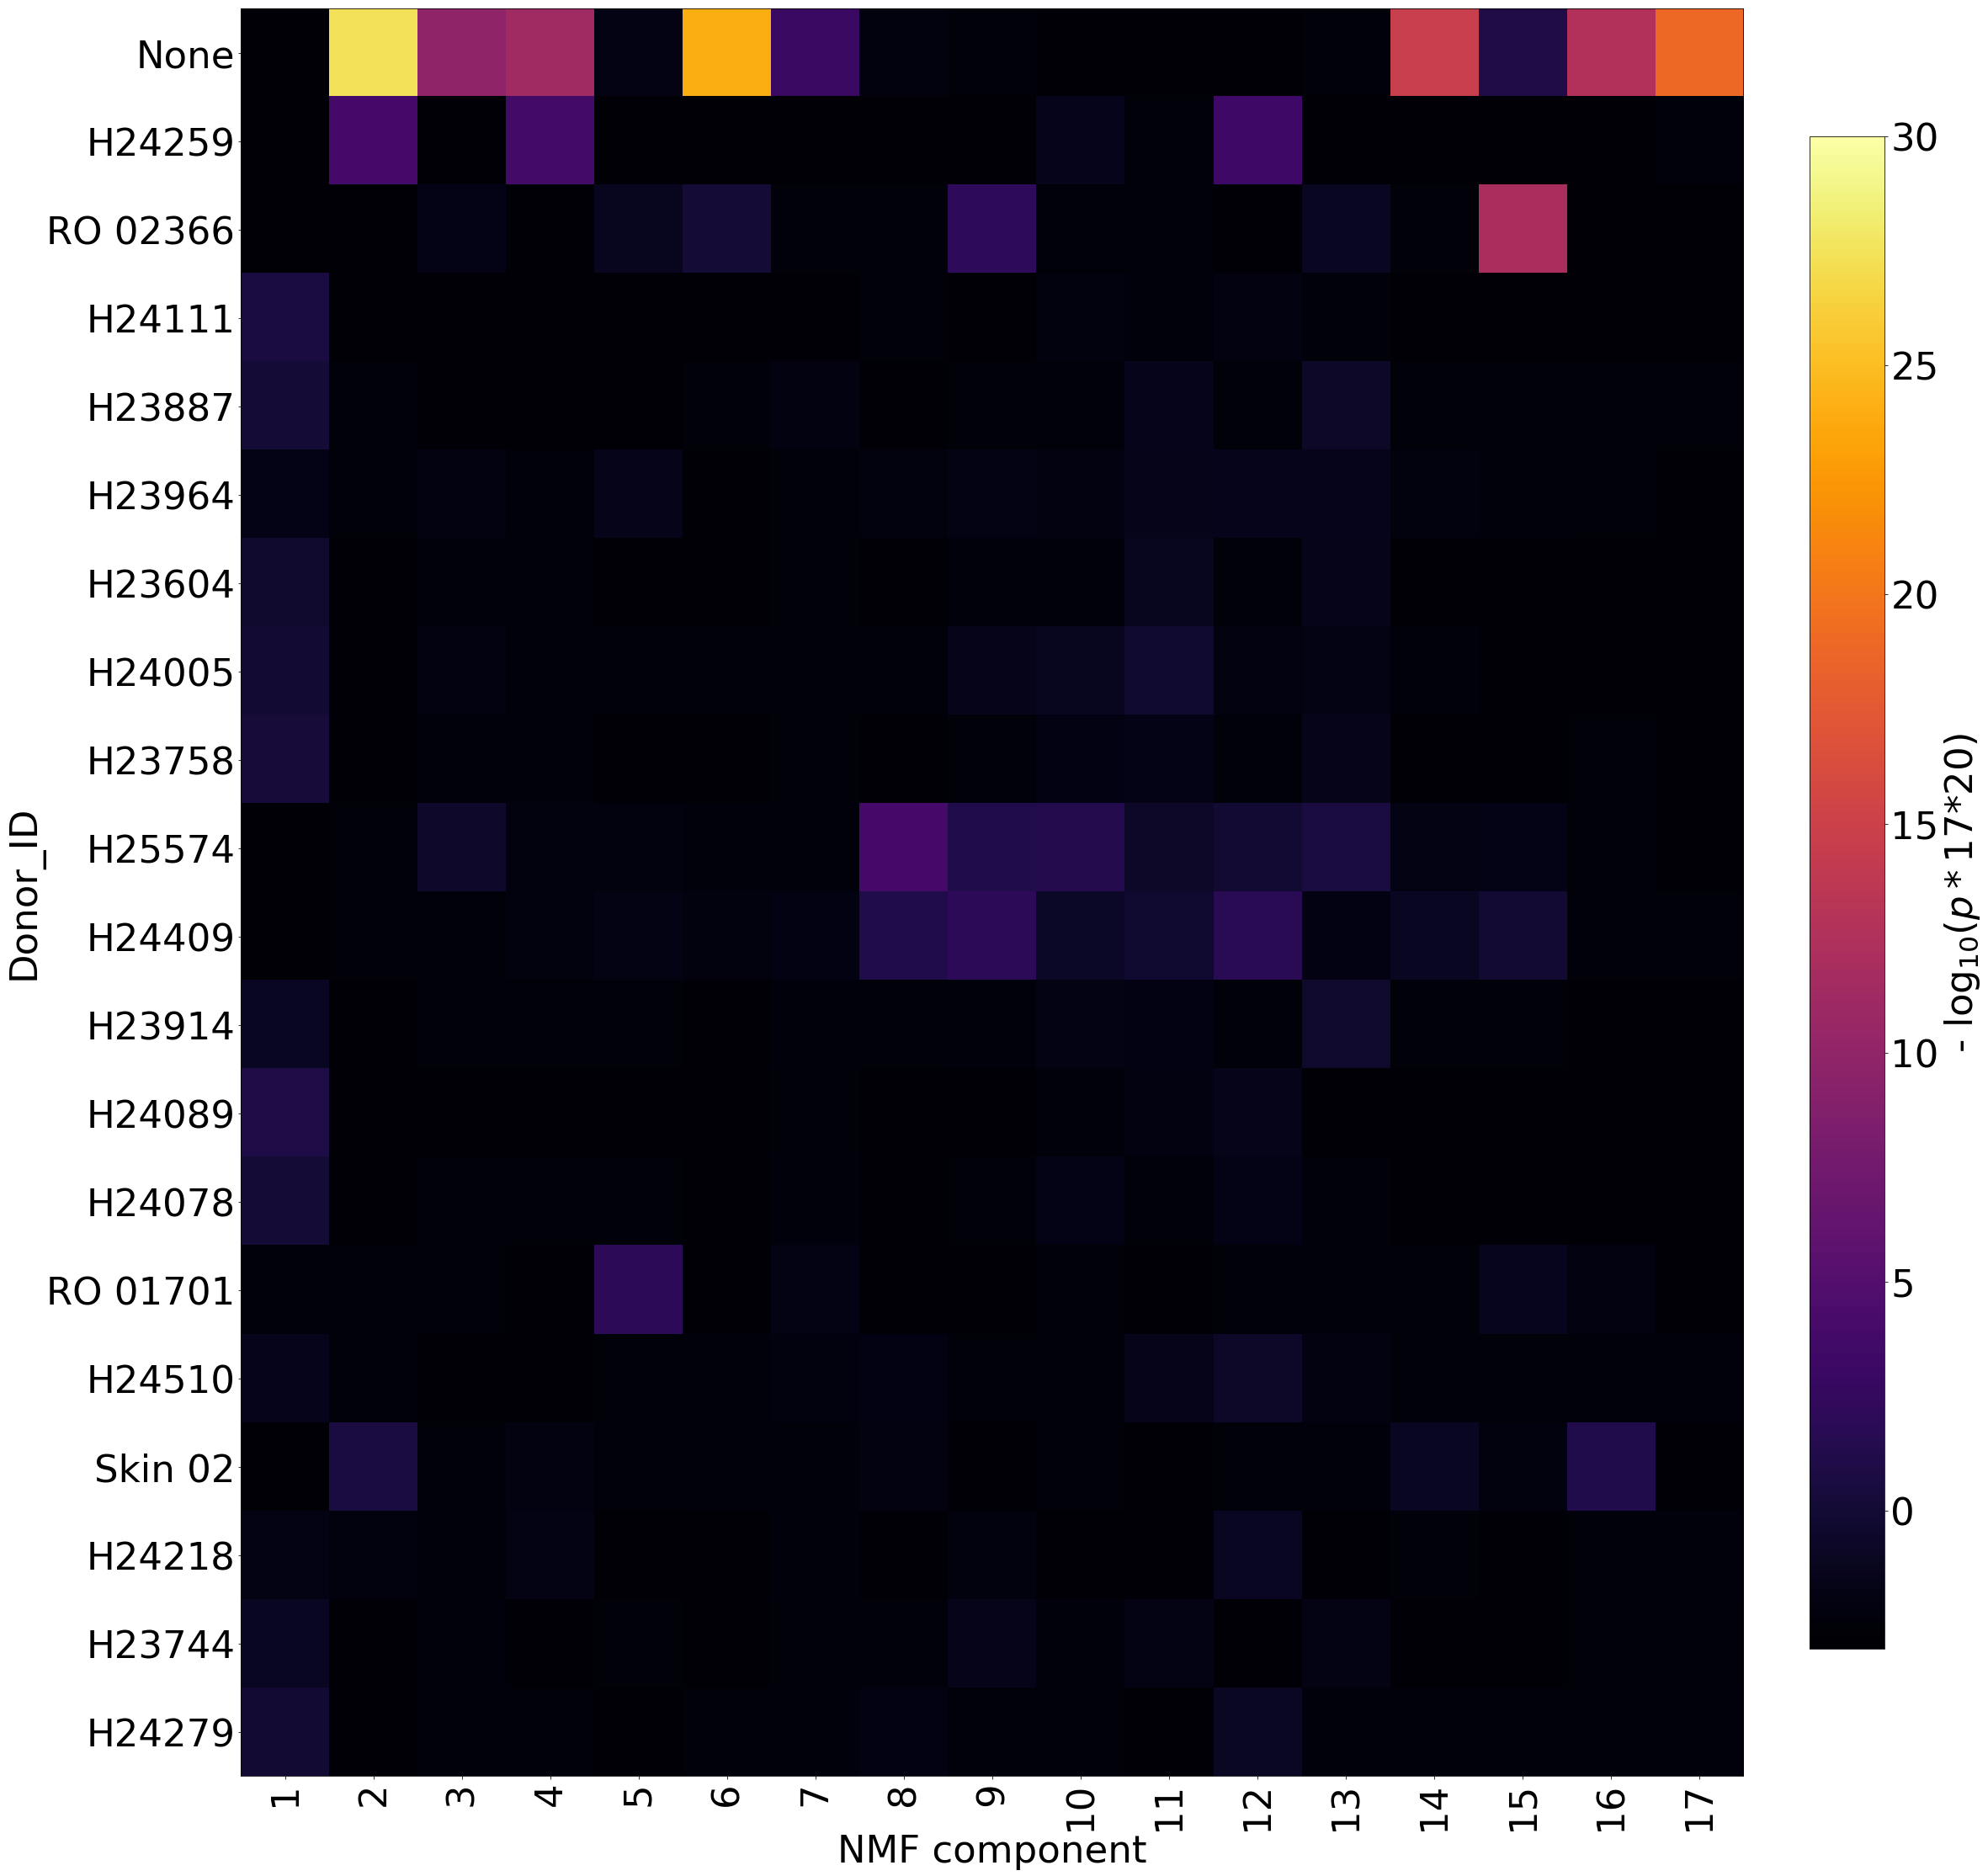

<Figure size 432x288 with 0 Axes>

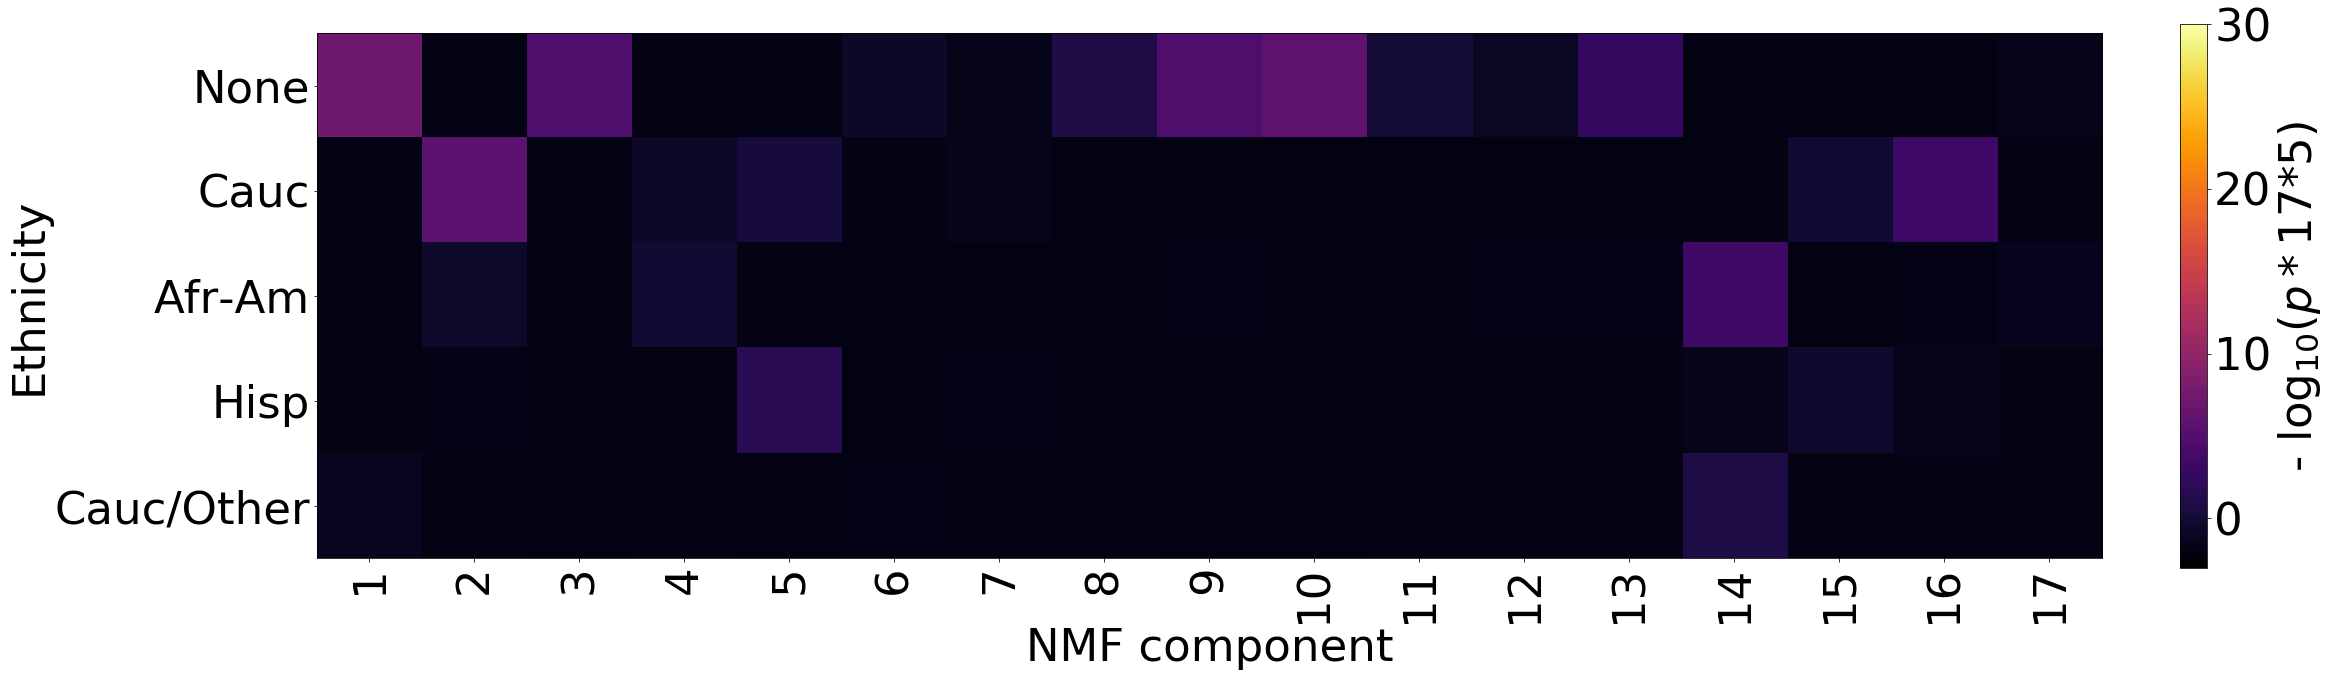

<Figure size 432x288 with 0 Axes>

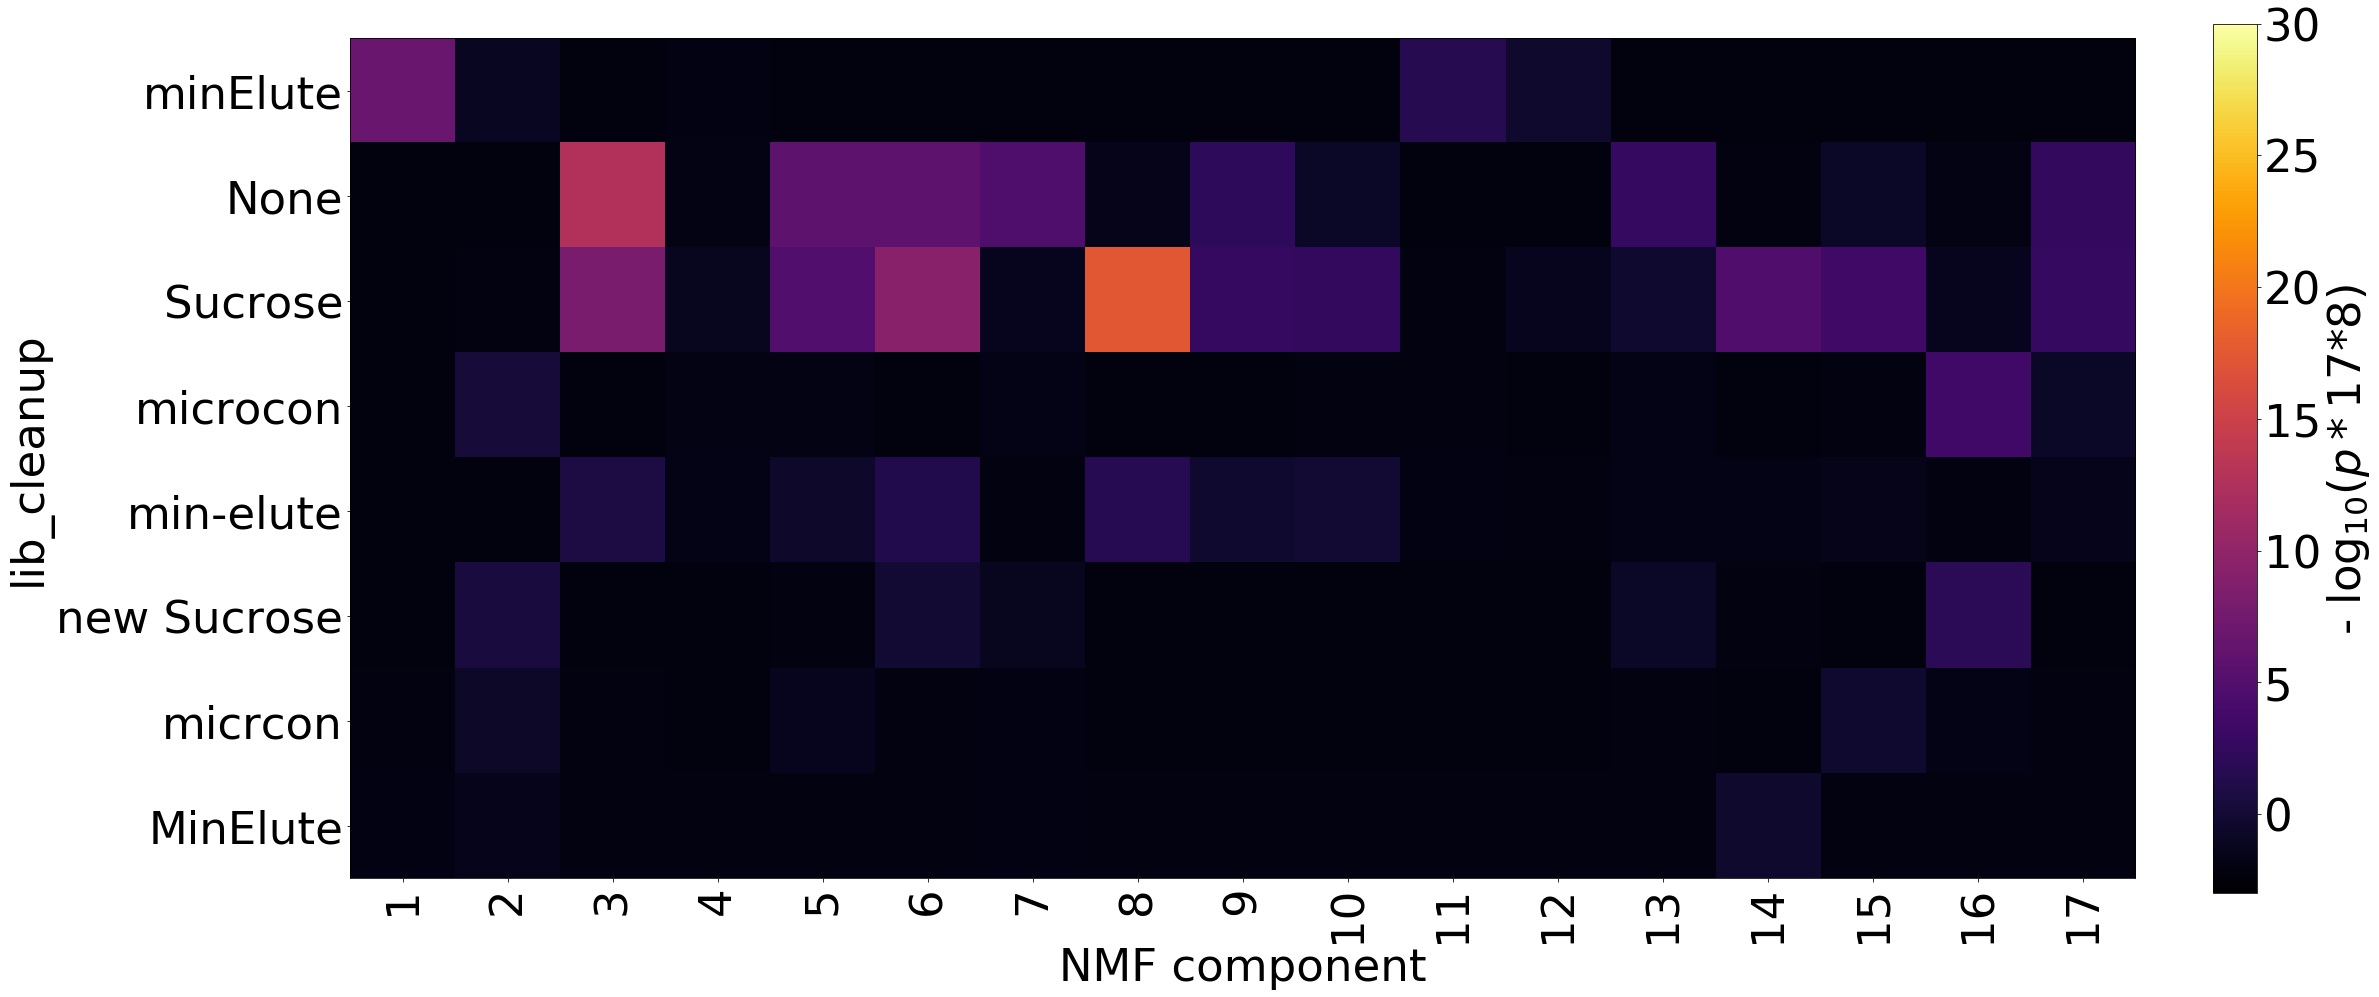

<Figure size 432x288 with 0 Axes>

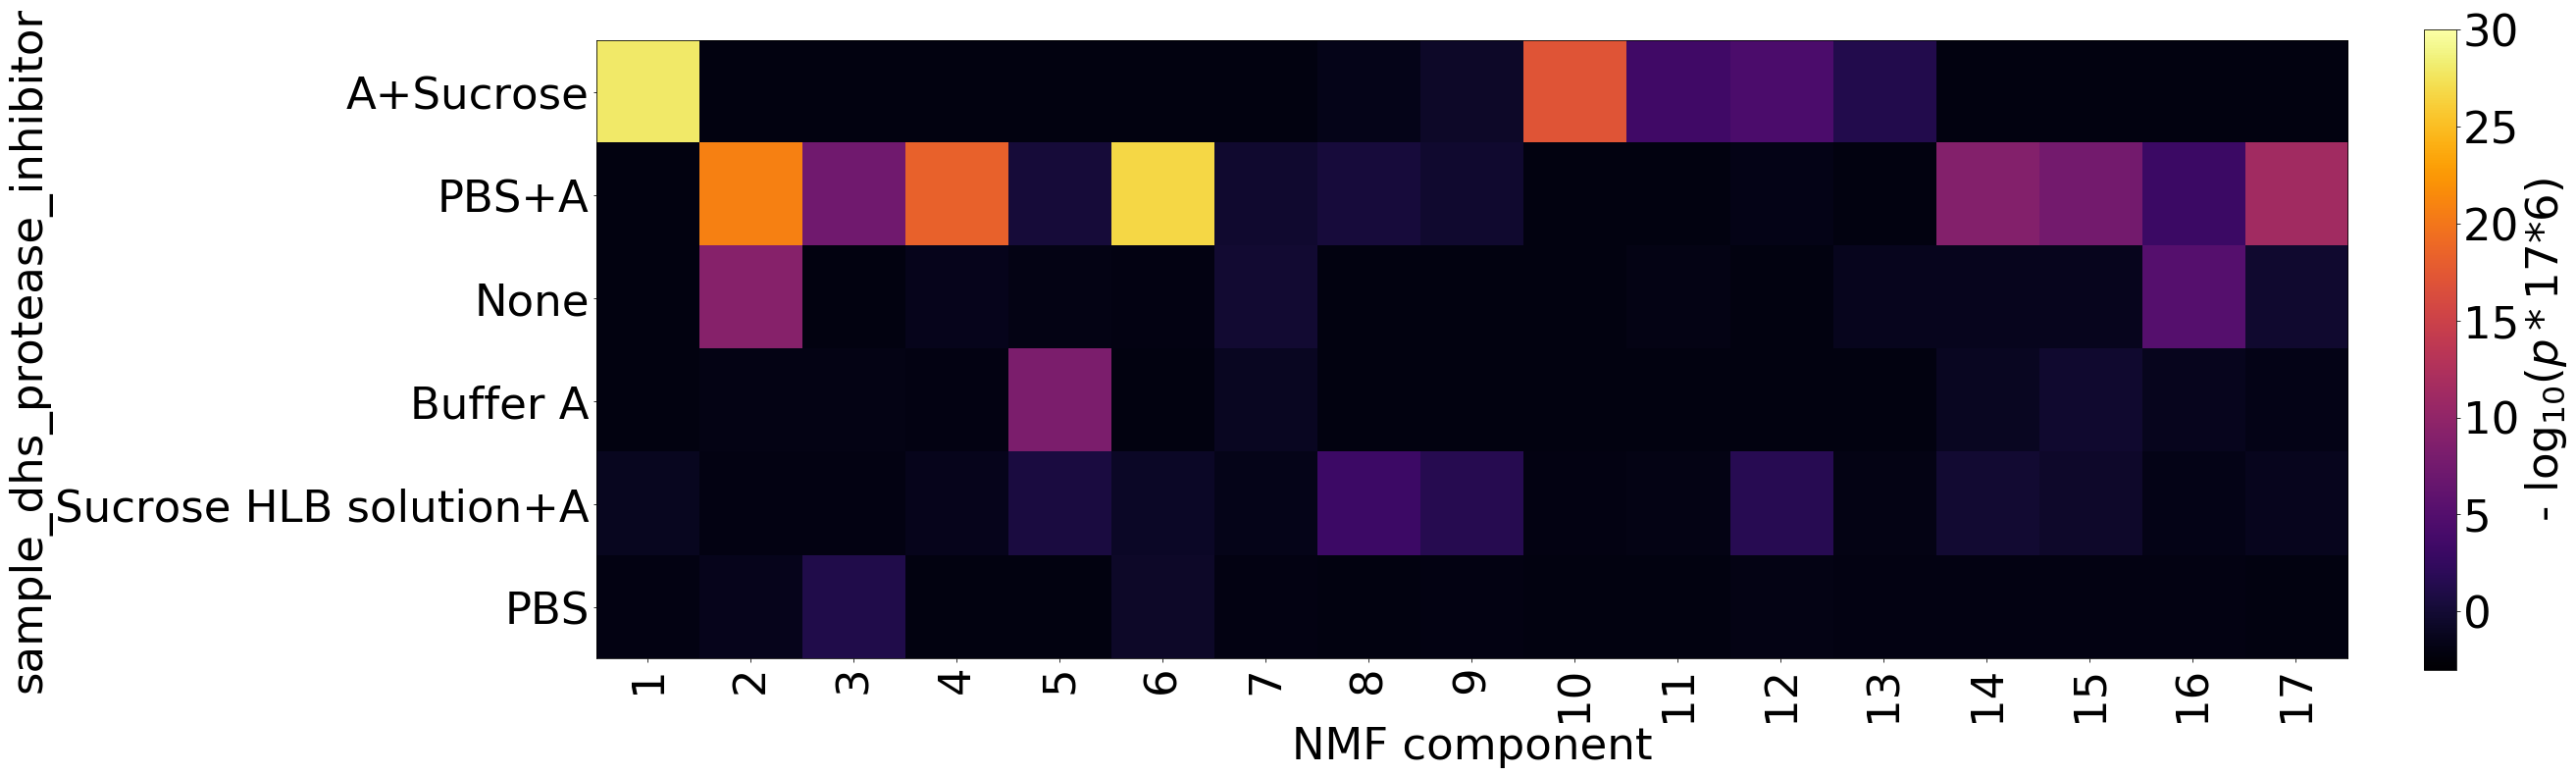

In [16]:
k=17
decomp = OONMF.NMFobject(theNcomps=k)
decomp.matrix_input_name(Basis_finname='2018-06-08NC'+str(k)+'_NNDSVD_Basis.npy')
decomp.read_matrix_input()
decomp.Basis_Names = sampnamePD.full_name.values
rosetta = OMD.get_rosetta(MetaData, decomp.Basis_Names)
for my_cat_str in categories:
    MetaData[my_cat_str].fillna('None', inplace=True)
    (SystemChart,SystemTypes) = OMD.make_significance_plot(MetaData, decomp.Basis, my_cat_str, rosetta,thecmap='inferno', NMFCOMPS=k,filename_addon='', write_mode=False, verbose=False)